# Unemployment Models


In [1]:
library(UsingR)
library(quantmod)
library(ggplot2)
library(grid)
library(gridExtra)
library(knitr)
library(kableExtra)
library(tools)
library(zoo)
library(signal)
library(stringr)
library(corrplot)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Quandl)
library(nnet)
library(readr)
#library(devtools)
#install_github("andrewuhl/RollingWindow")
library(RollingWindow)
#install.packages("EIAdata")
library(EIAdata)
library(gtable)
library(data.table)
library(readxl)
library(plotly)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer


Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'quantmod'


The following object is masked from 'package:Hmisc':

    Lag



Attaching package: 'signal'


The following objects are masked from 'package:stats':

    filter, poly


corrplot 0.92 loaded


Attaching packa

Call helper functions

In [2]:
source("plotHelper.r")

Define the source of the data (local or web) and whether to update the models.

In [3]:
b.refresh.models = FALSE

Define the plotting ranges and vertical defaults

In [4]:
dt.recent = as.Date("2017-01-01")
d.GSPC.max = 4000

Load up the off-line data

In [5]:
load("C:/Users/Rainy/OneDrive//RecessionIndicator_Buffer.RData")

This snippet is needed because some of the ticker symbols include are invalid variable names so re-cast those variable names.

In [6]:
df.symbols$string.symbol <-
  str_replace_all(df.symbols$string.symbol, "[^[:alnum:]]", "")

Do the interpolation to daily samples and tidy the data

In [7]:
source("calcInterpolate.r")

In [8]:
df.data <- calcInterpolate(df.symbols)

Warning message in merge.xts(xtsData, get(df.symbols$string.symbol[idx])):
"NAs introduced by coercion"


Truncate the data. A very few data series do go back to 1854, but most don't even go past WWII so truncate the dataframe

In [9]:
df.data <- df.data[as.Date(rownames(df.data)) > as.Date("1940-01-01"),]

Create aggreagate data series
Some analysis requires that two or more series be combined. For example, normallizing debt by GDP to get a sense of the proportion of debt to the total economy helps understand the debt cycle.

In [10]:
source("calcAggregateSeries.r")

Calculate the year-over-year, 50 day moving average, and other features in the data

In [11]:
source("calcFeatures.r")

In [12]:
lst.df <- calcFeatures(df.data, df.symbols)
df.data <- lst.df[[1]]
df.symbols <- lst.df[[2]]

[1] "USREC has zero or negative values. Log series will be zero."
[1] "GSFTX.Volume has zero or negative values. Log series will be zero."
[1] "LFMIX.Volume has zero or negative values. Log series will be zero."
[1] "LFMCX.Volume has zero or negative values. Log series will be zero."
[1] "LFMAX.Volume has zero or negative values. Log series will be zero."
[1] "LCSIX.Volume has zero or negative values. Log series will be zero."
[1] "VBIRX.Volume has zero or negative values. Log series will be zero."
[1] "VFSUX.Volume has zero or negative values. Log series will be zero."
[1] "LTUIX.Volume has zero or negative values. Log series will be zero."
[1] "PTTPX.Volume has zero or negative values. Log series will be zero."
[1] "NERYX.Volume has zero or negative values. Log series will be zero."
[1] "STIGX.Volume has zero or negative values. Log series will be zero."
[1] "HLGAX.Volume has zero or negative values. Log series will be zero."
[1] "FTRGX.Volume has zero or negative values. Log series 

These are auxilliary series that use the YoY and smoothed data.

In [13]:
source("calcFeaturesAggregate.r")

Build the recession data frame

In [14]:
source("calcRecession.r")


## Historical equity statistics

### Year over year


How much did the market change in a year, or 4, or 5? This data is used to evaluate the probability of a XX% decline in a certain period.

Start with year-over-year

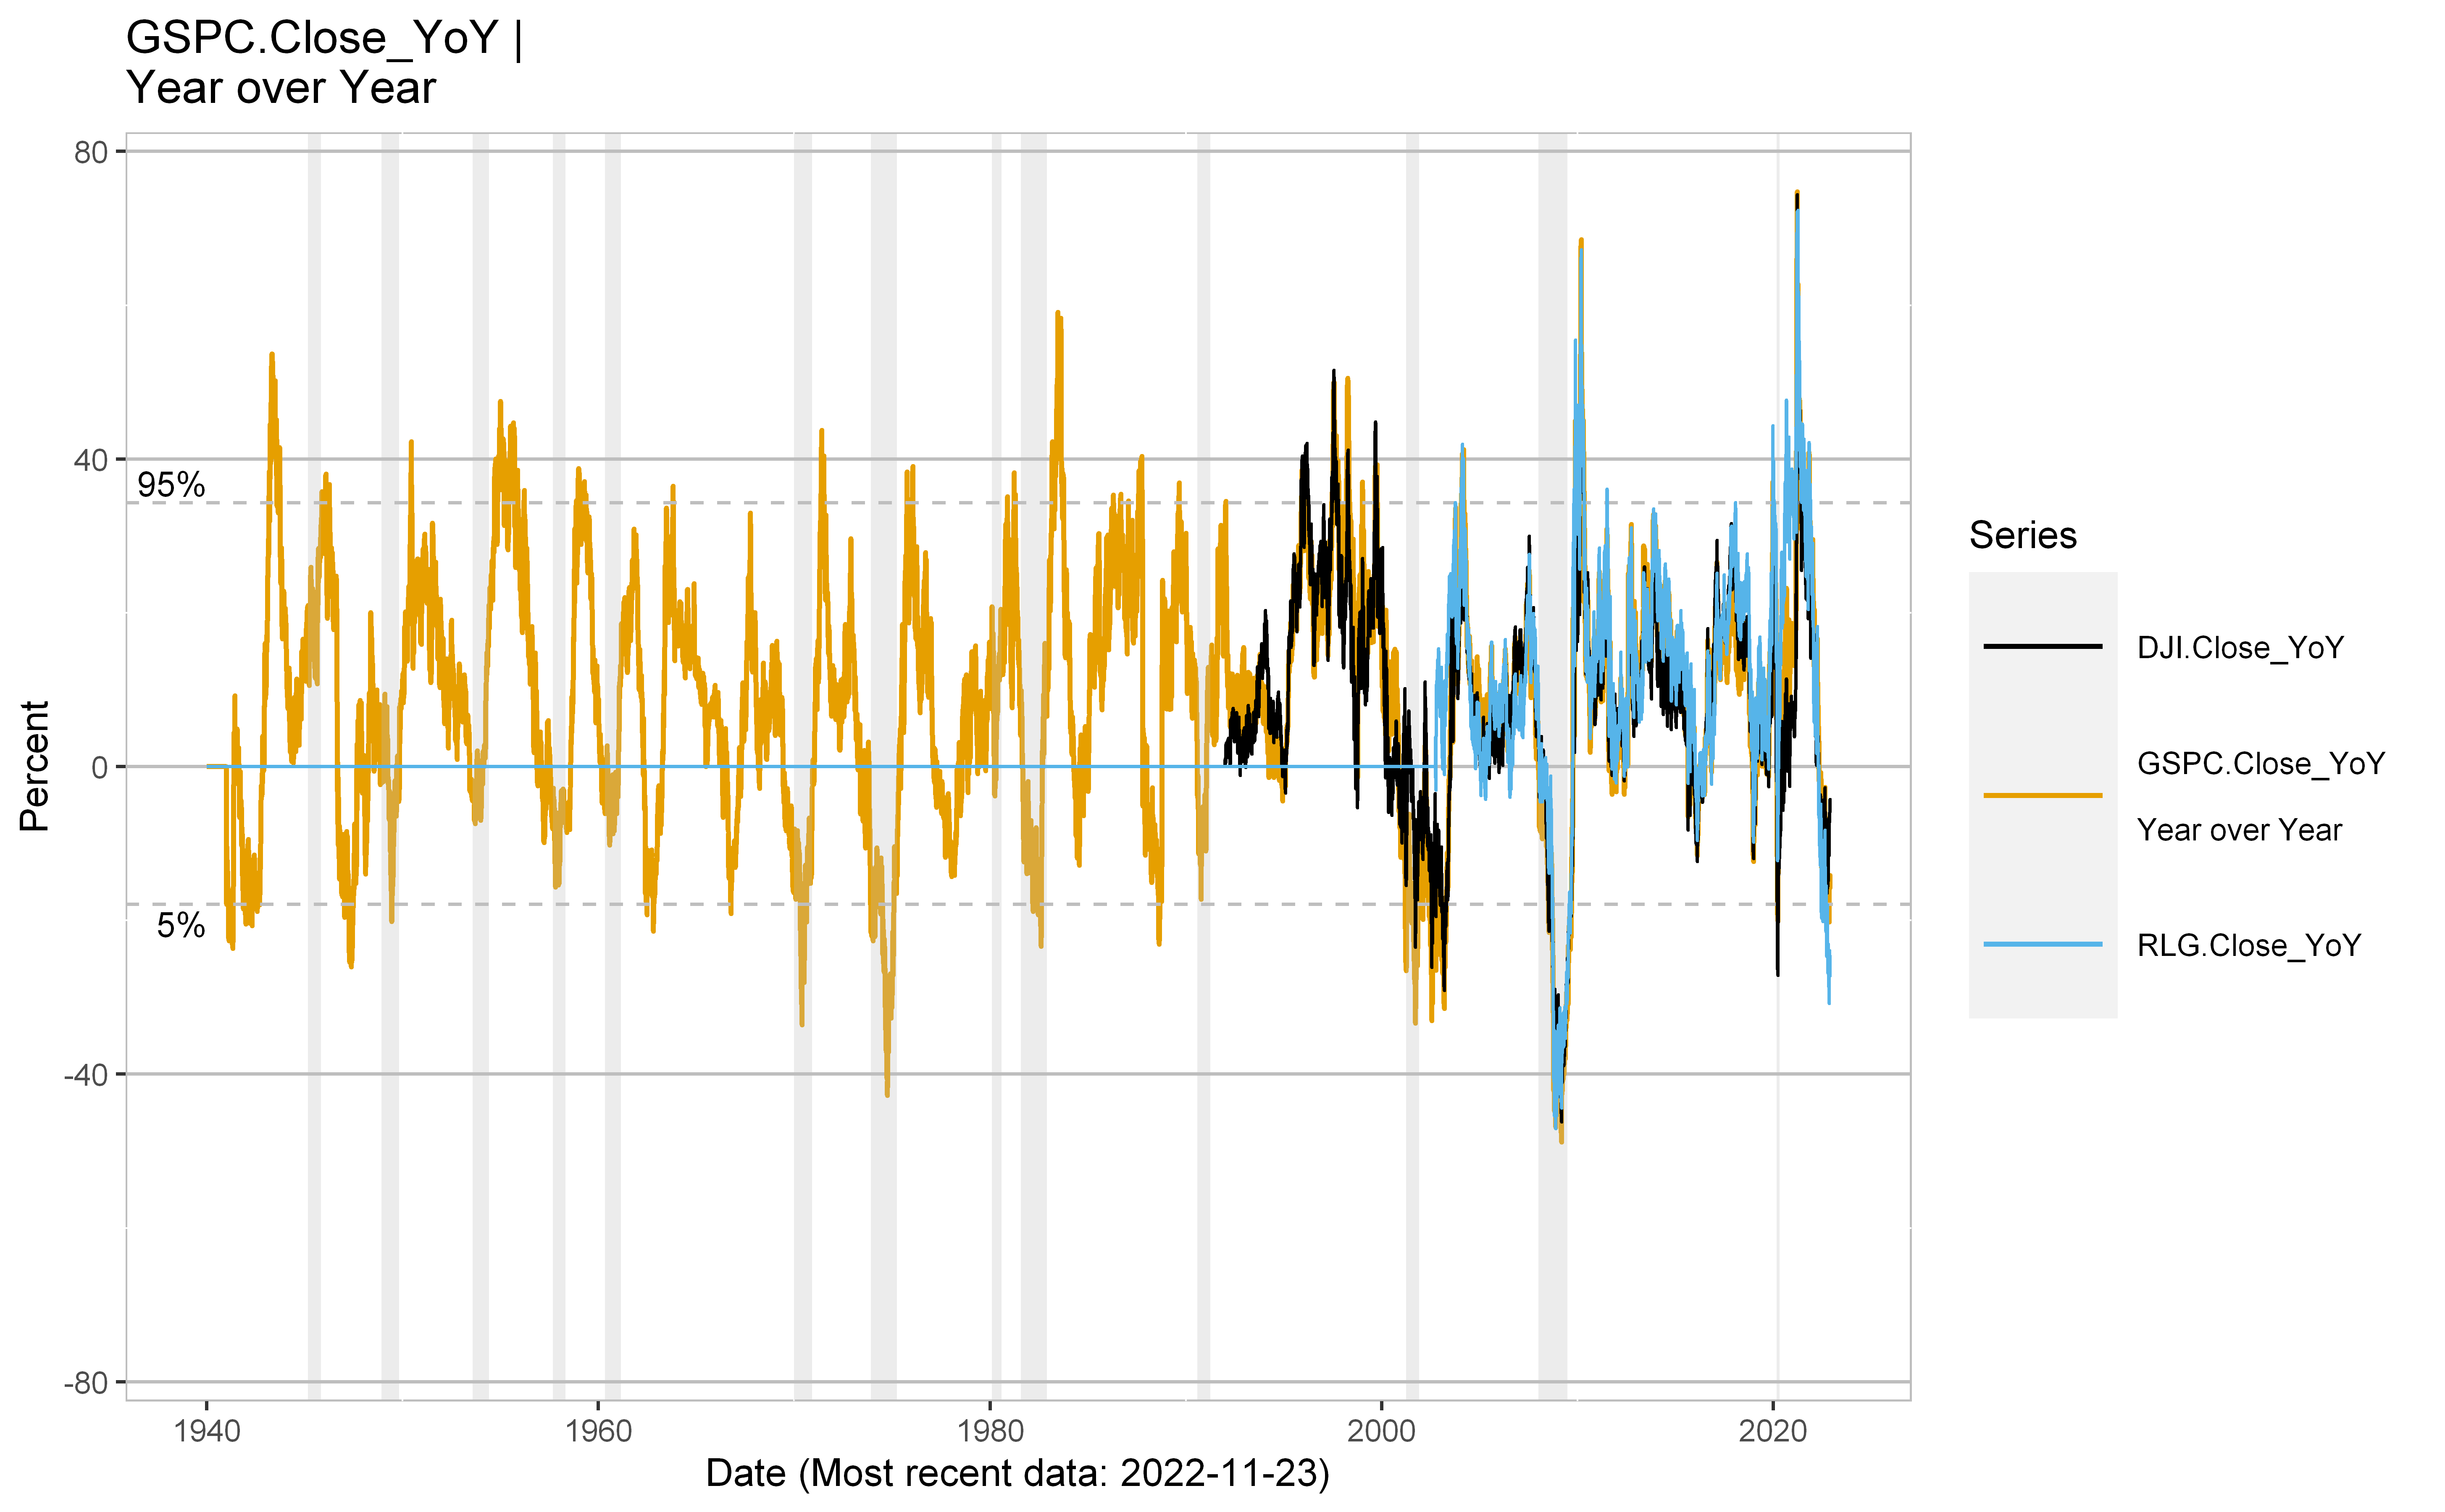

In [15]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

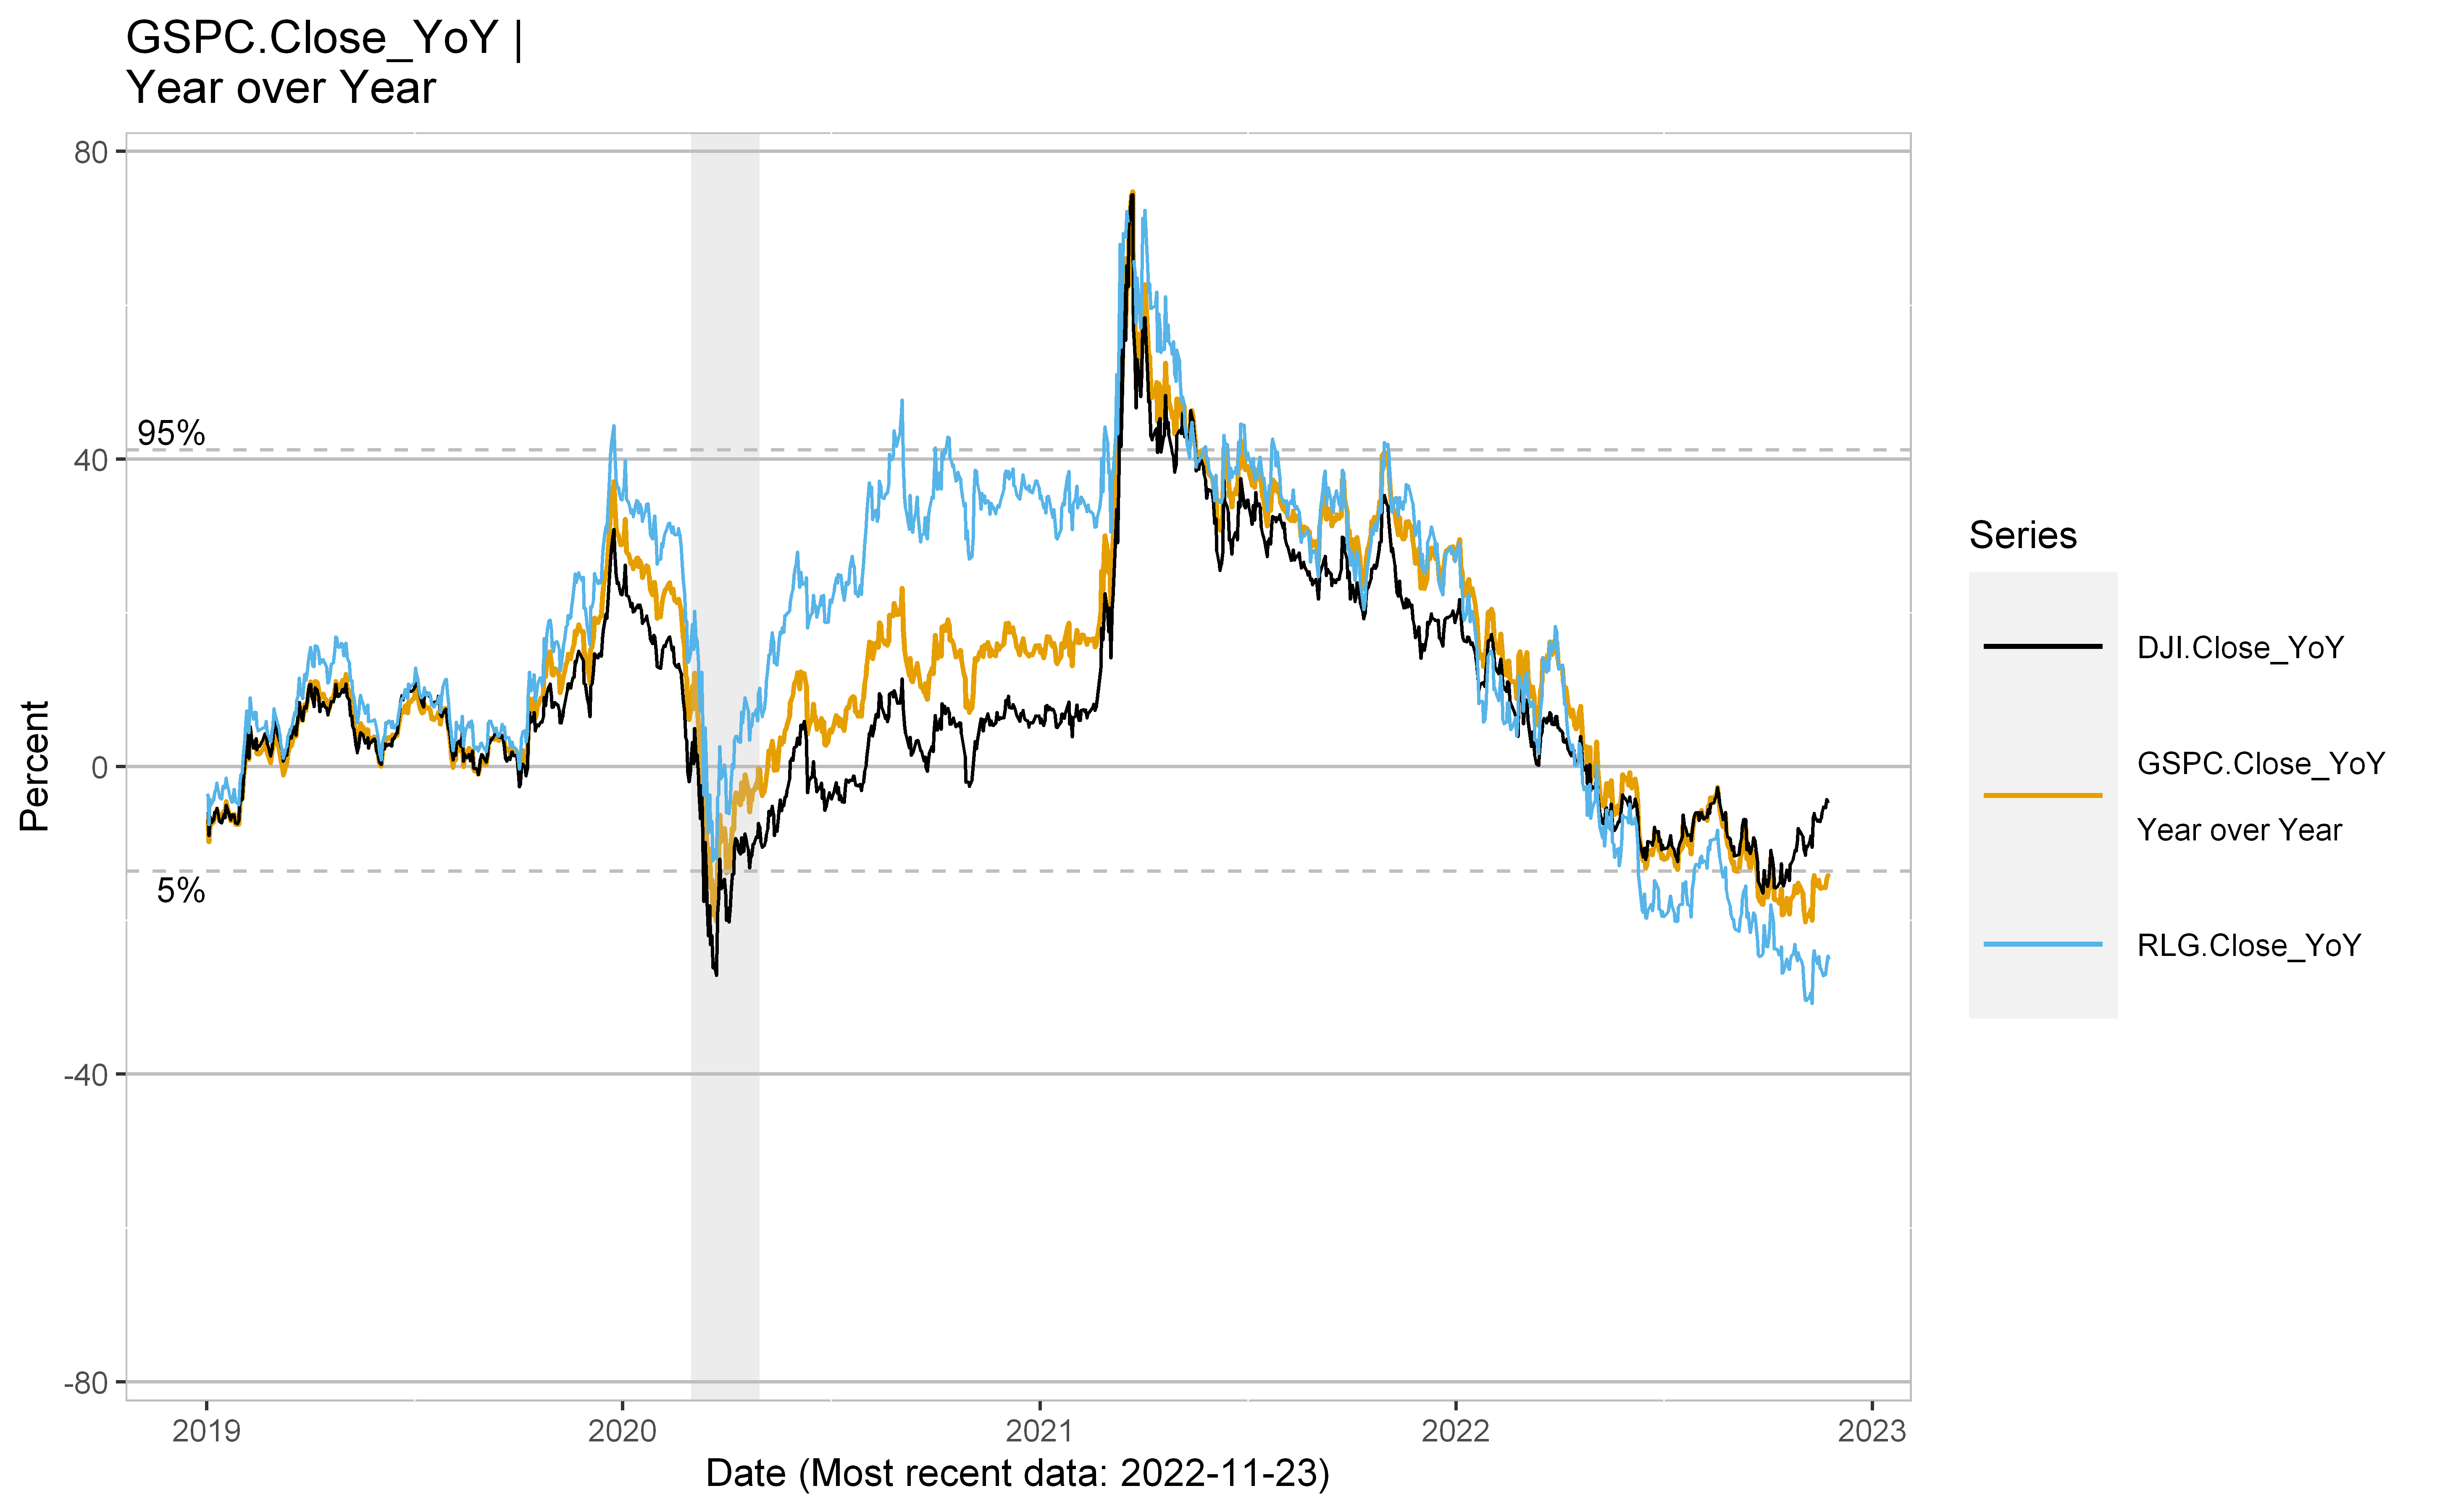

In [16]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('2019-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

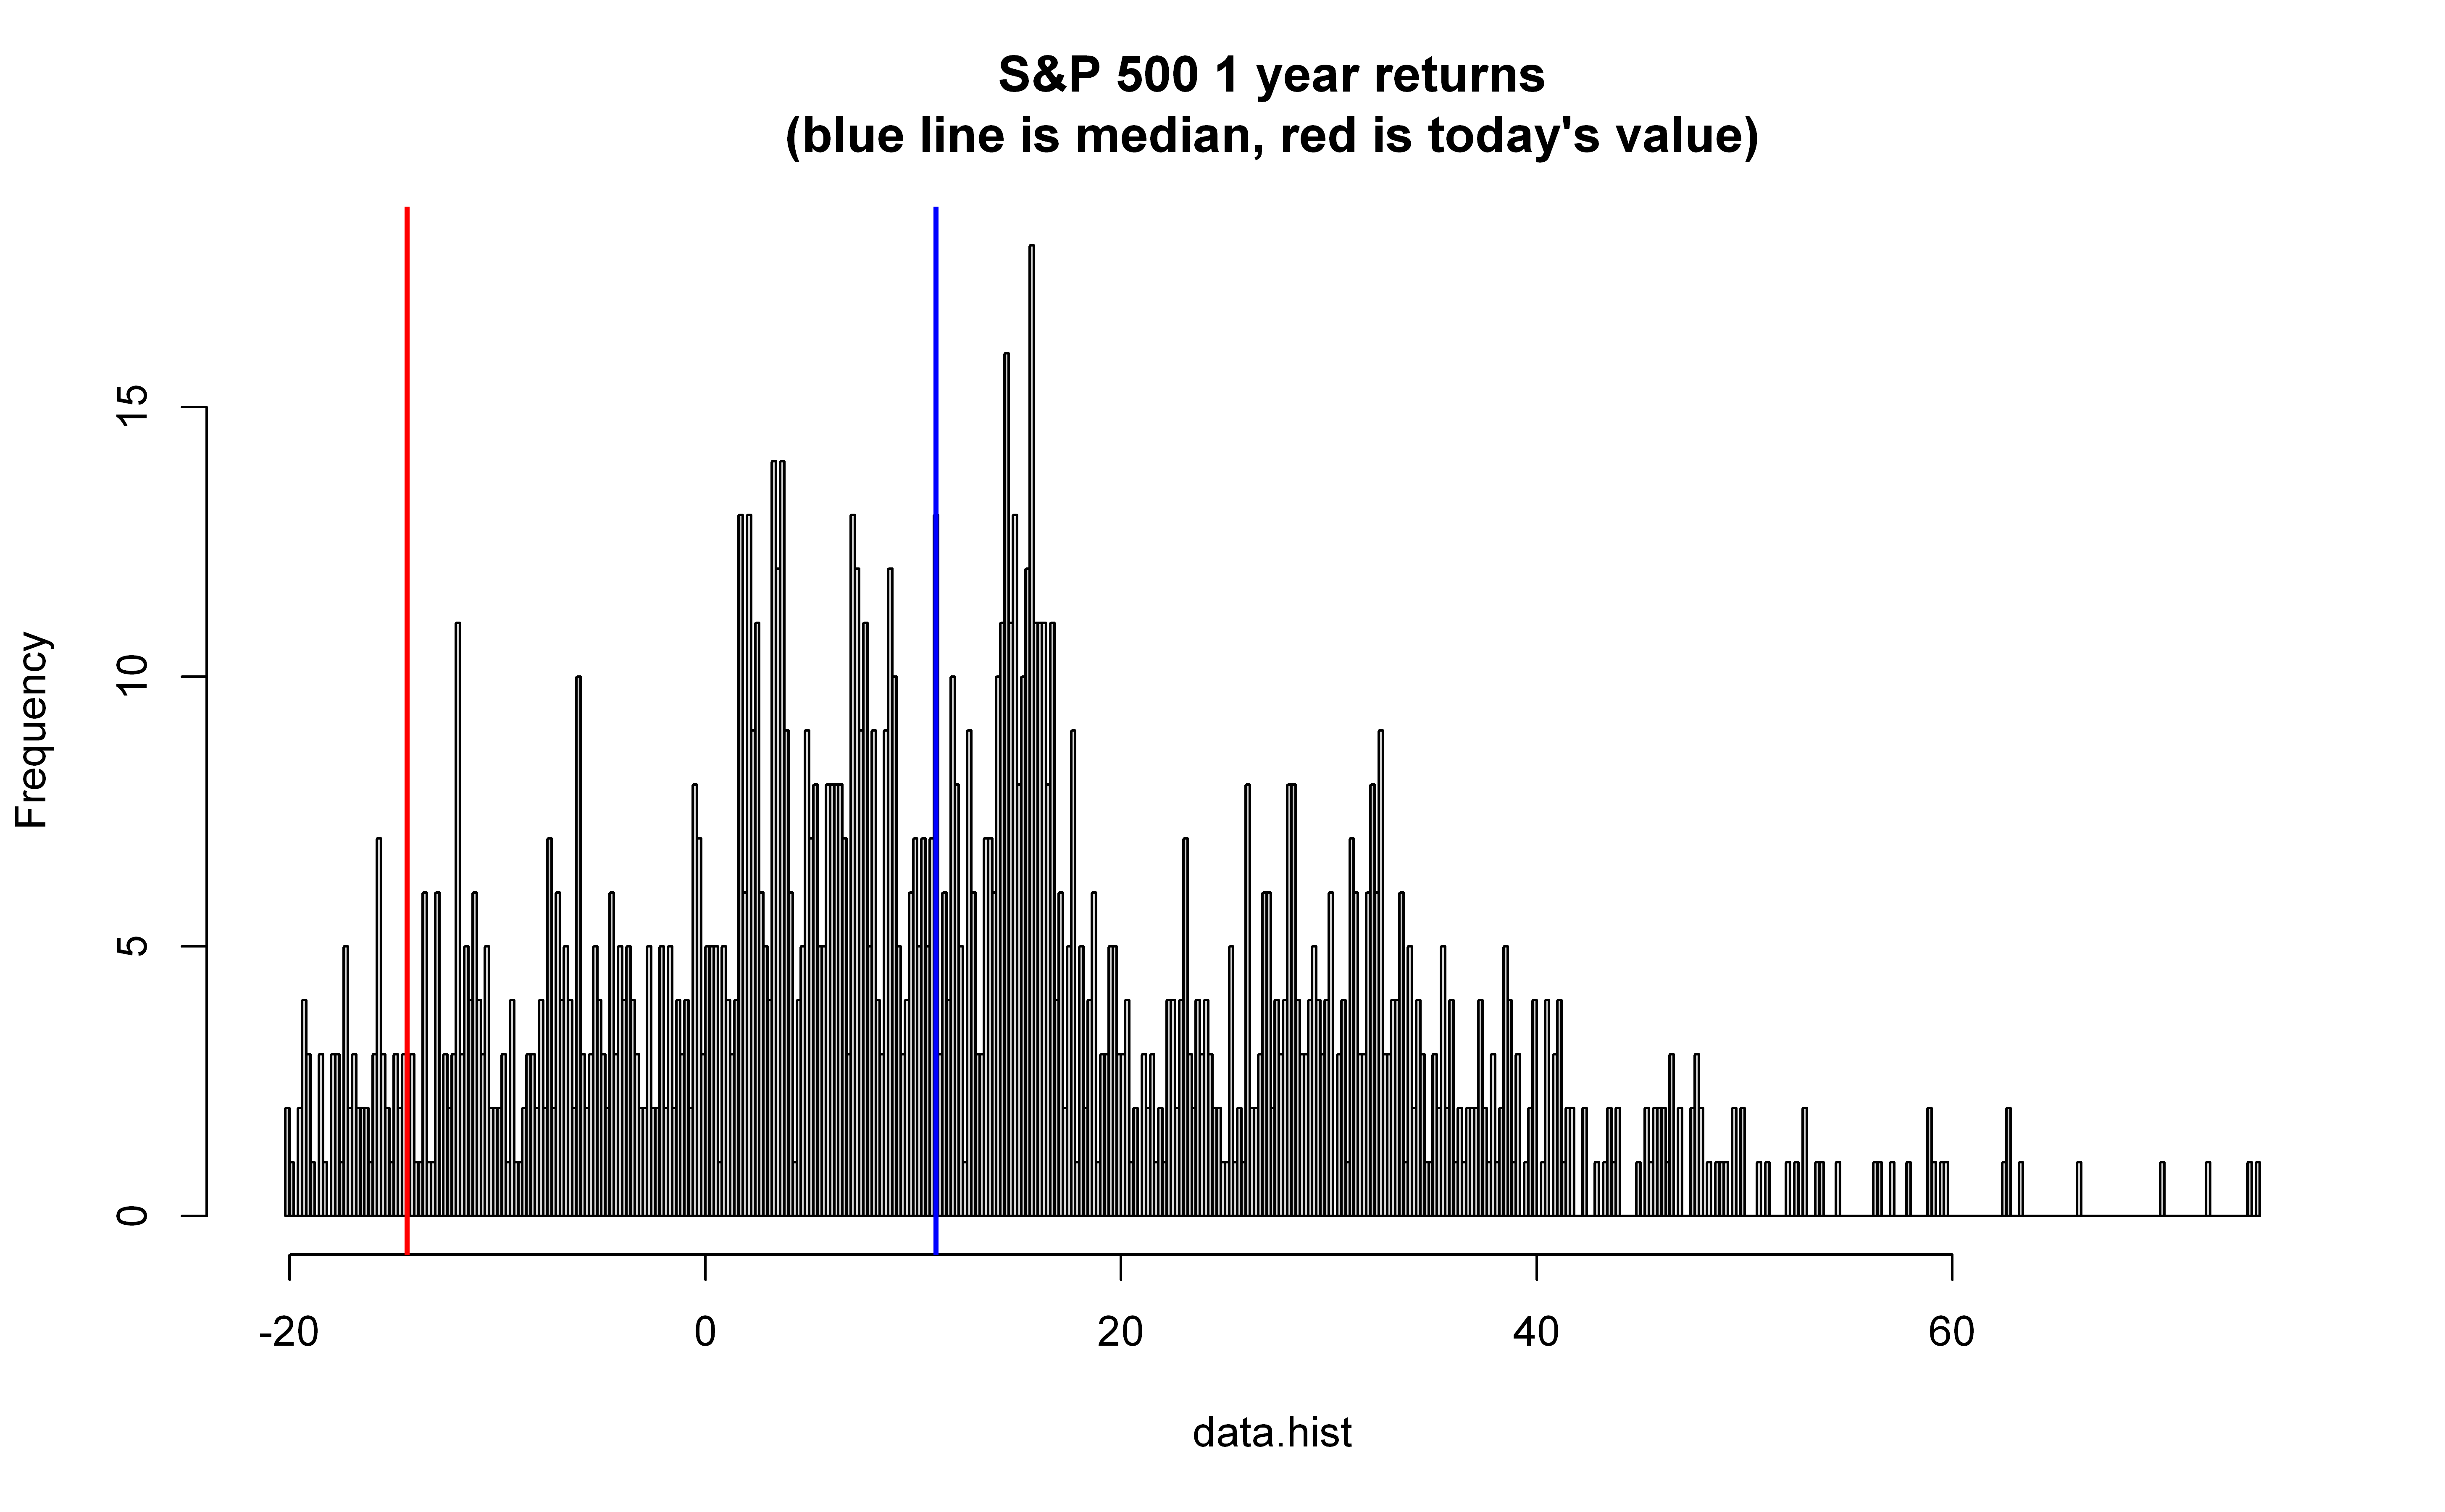

In [17]:
data.hist <- df.data$GSPC.Close_YoY[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
my.h <- hist(data.hist,breaks=500,main="S&P 500 1 year returns\n(blue line is median, red is today's value)")
abline(v = median(data.hist), col = "blue", lwd = 2)
abline(v = tail(data.hist,1), col = "red", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

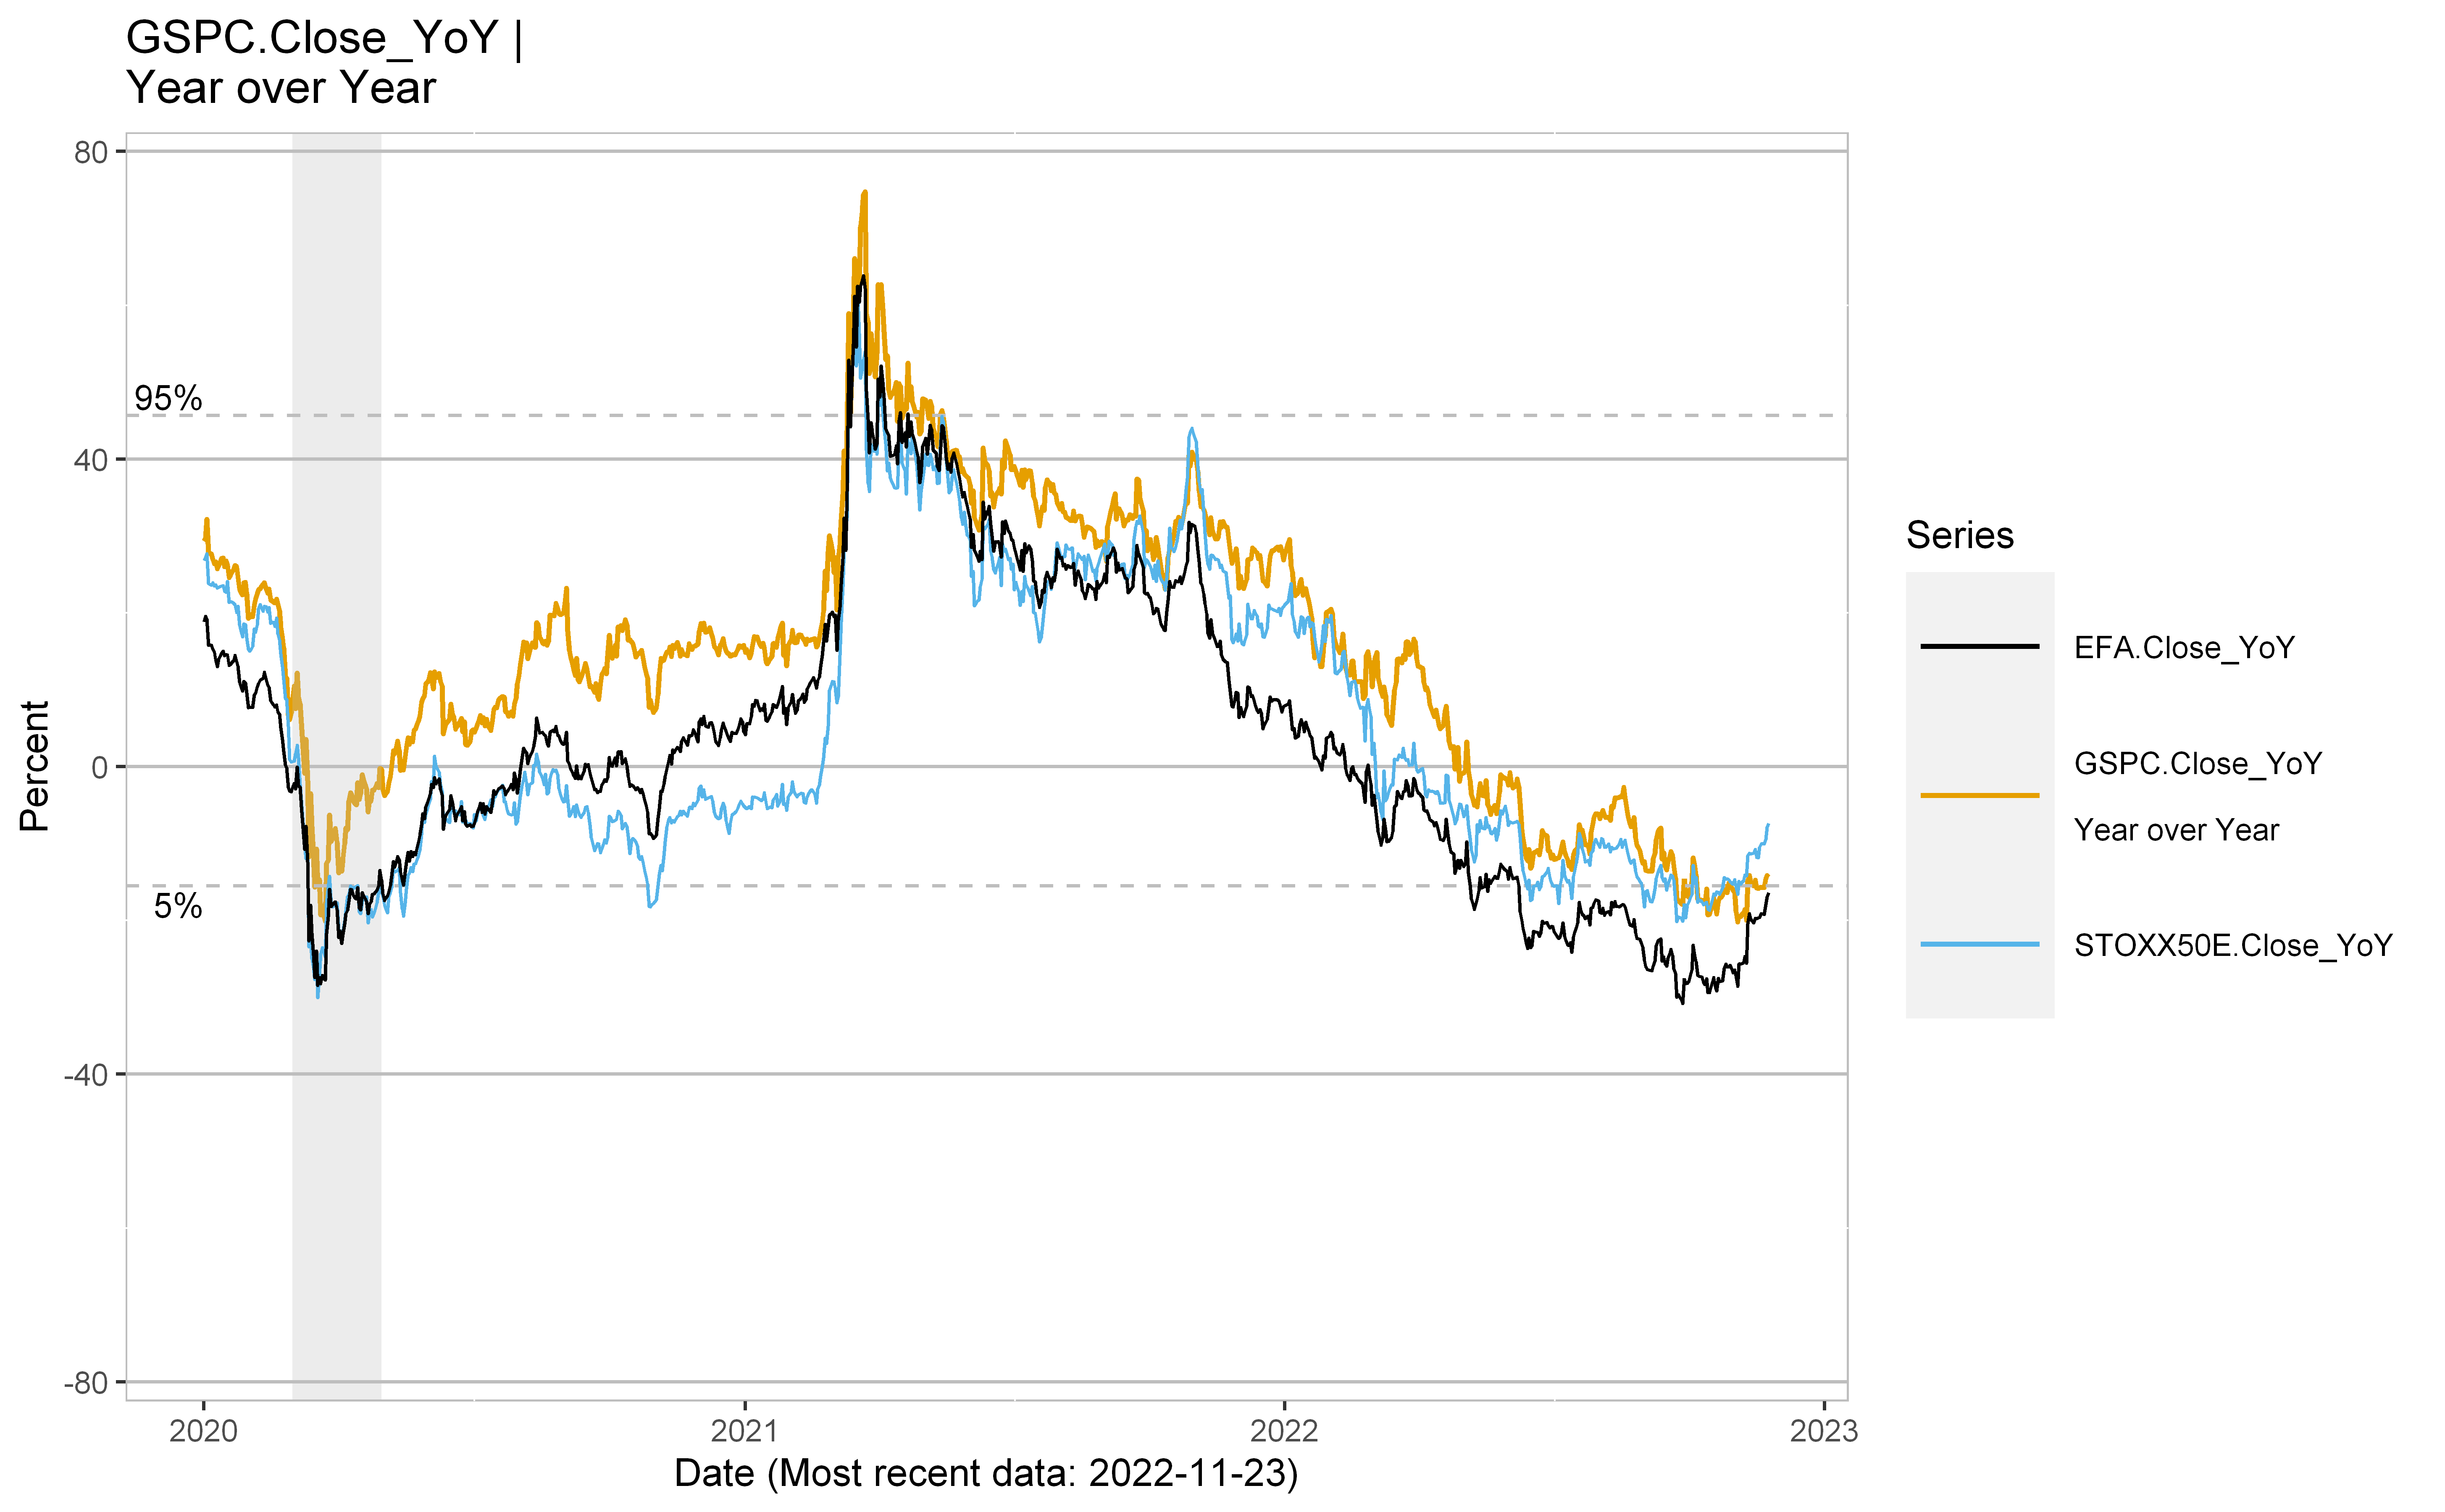

In [18]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "STOXX50E.Close_YoY"
datay.aux.2 <- "EFA.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('2020-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

Take a look at where we are today with respect to the distribution of returns

## Historical Returns

### US Equity


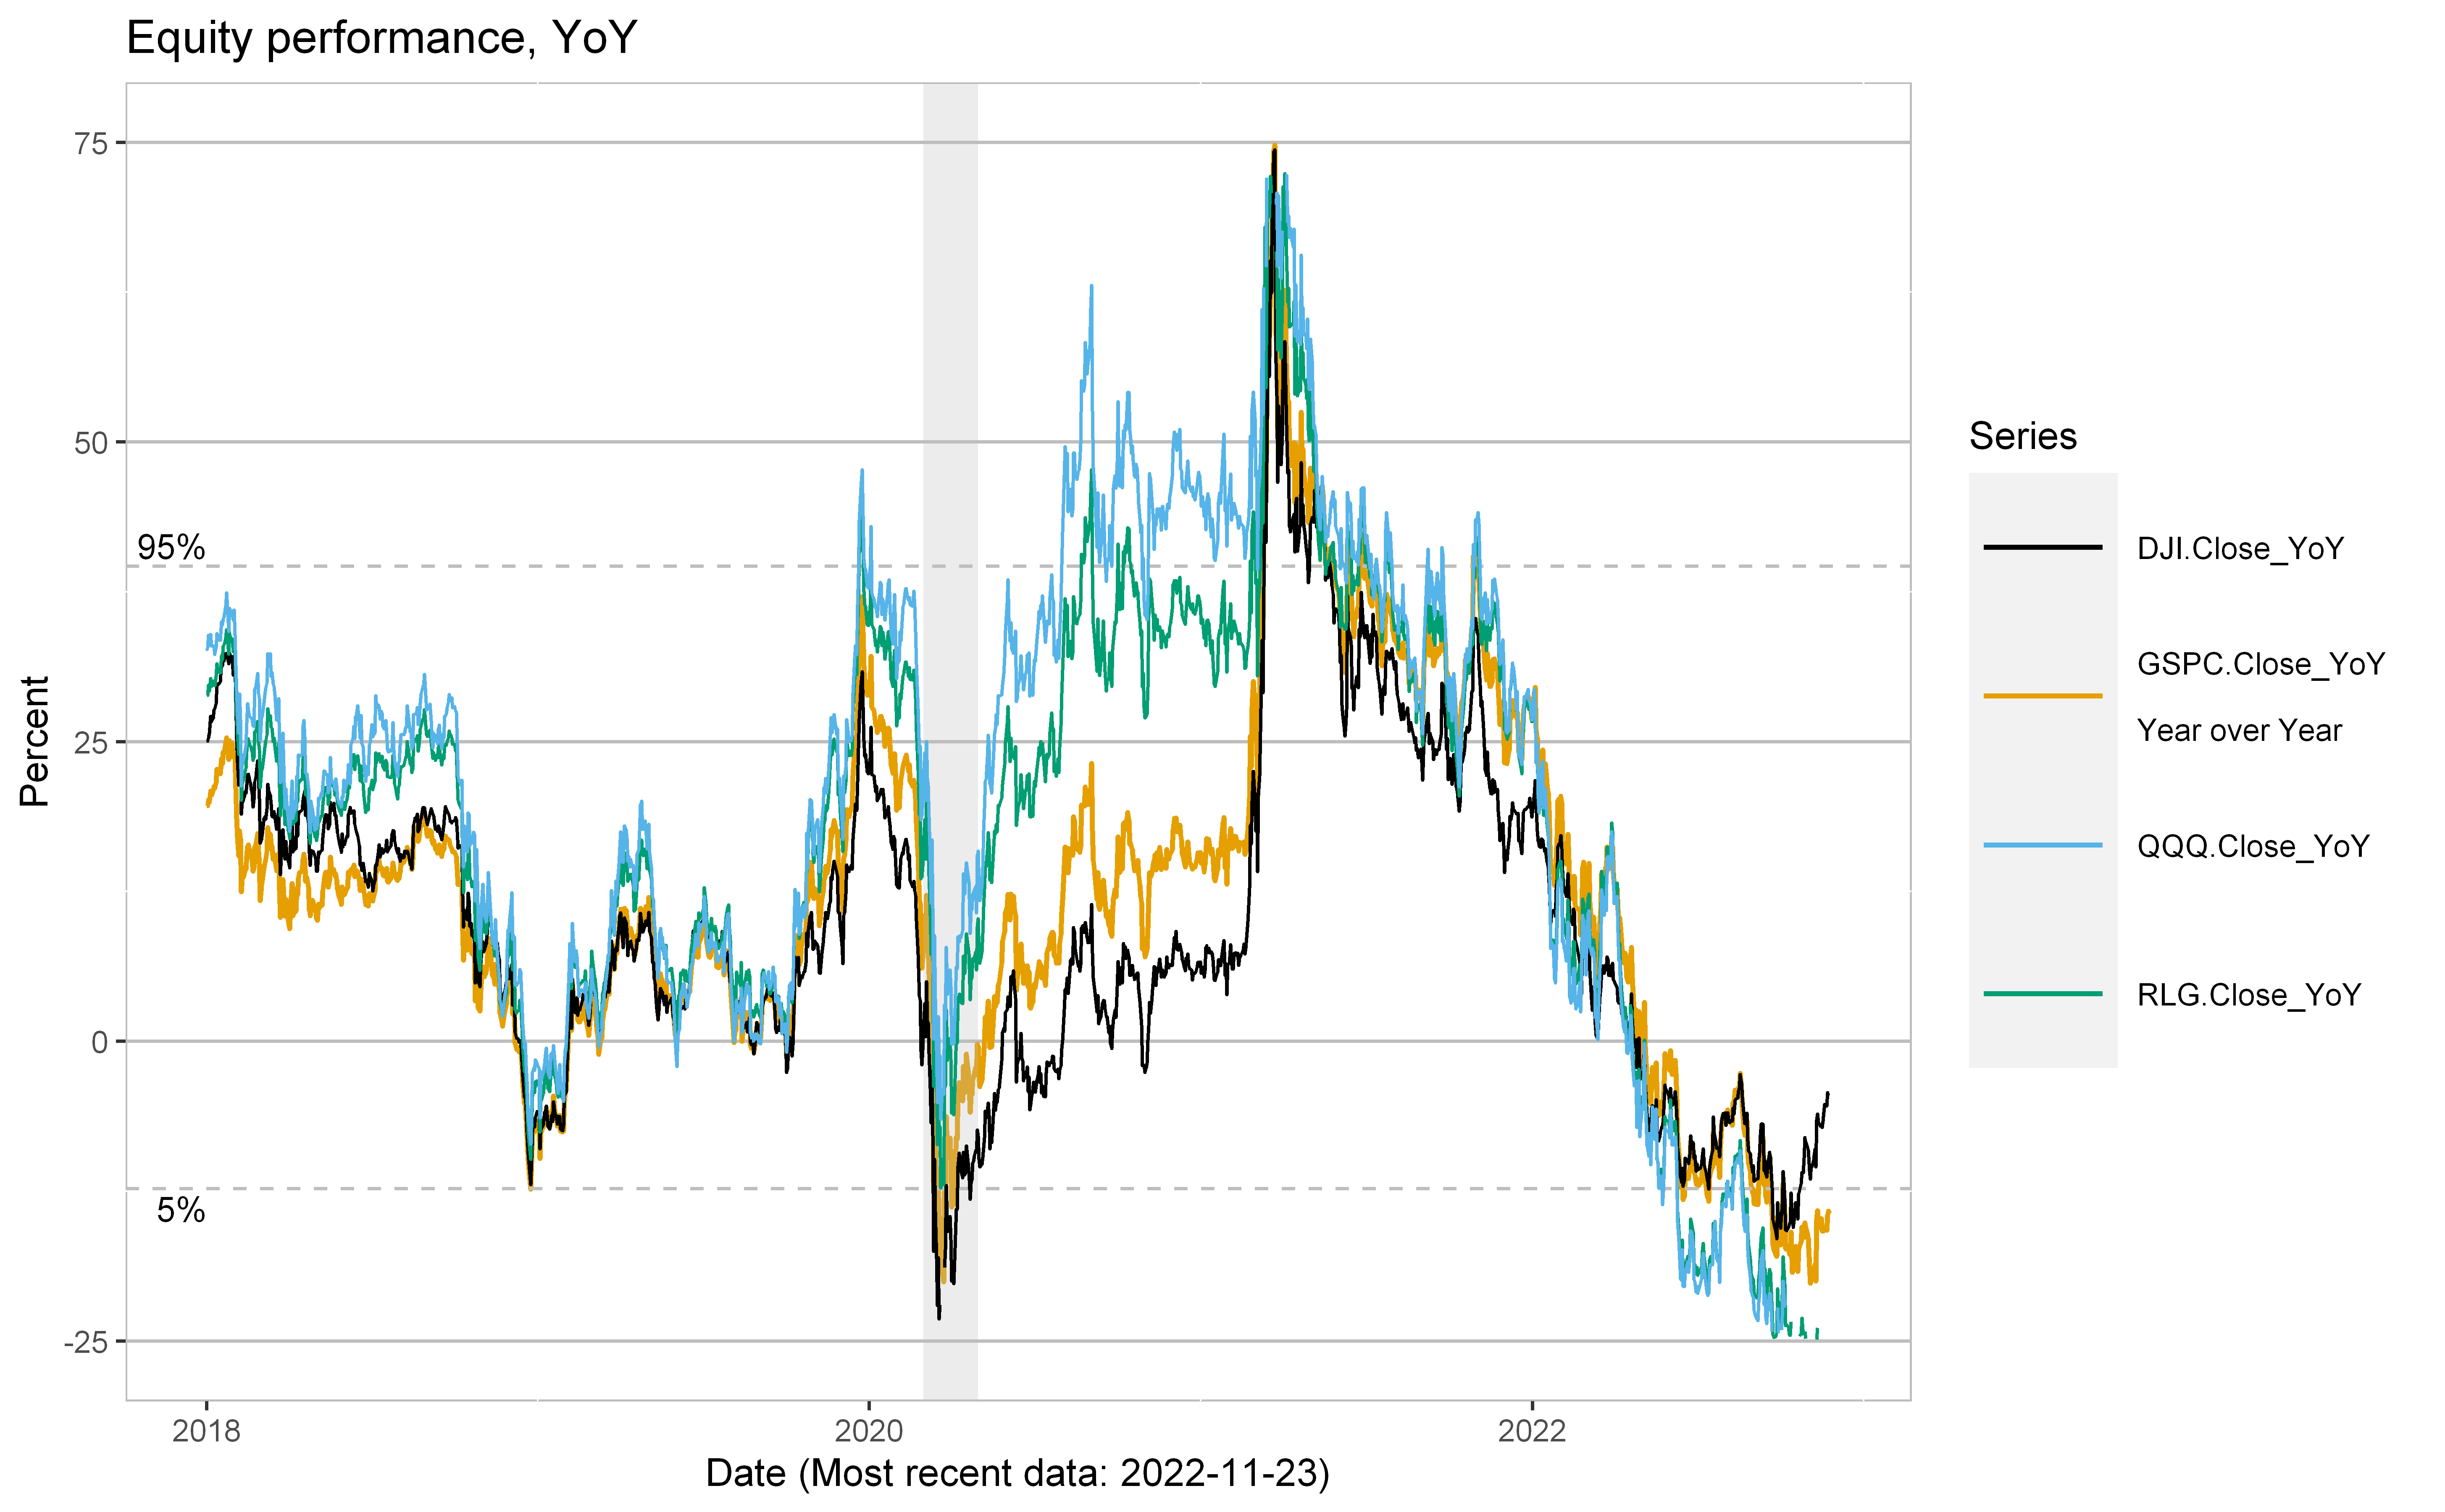

In [19]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
datay.aux.3 <- "QQQ.Close_YoY"
ylim.in <- c(-25, 75)
dt.start <- as.Date('2018-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "Equity performance, YoY",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 <- p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.3,
    colour = shQuote(datay.aux.3)
  ),
  na.rm = TRUE
)

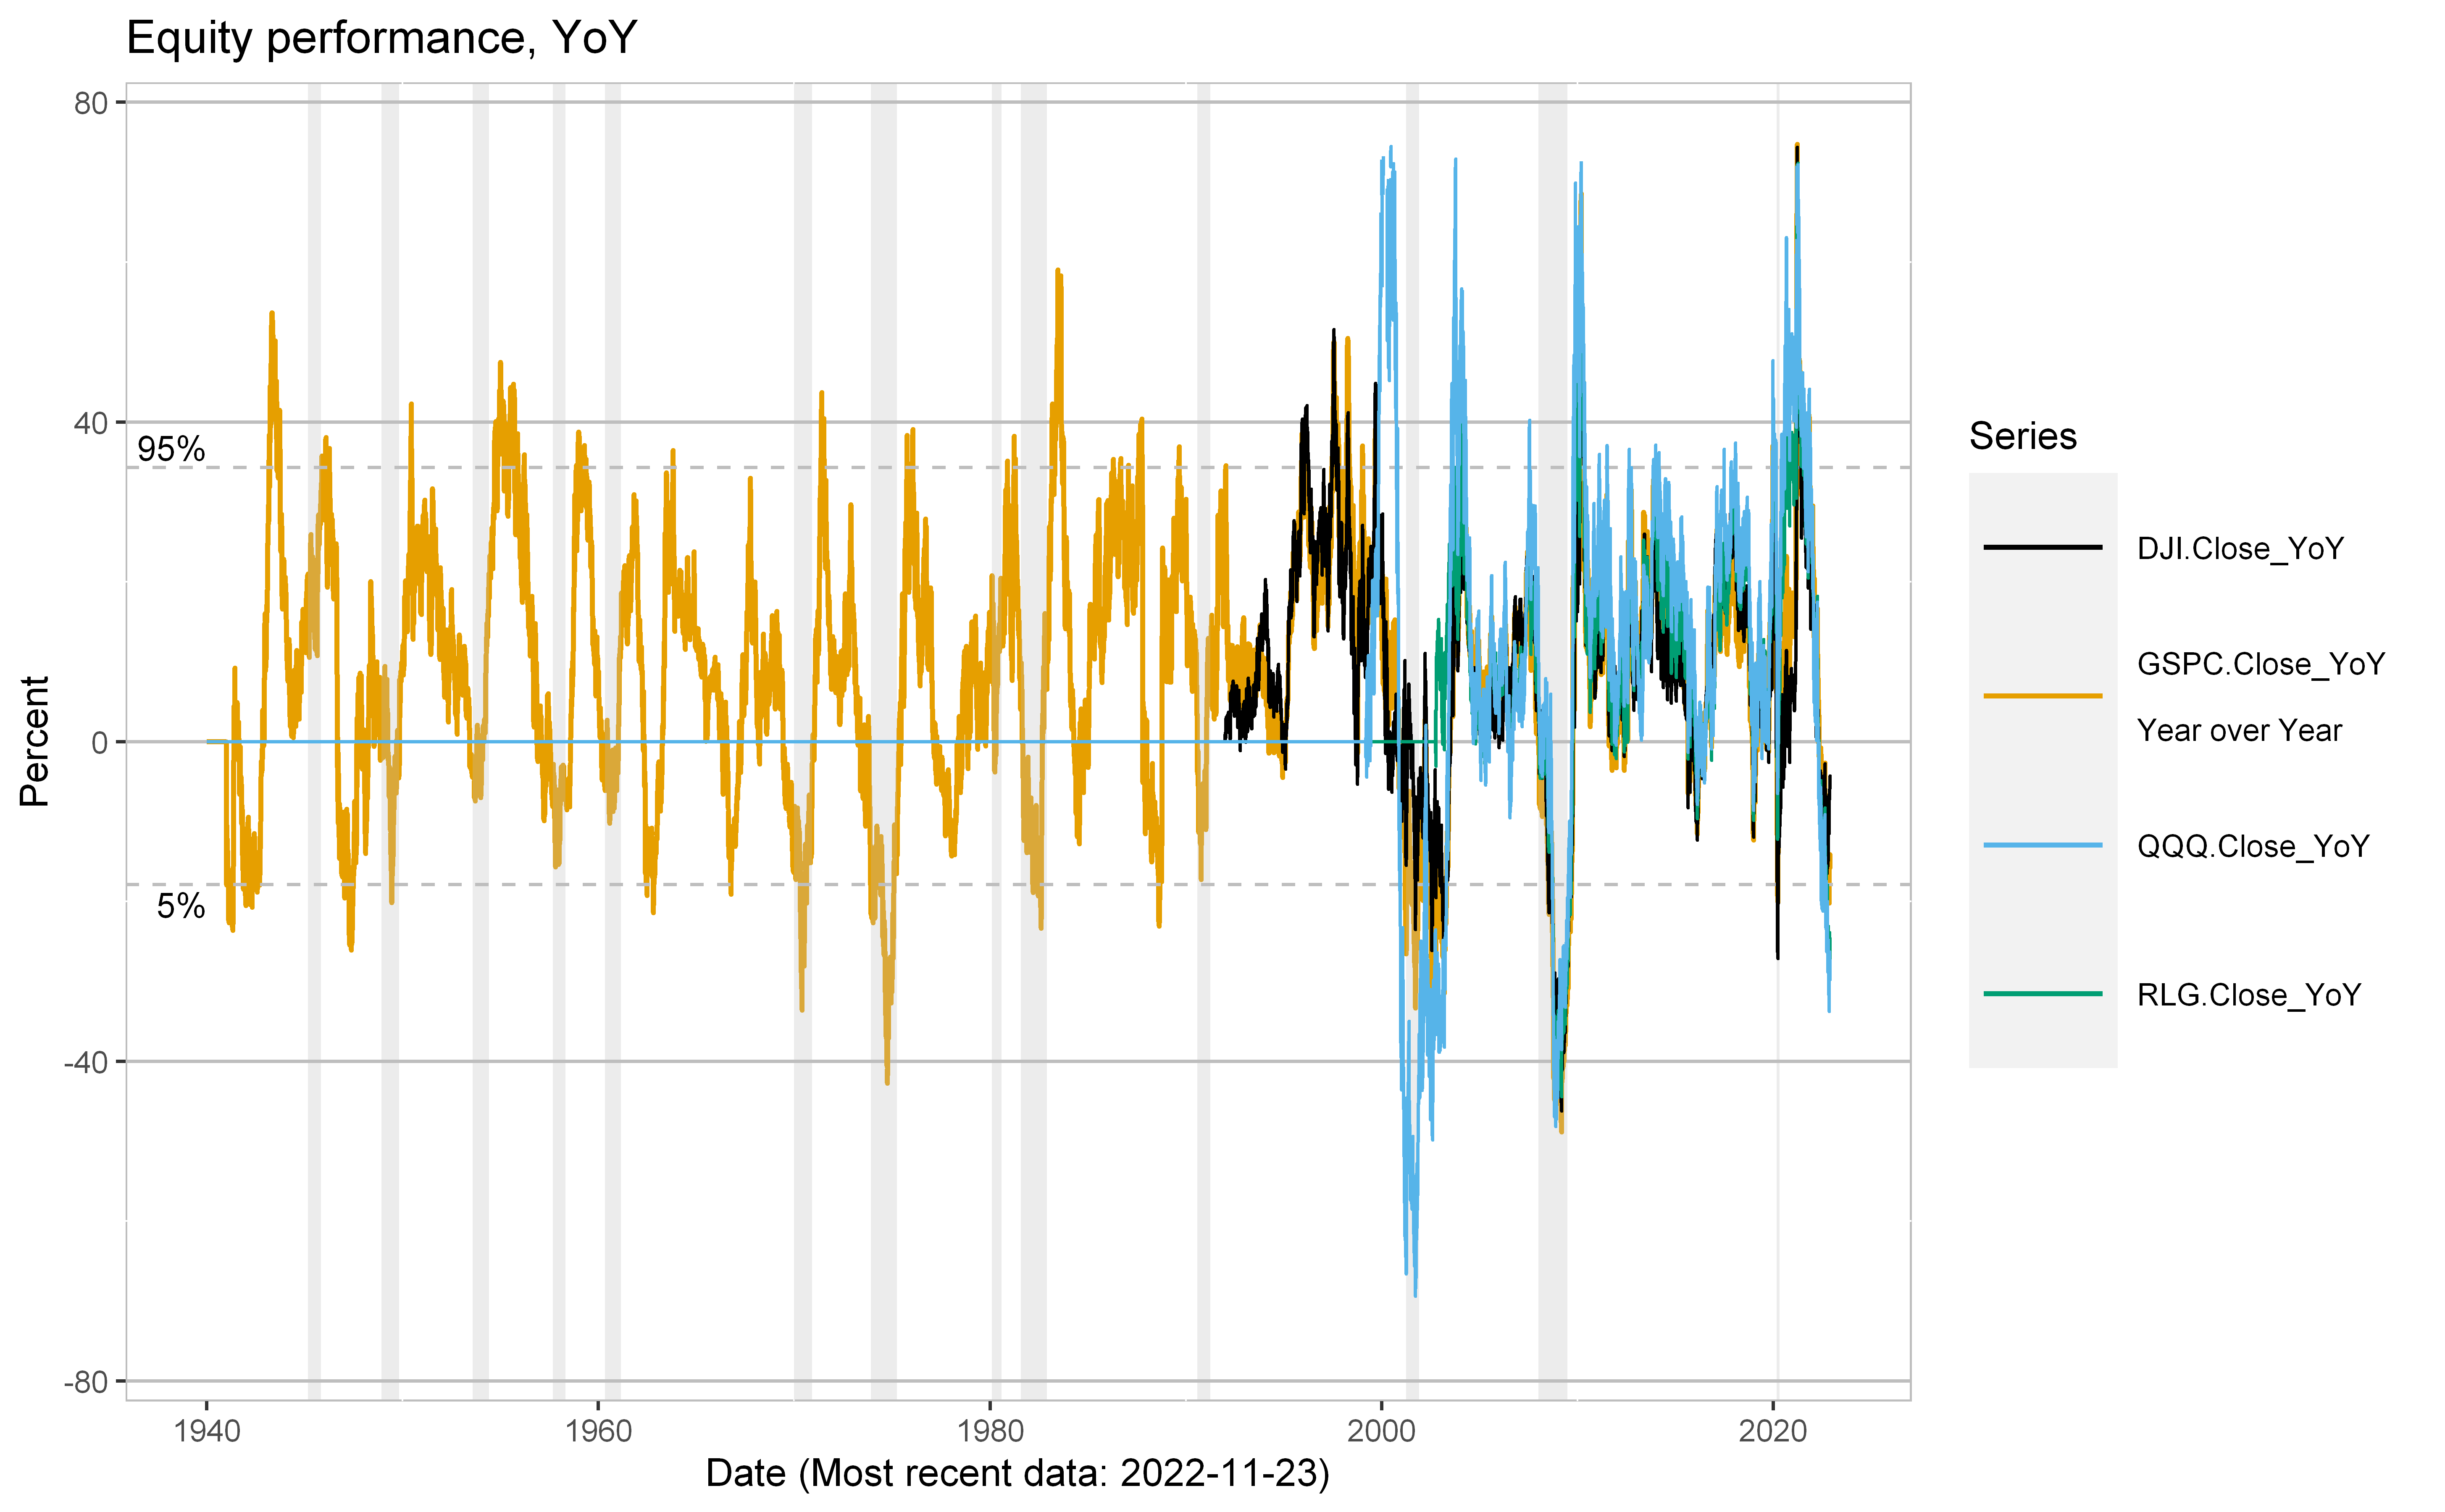

In [20]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
datay.aux.3 <- "QQQ.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "Equity performance, YoY",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 <- p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.3,
    colour = shQuote(datay.aux.3)
  ),
  na.rm = TRUE
)

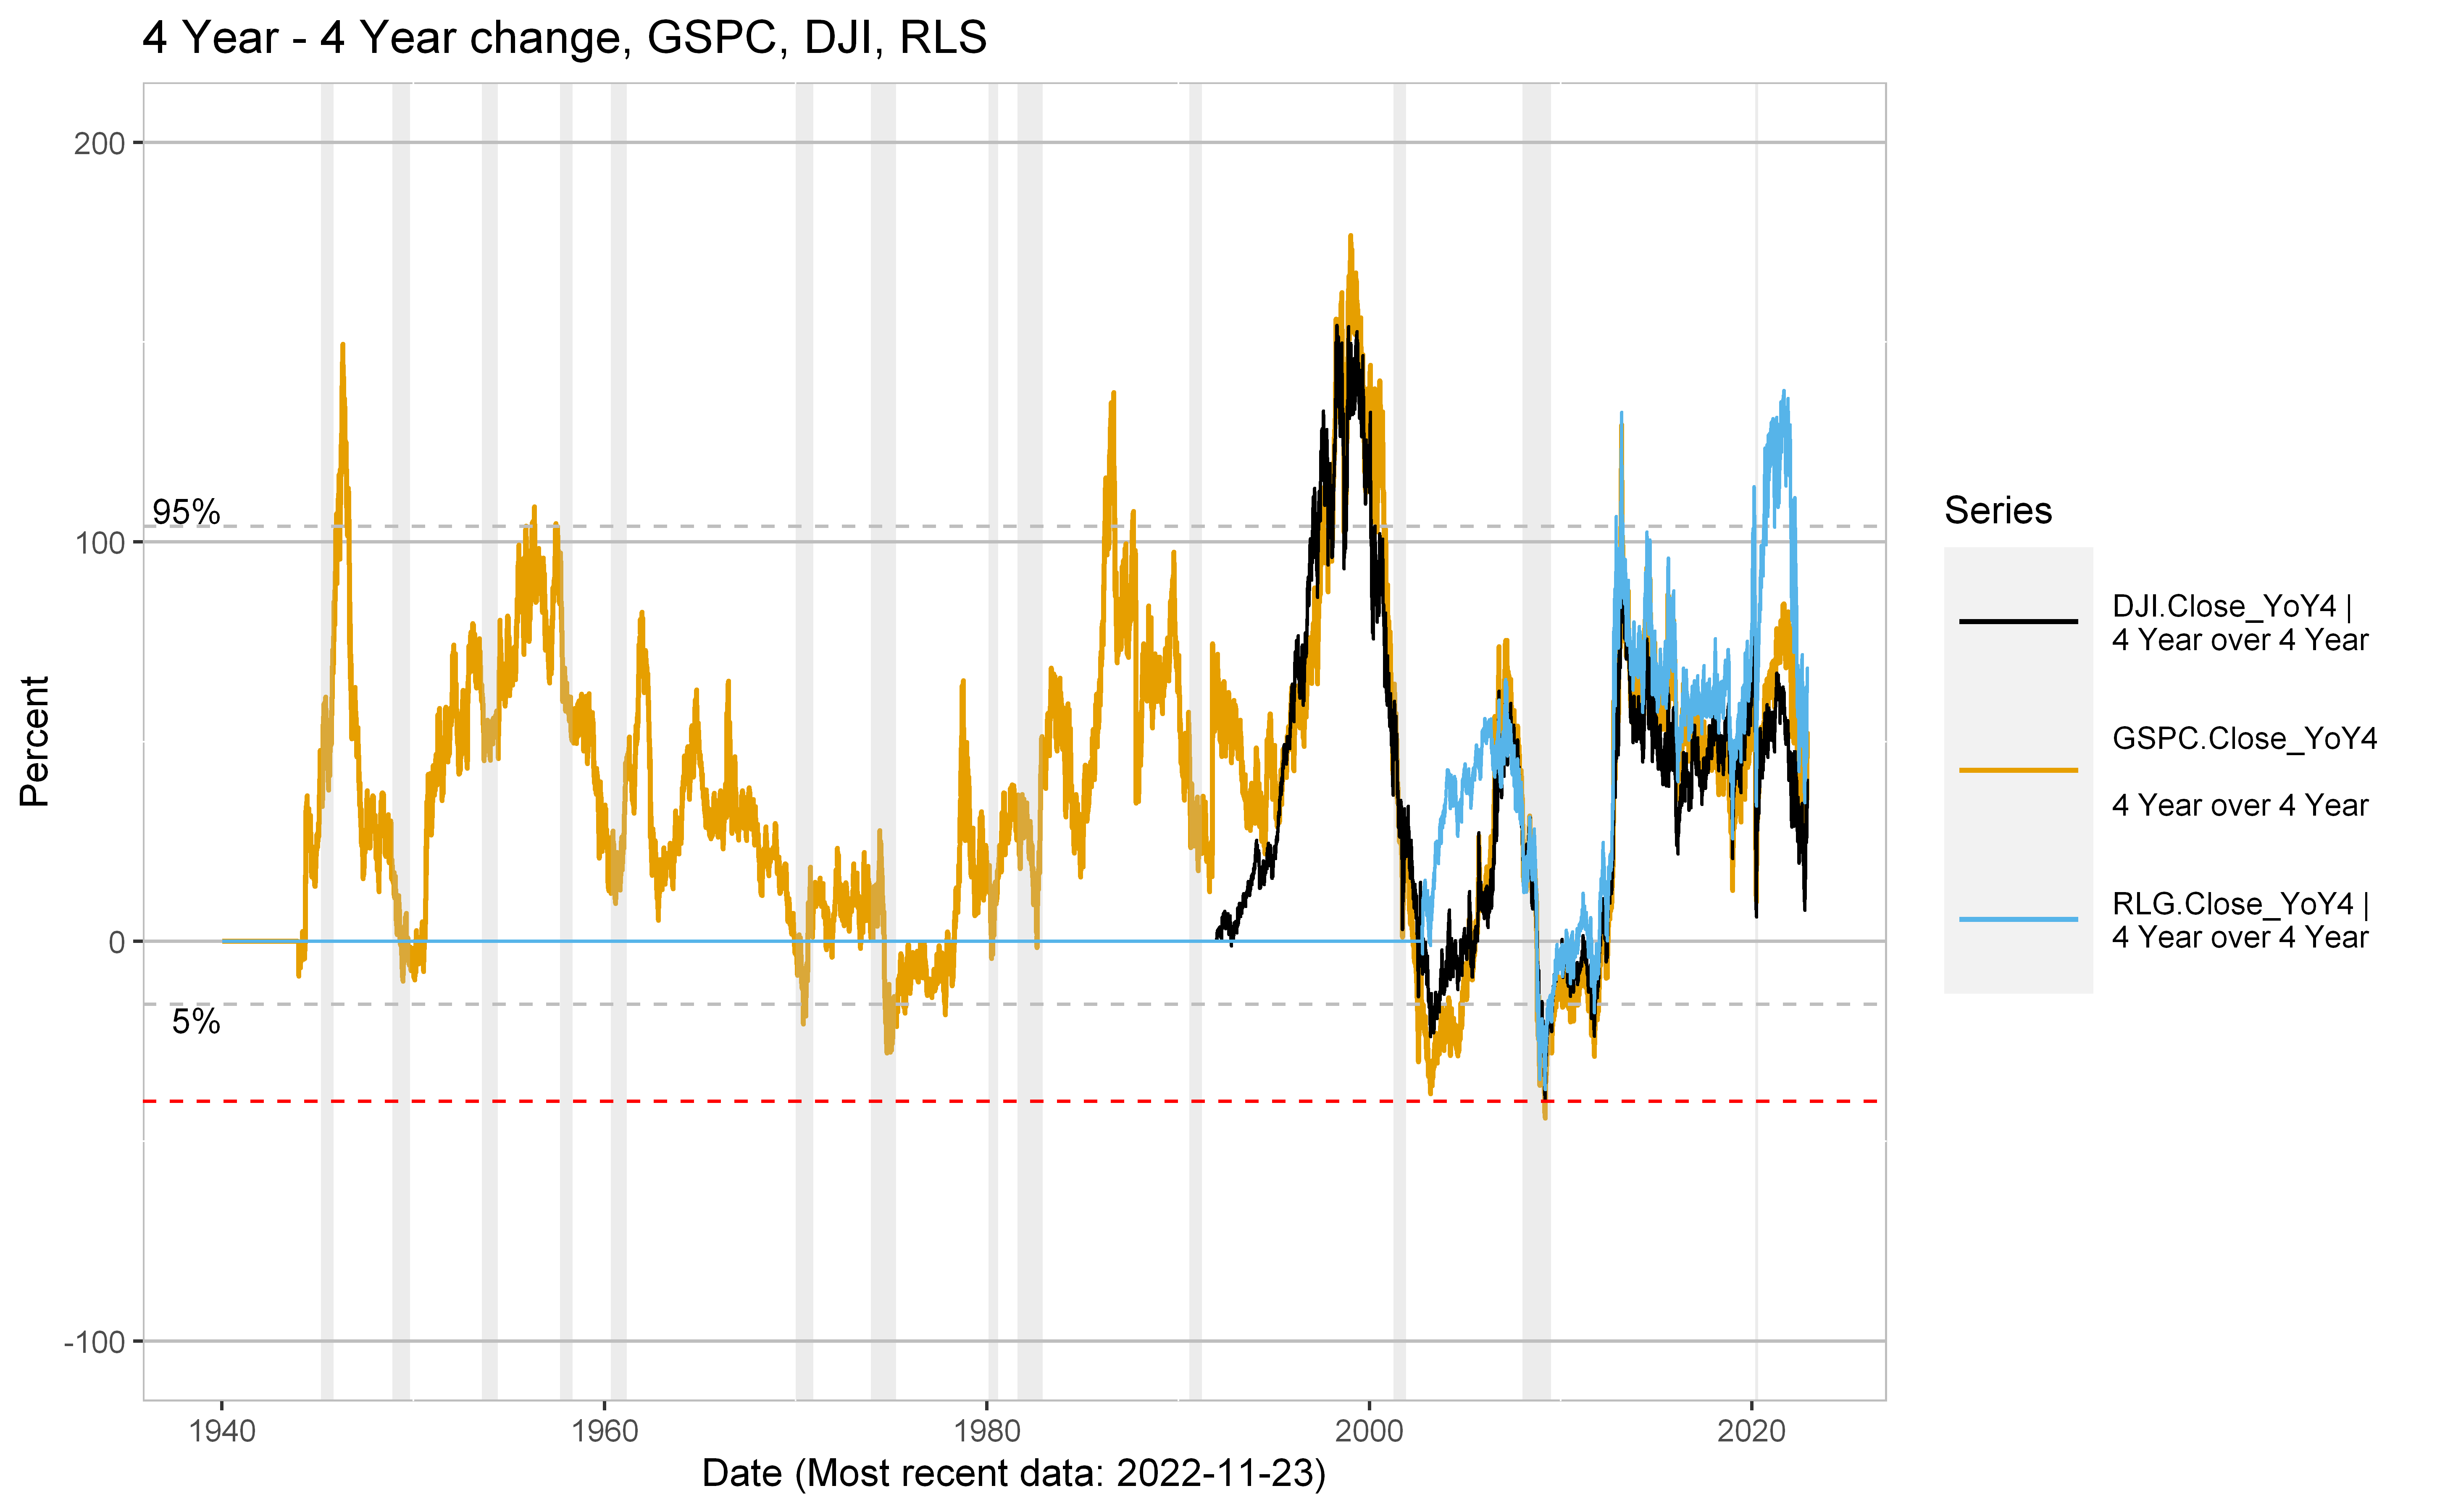

In [21]:
datay.in <- "GSPC.Close_YoY4"
datay.aux.1 <- "DJI.Close_YoY4"
datay.aux.2 <- "RLG.Close_YoY4"
ylim.in <- c(-100, 200)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "4 Year - 4 Year change, GSPC, DJI, RLS",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.1))
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")
p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.2))
  ),
  na.rm = TRUE
)

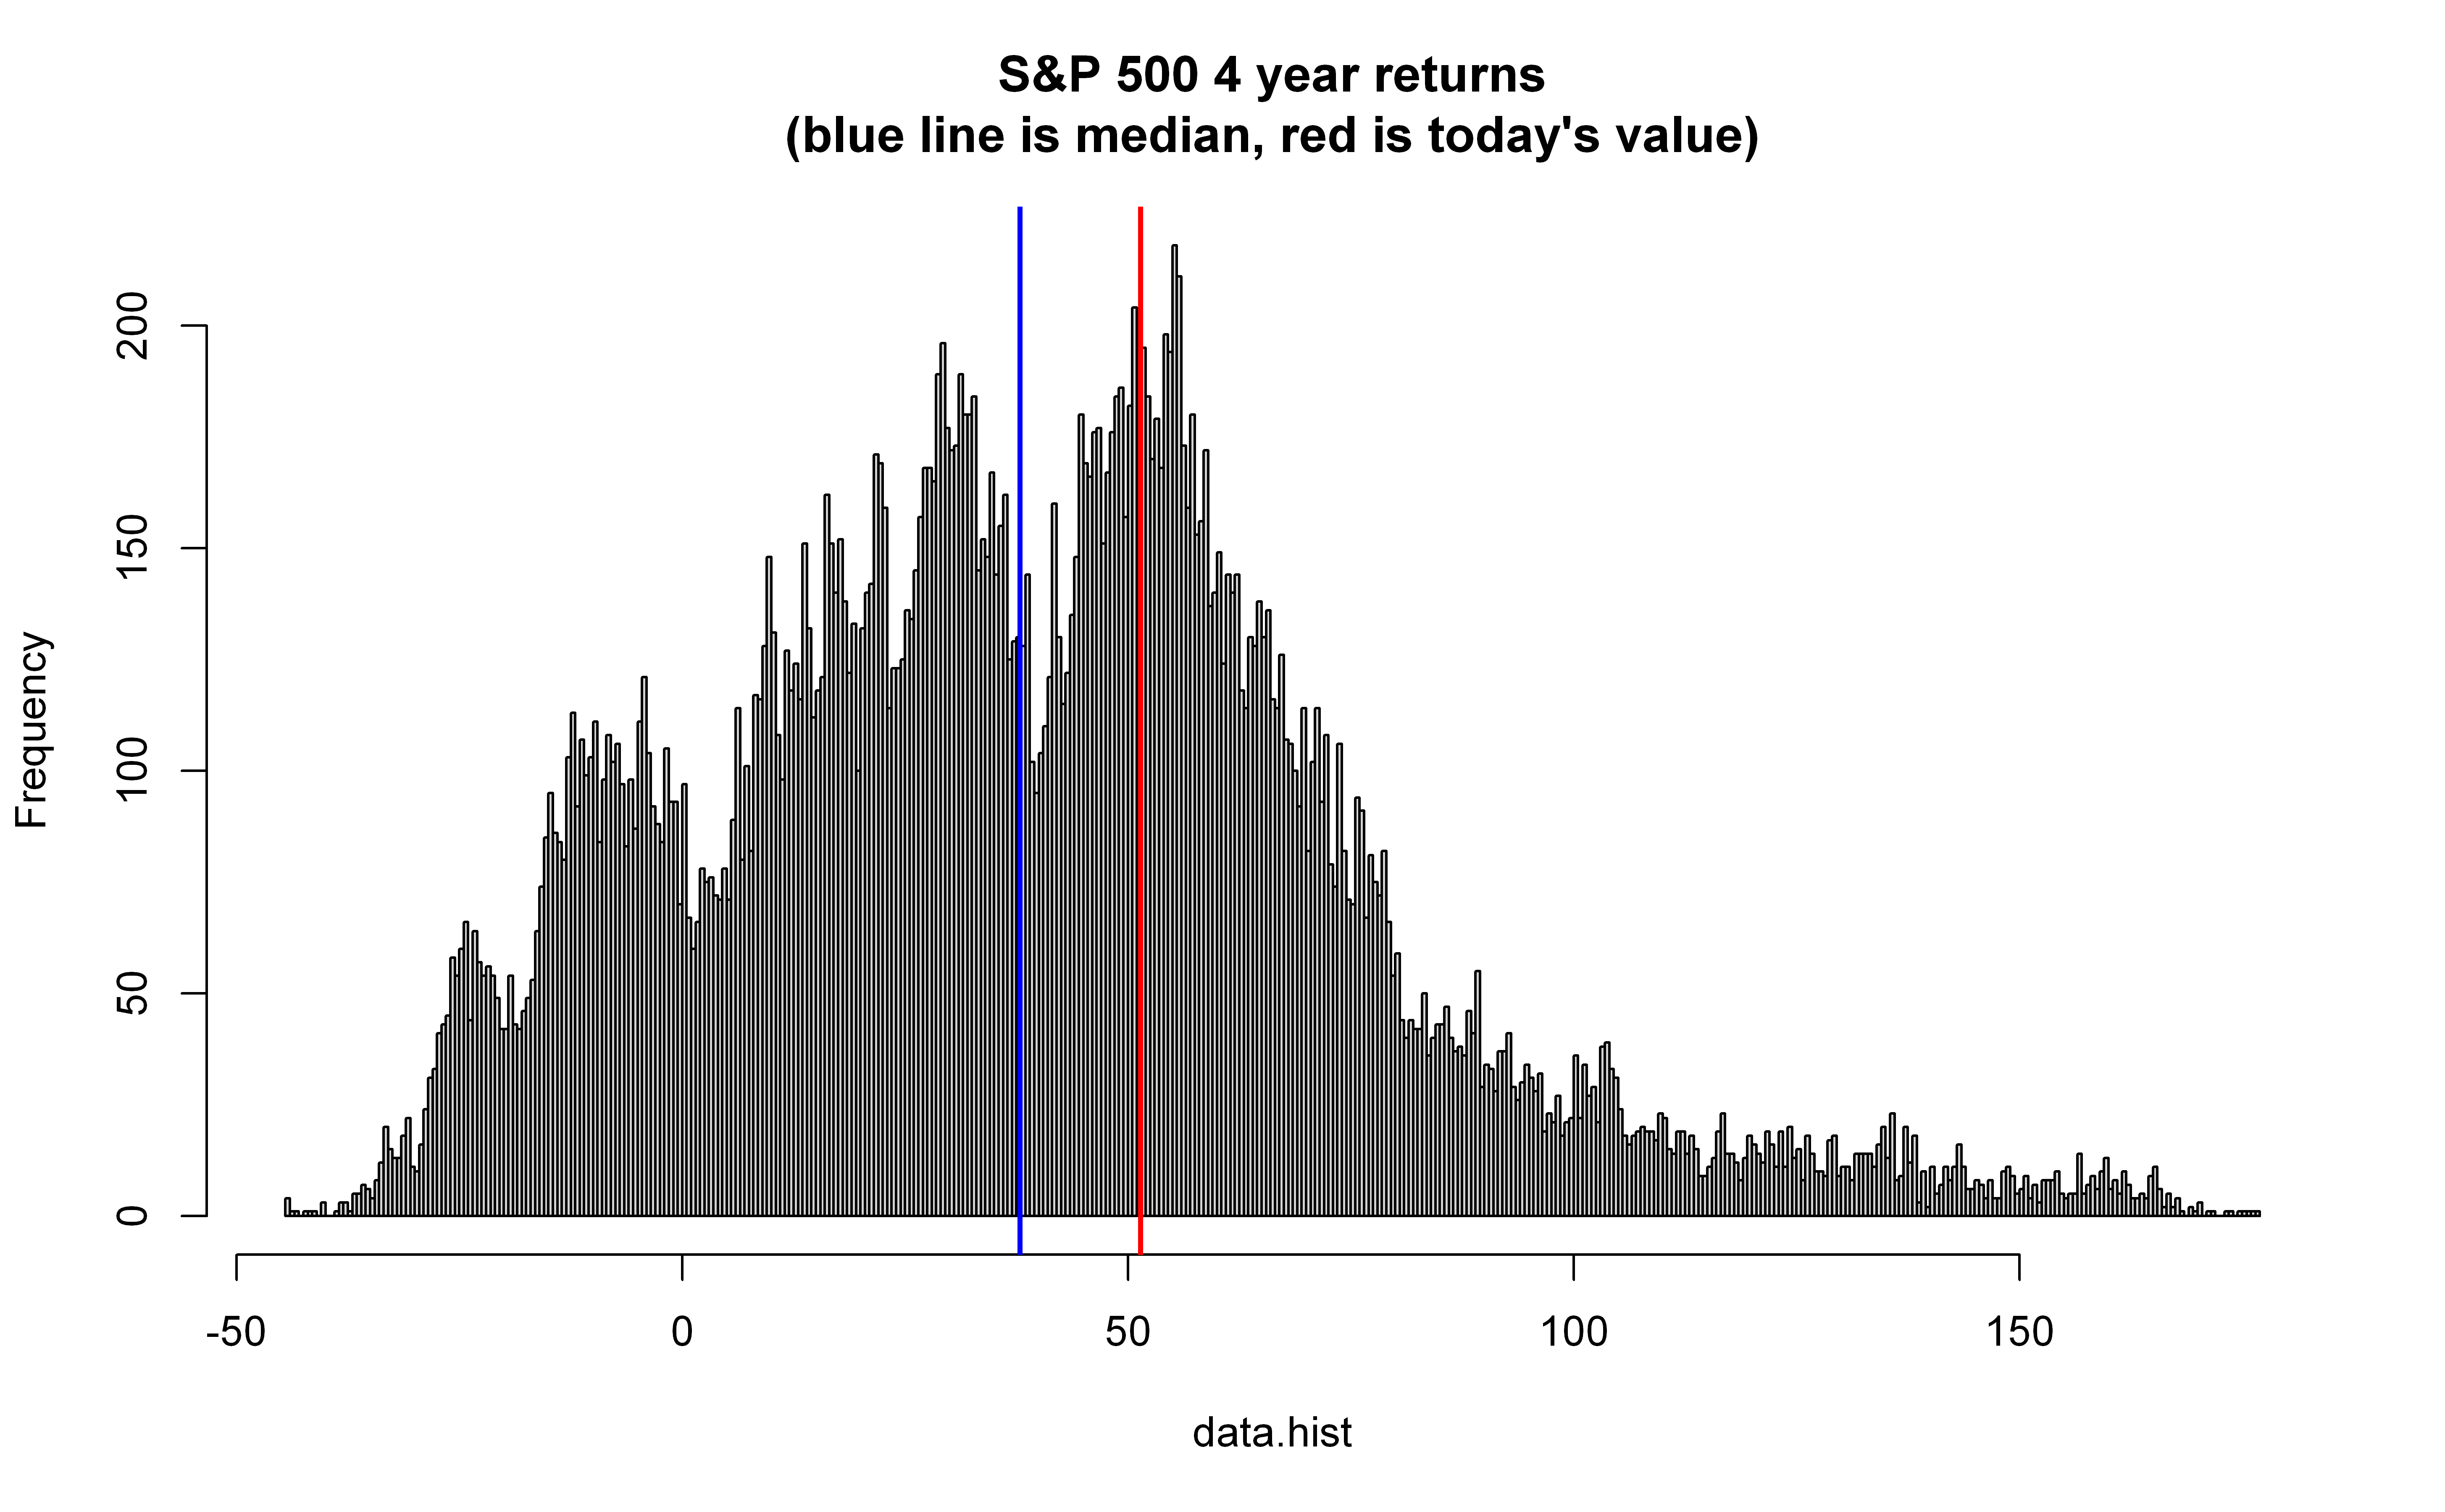

In [22]:
data.hist <- df.data$GSPC.Close_YoY4[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
my.h <- hist(data.hist,breaks=500,main="S&P 500 4 year returns\n(blue line is median, red is today's value)")
abline(v = median(data.hist), col = "blue", lwd = 2)
abline(v = tail(data.hist,1), col = "red", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

Really interested in how likely a 40% decline is 4 years after a peak

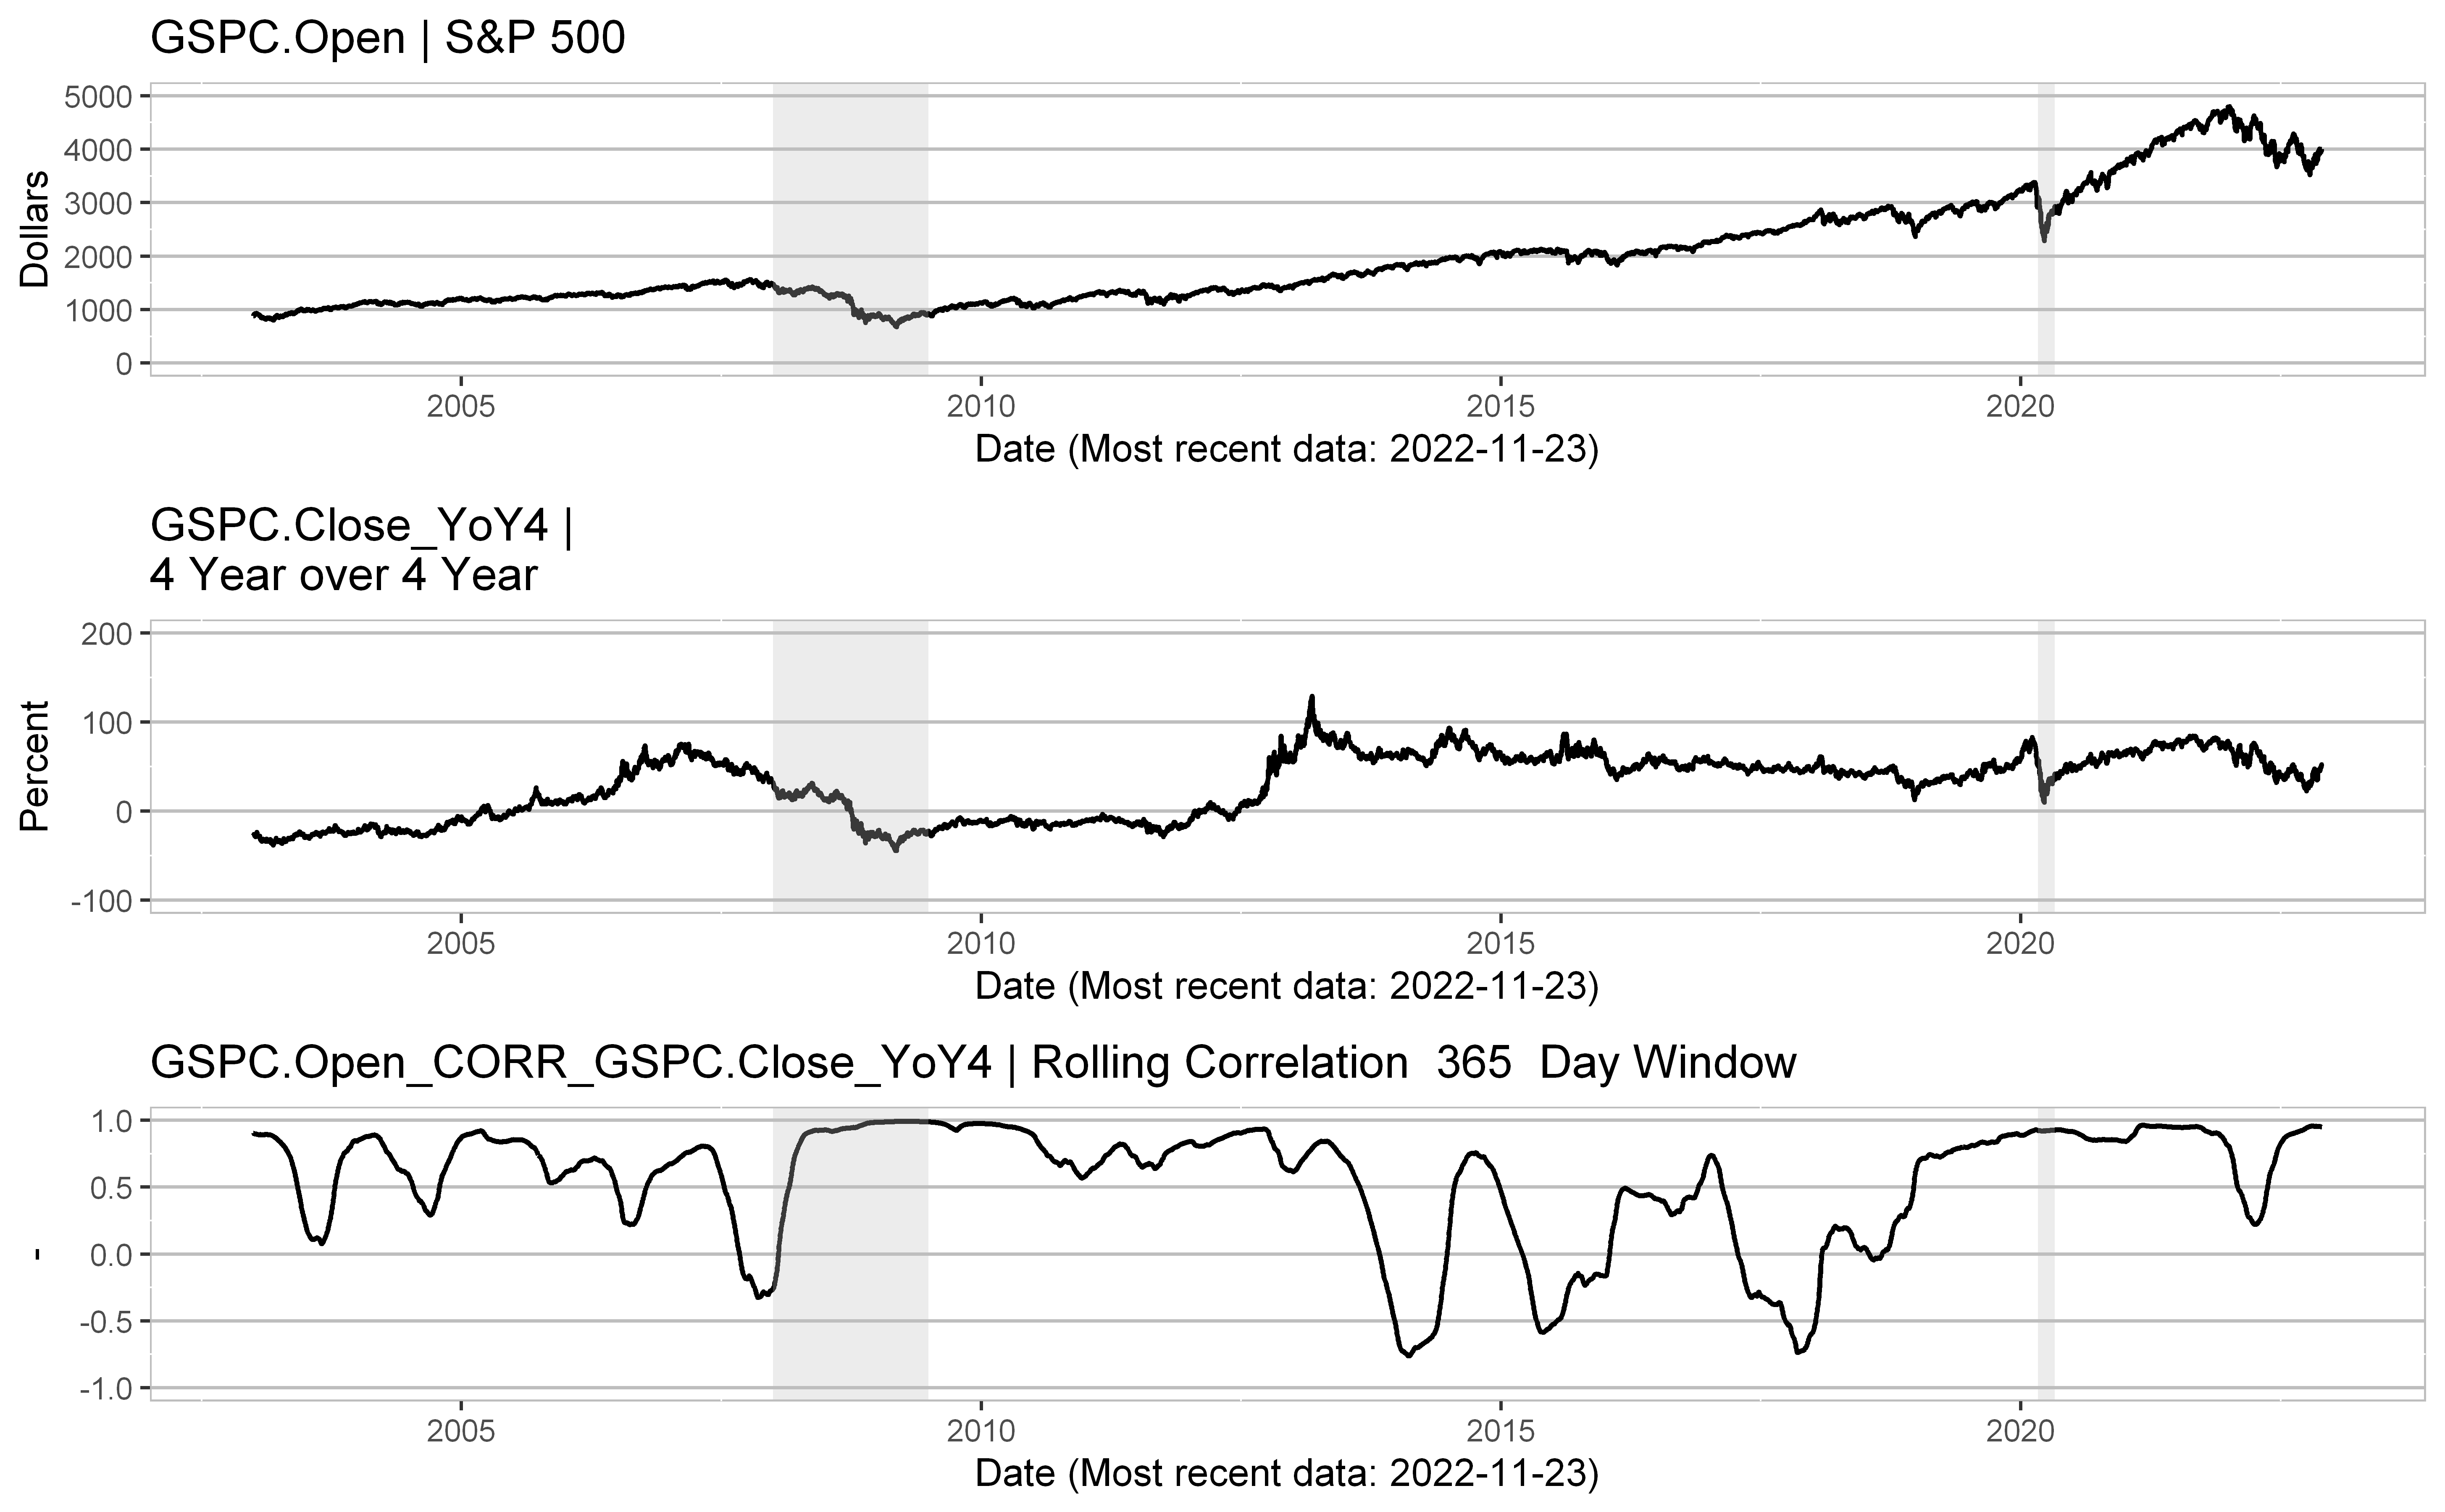

In [23]:
datay1 <- "GSPC.Open"
ylim1 <- c(0, d.GSPC.max)

datay2 <- "GSPC.Close_YoY4"
ylim2 <- c(-100, 200)

dtStart <- as.Date("1jan2003","%d%b%Y")

w <- 365
corrName <- calcRollingCorr(dfRecession, df.data, df.symbols, datay1, ylim1, datay2, ylim2, w, dtStart)


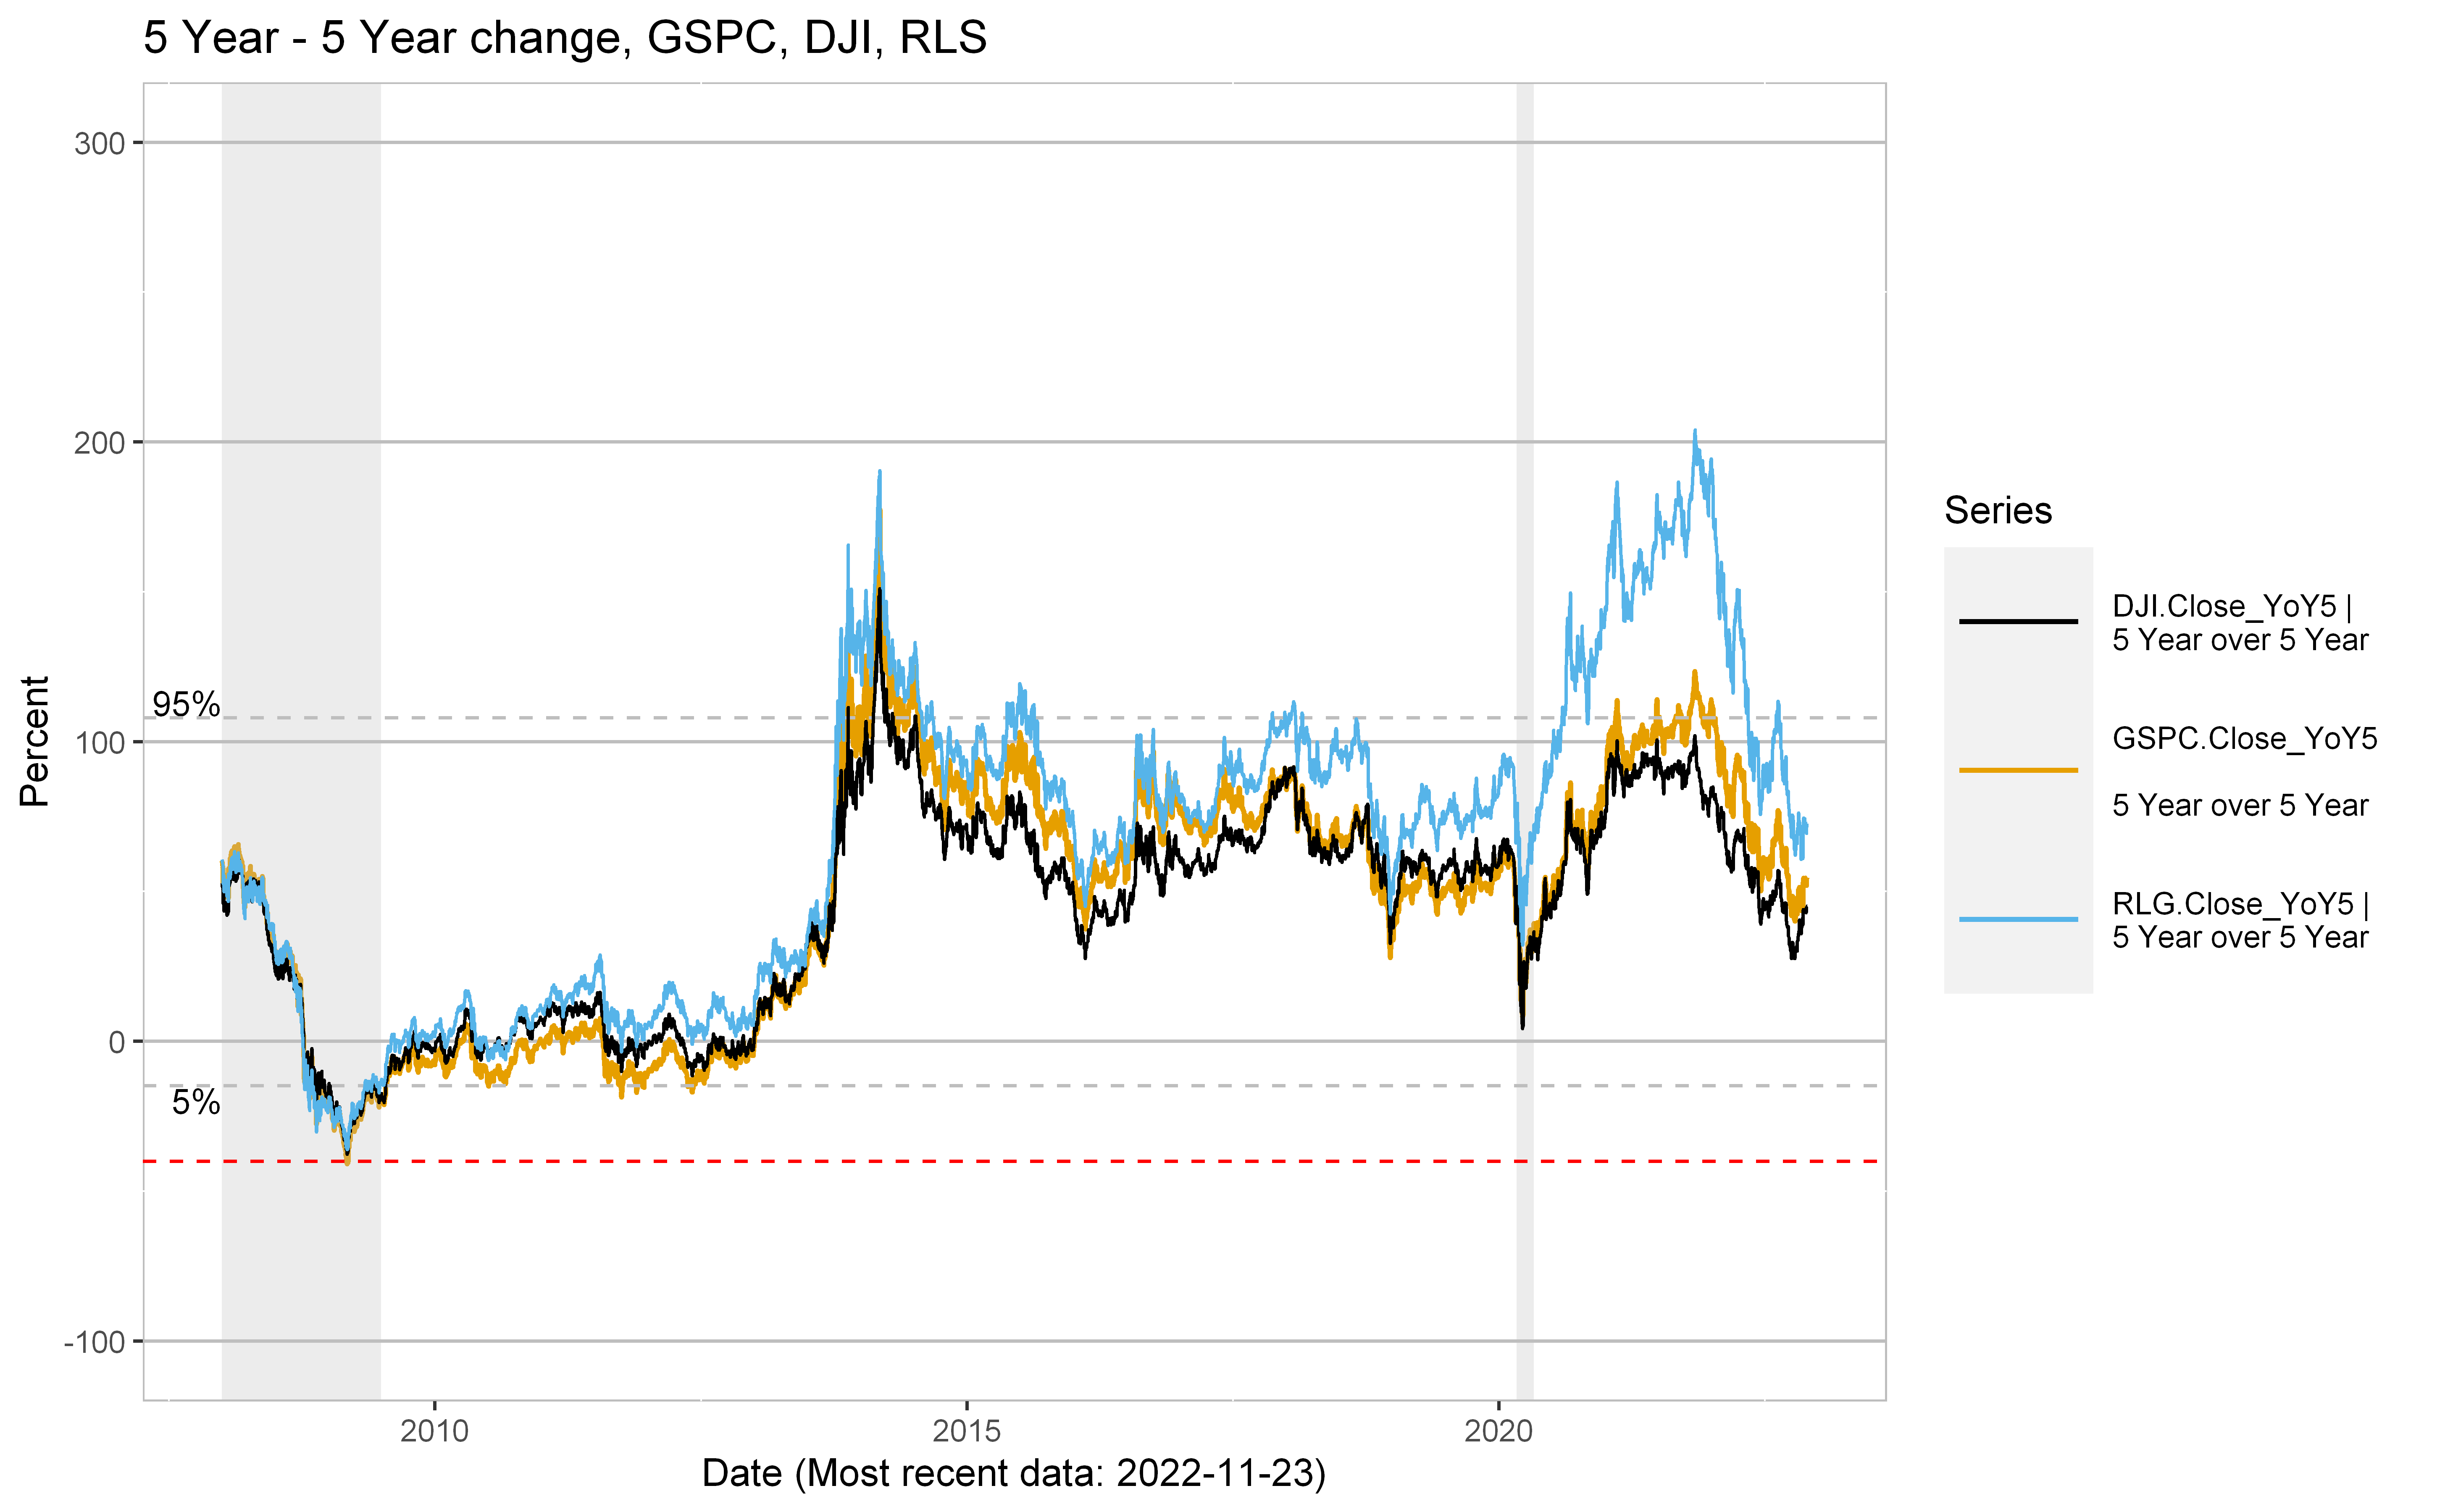

In [24]:
datay.in <- "GSPC.Close_YoY5"
datay.aux.1 <- "DJI.Close_YoY5"
datay.aux.2 <- "RLG.Close_YoY5"
ylim.in <- c(-100, 300)
dt.start <- as.Date('2008-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "5 Year - 5 Year change, GSPC, DJI, RLS",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.1))
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")
p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.2))
  ),
  na.rm = TRUE
)

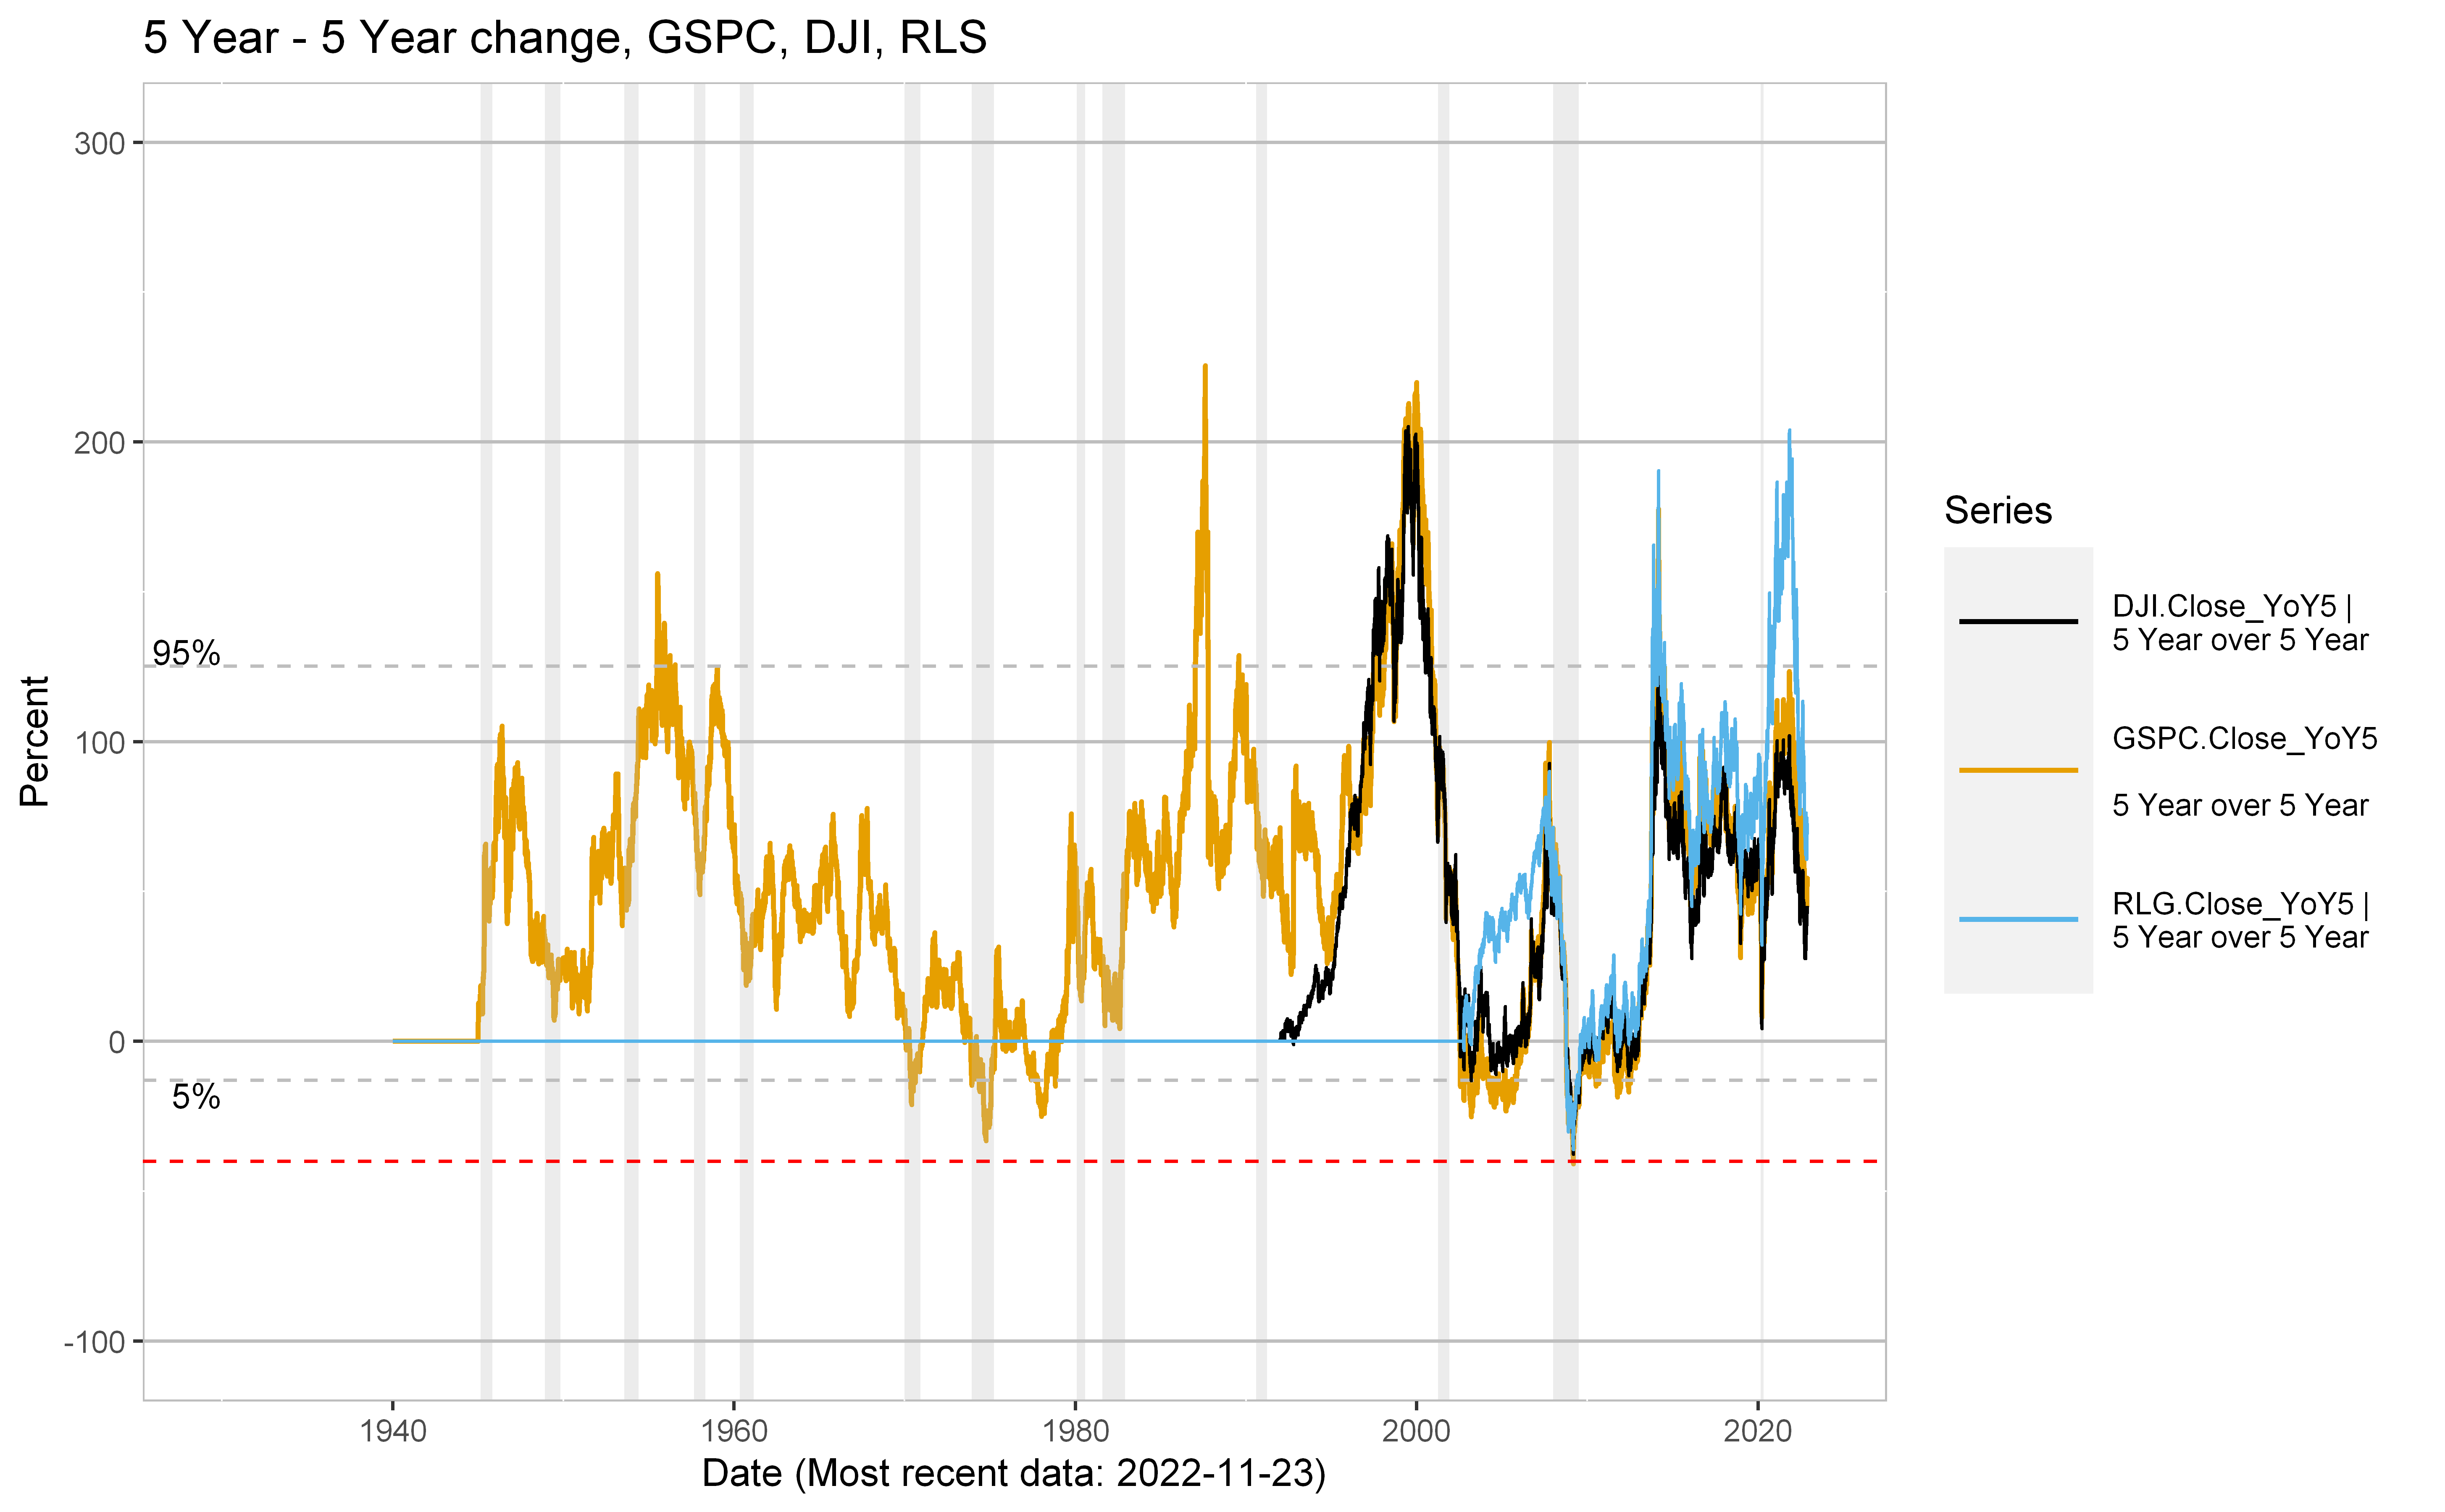

In [25]:
datay.in <- "GSPC.Close_YoY5"
datay.aux.1 <- "DJI.Close_YoY5"
datay.aux.2 <- "RLG.Close_YoY5"
ylim.in <- c(-100, 300)
dt.start <- as.Date('1930-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "5 Year - 5 Year change, GSPC, DJI, RLS",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.1))
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")
p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.2))
  ),
  na.rm = TRUE
)

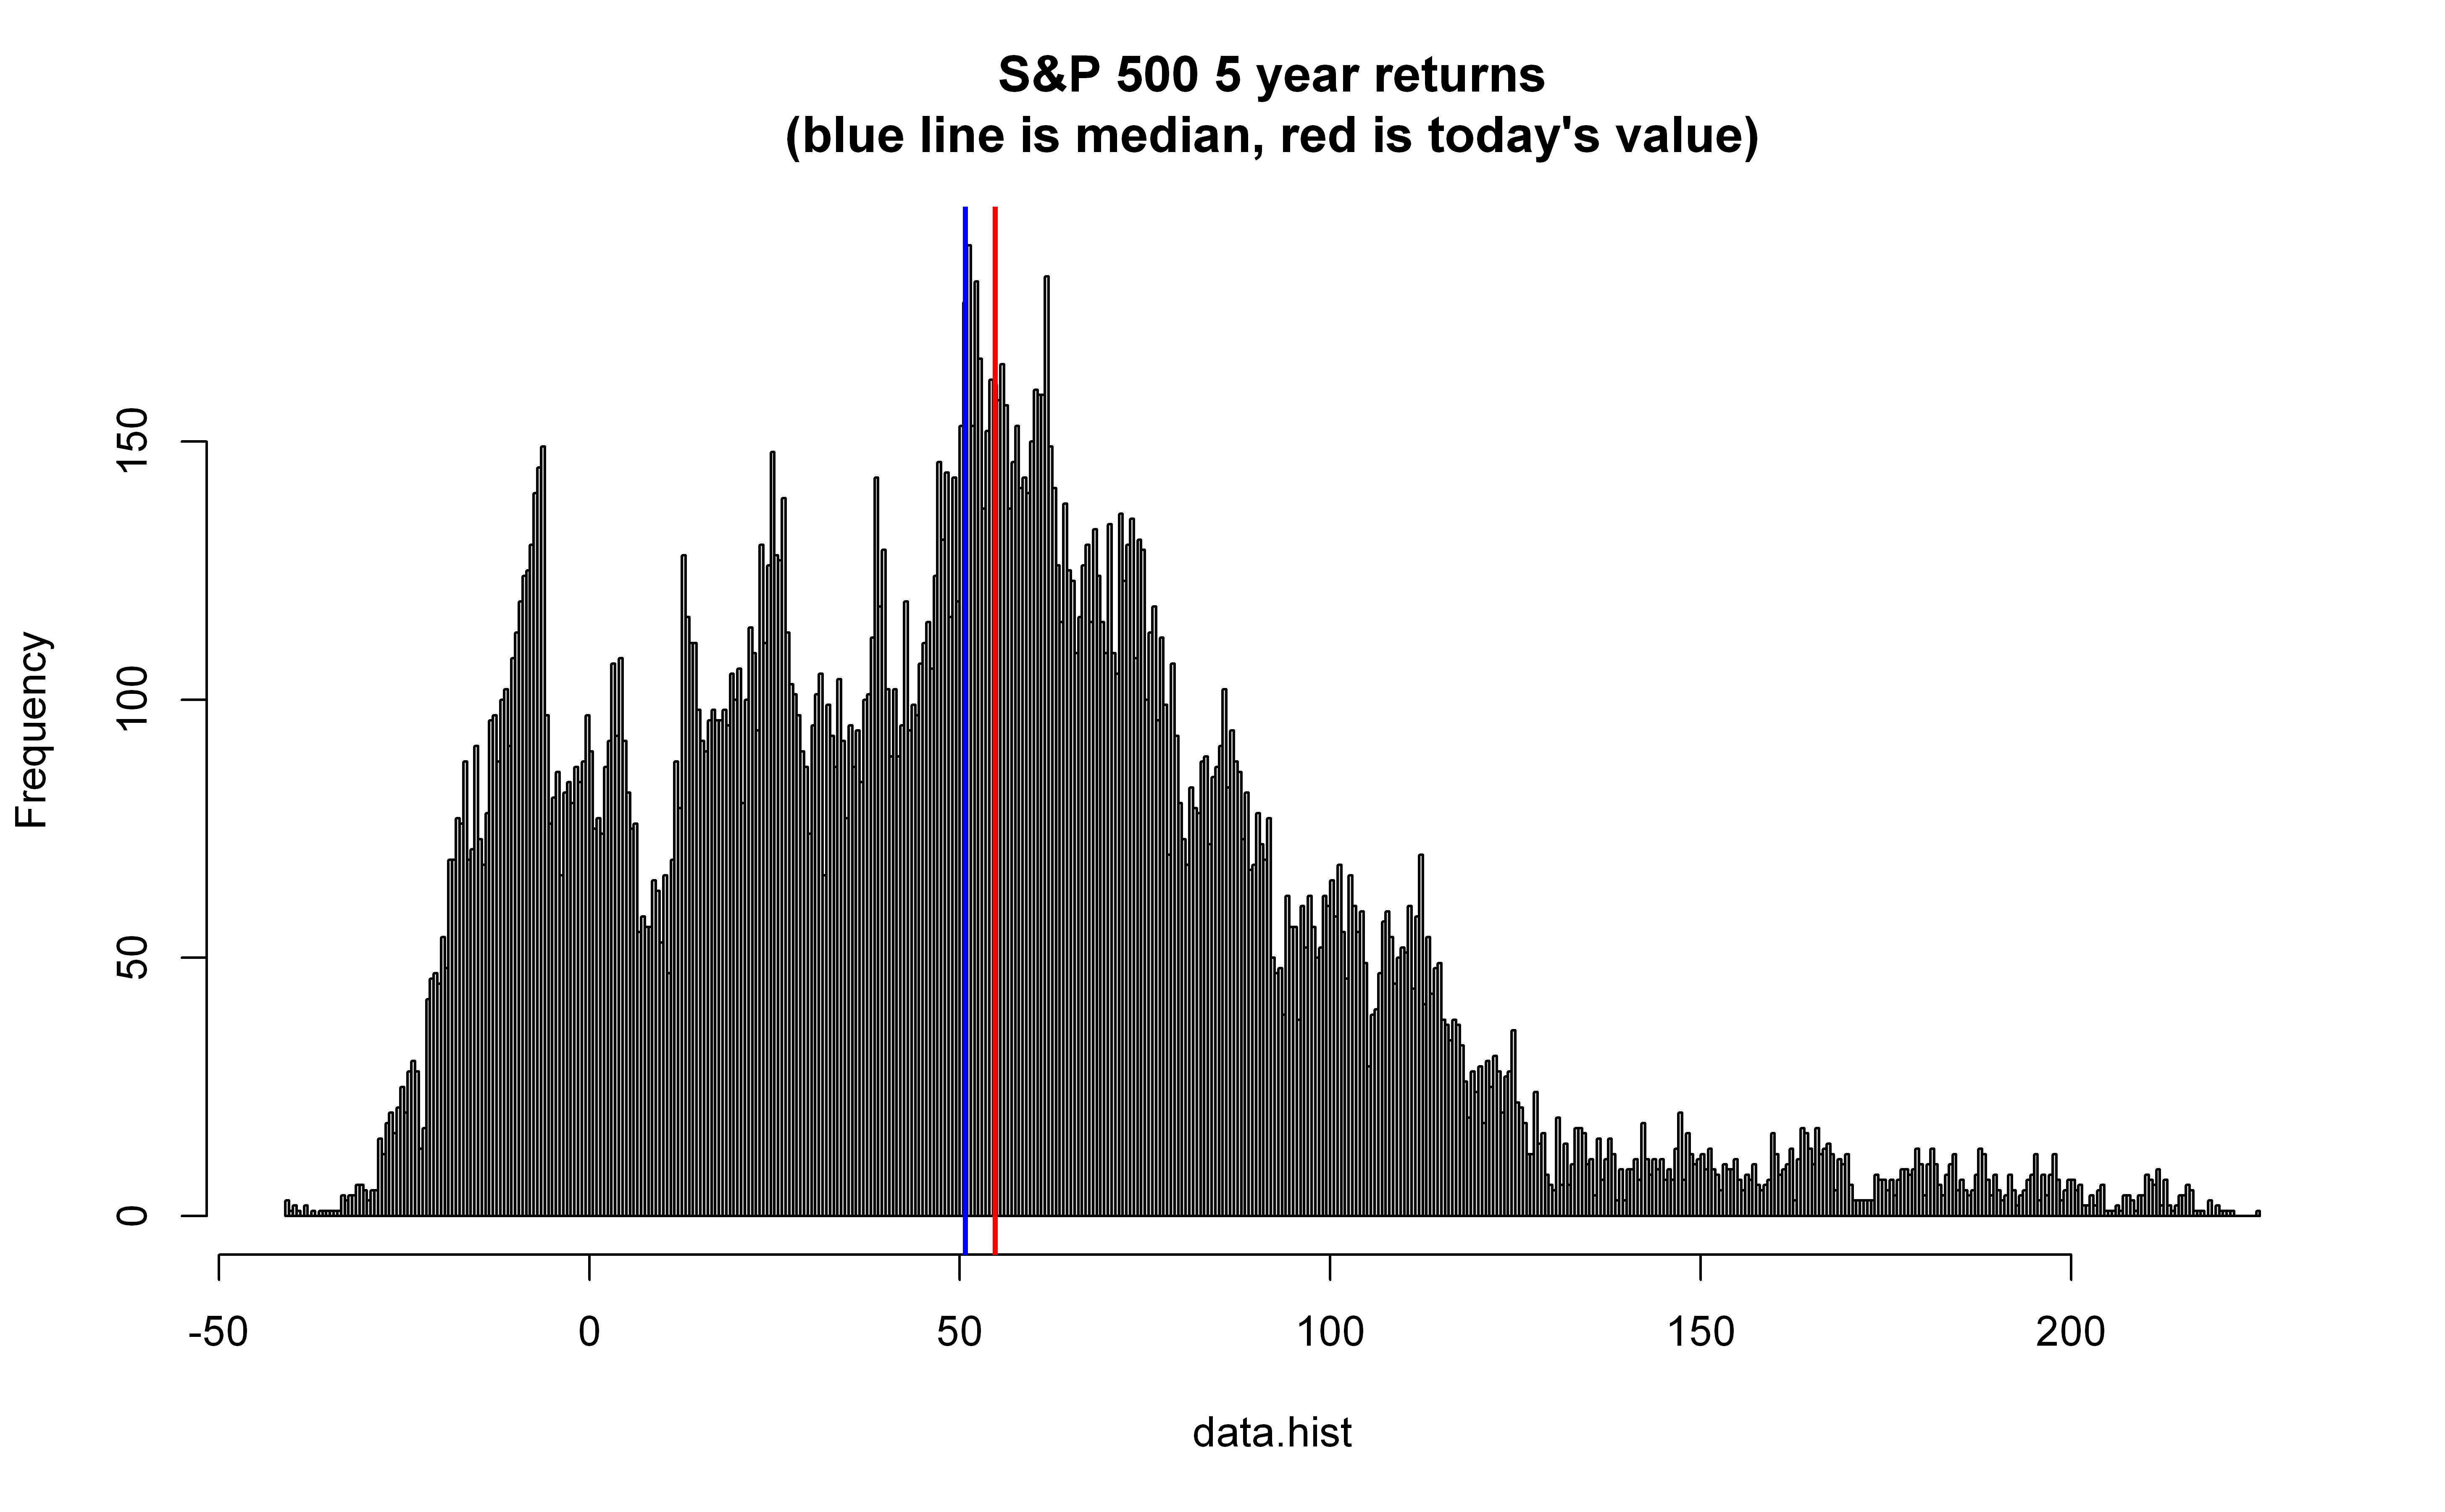

In [26]:
data.hist <- df.data$GSPC.Close_YoY5[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
my.h <- hist(data.hist,breaks=500,main="S&P 500 5 year returns\n(blue line is median, red is today's value)")
abline(v = median(data.hist), col = "blue", lwd = 2)
abline(v = tail(data.hist,1), col = "red", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

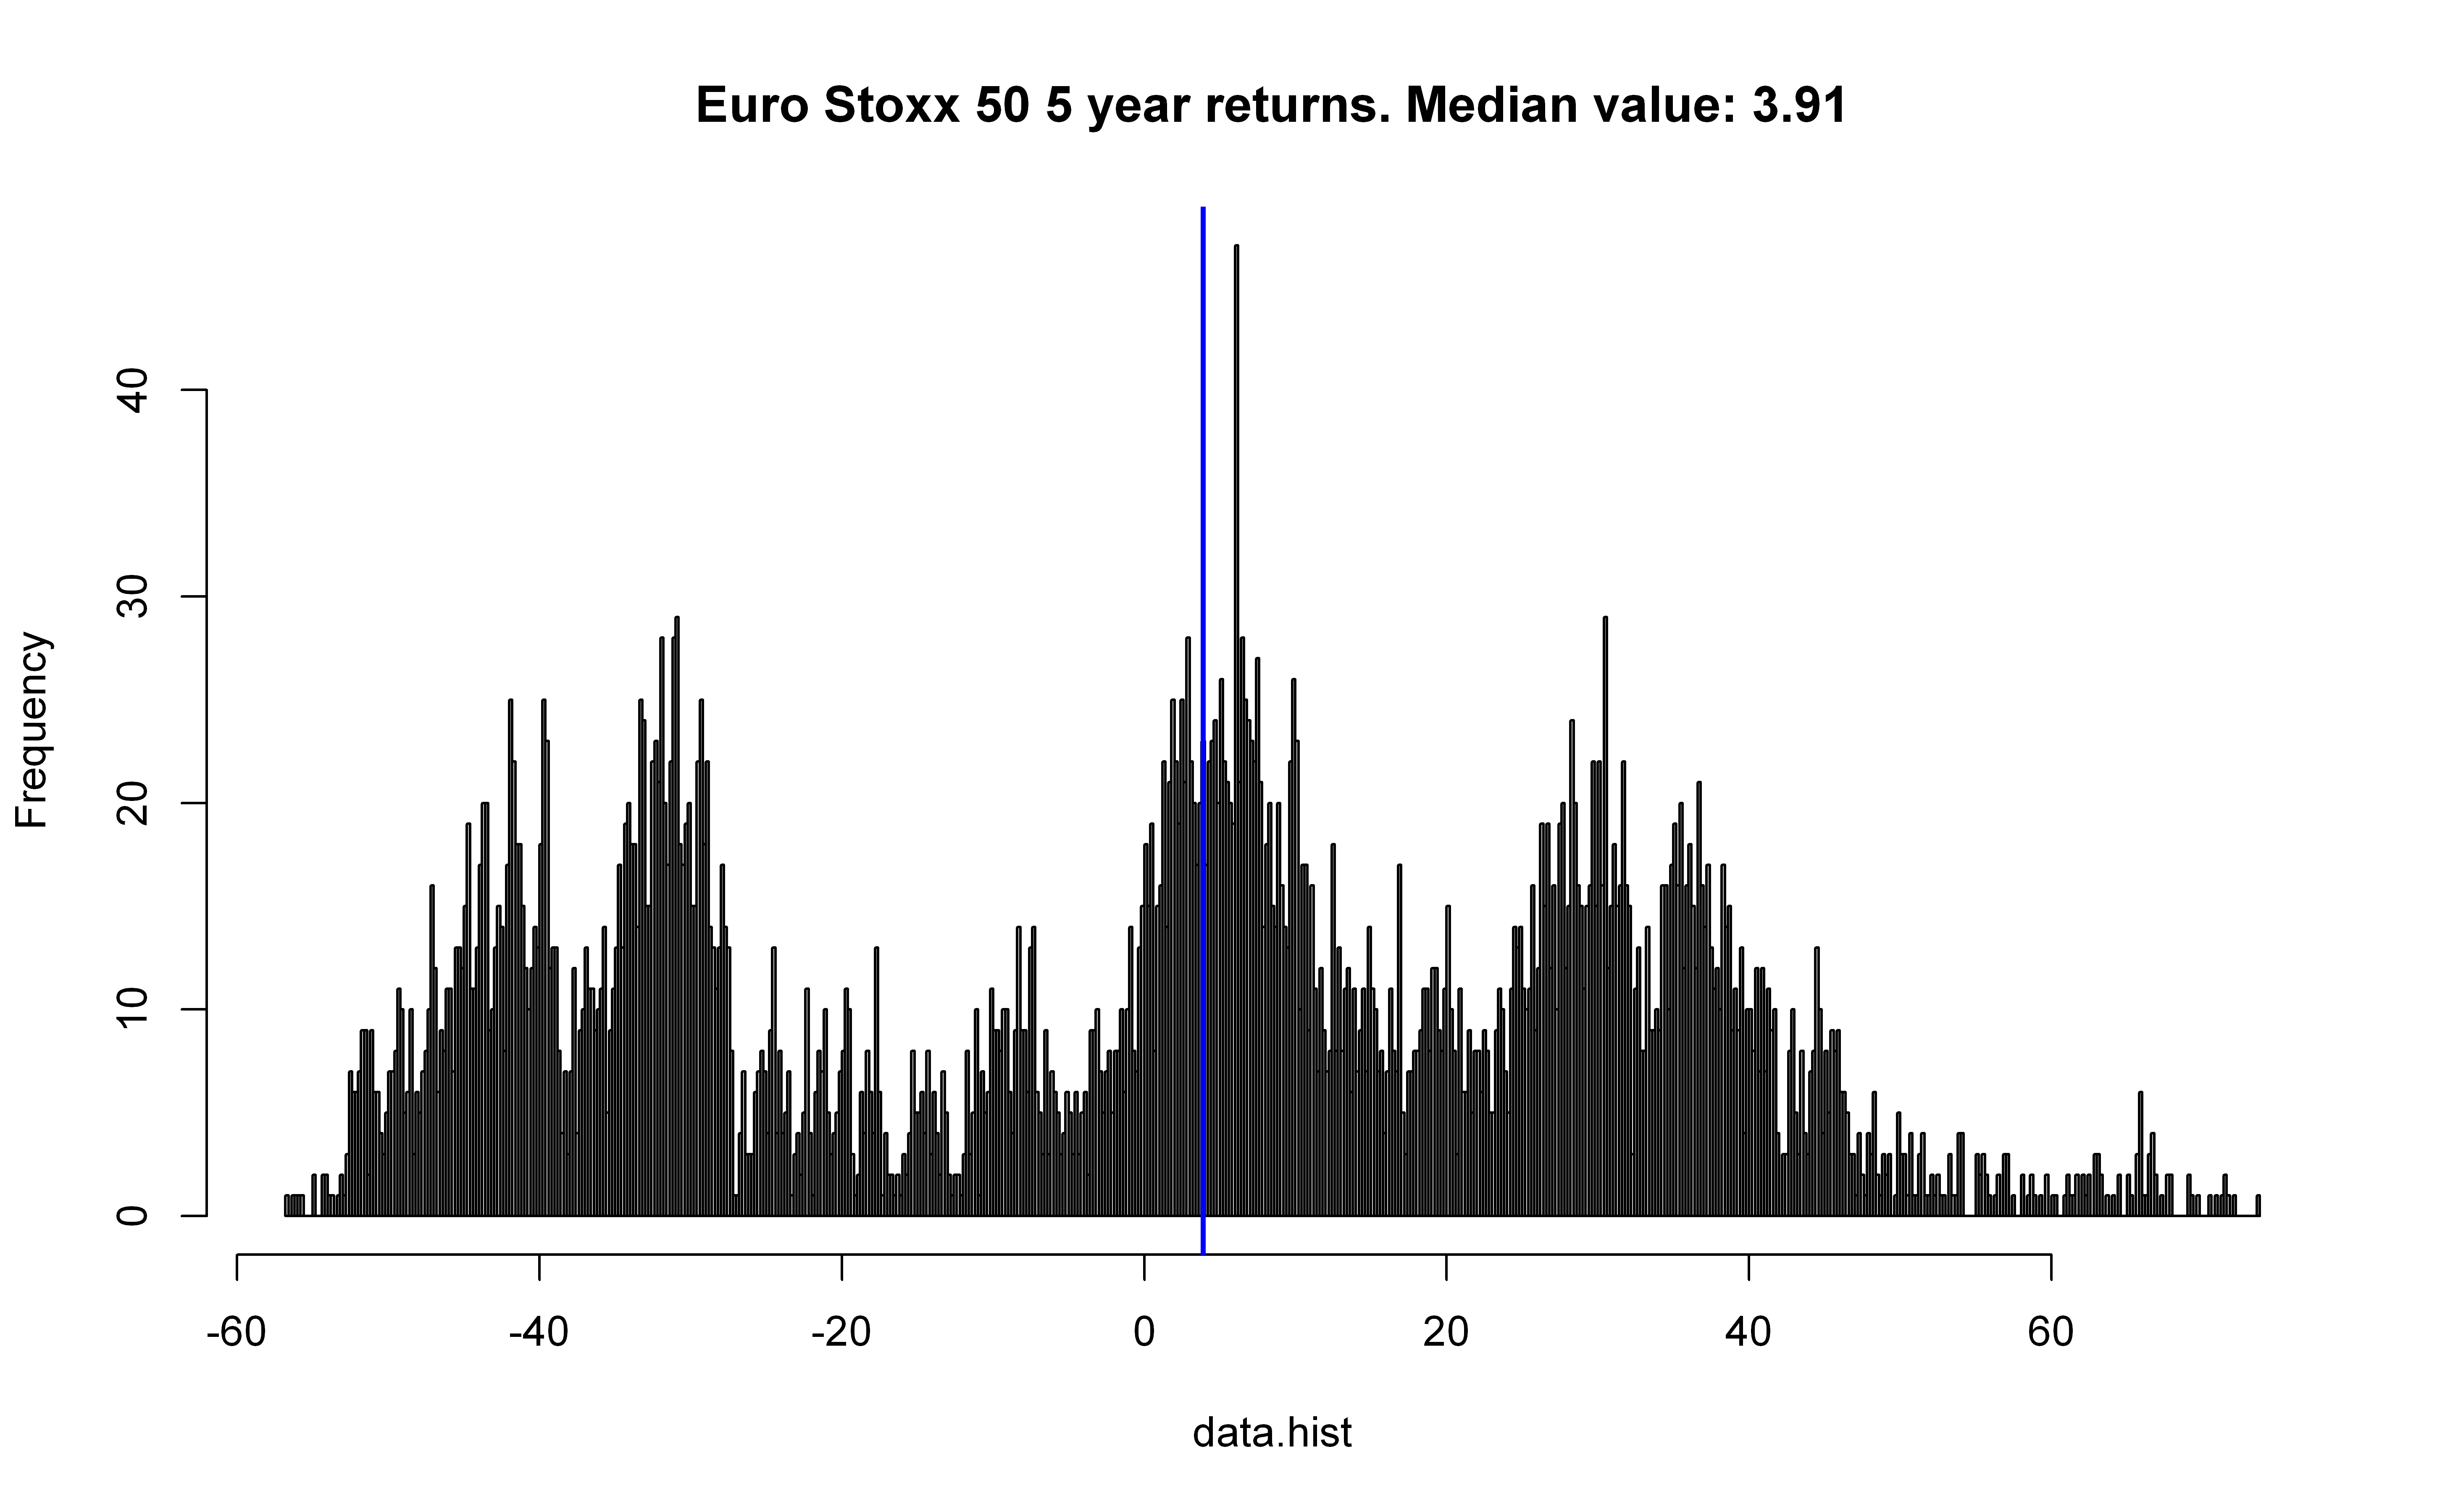

In [27]:
data.hist <- df.data$STOXX50E.Open_YoY5[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
data.med <- median(data.hist)
my.h <- hist(data.hist,breaks=500,
             main=paste("Euro Stoxx 50 5 year returns. Median value:",format(round(data.med, 2), nsmall = 2)))
abline(v = data.med, col = "blue", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

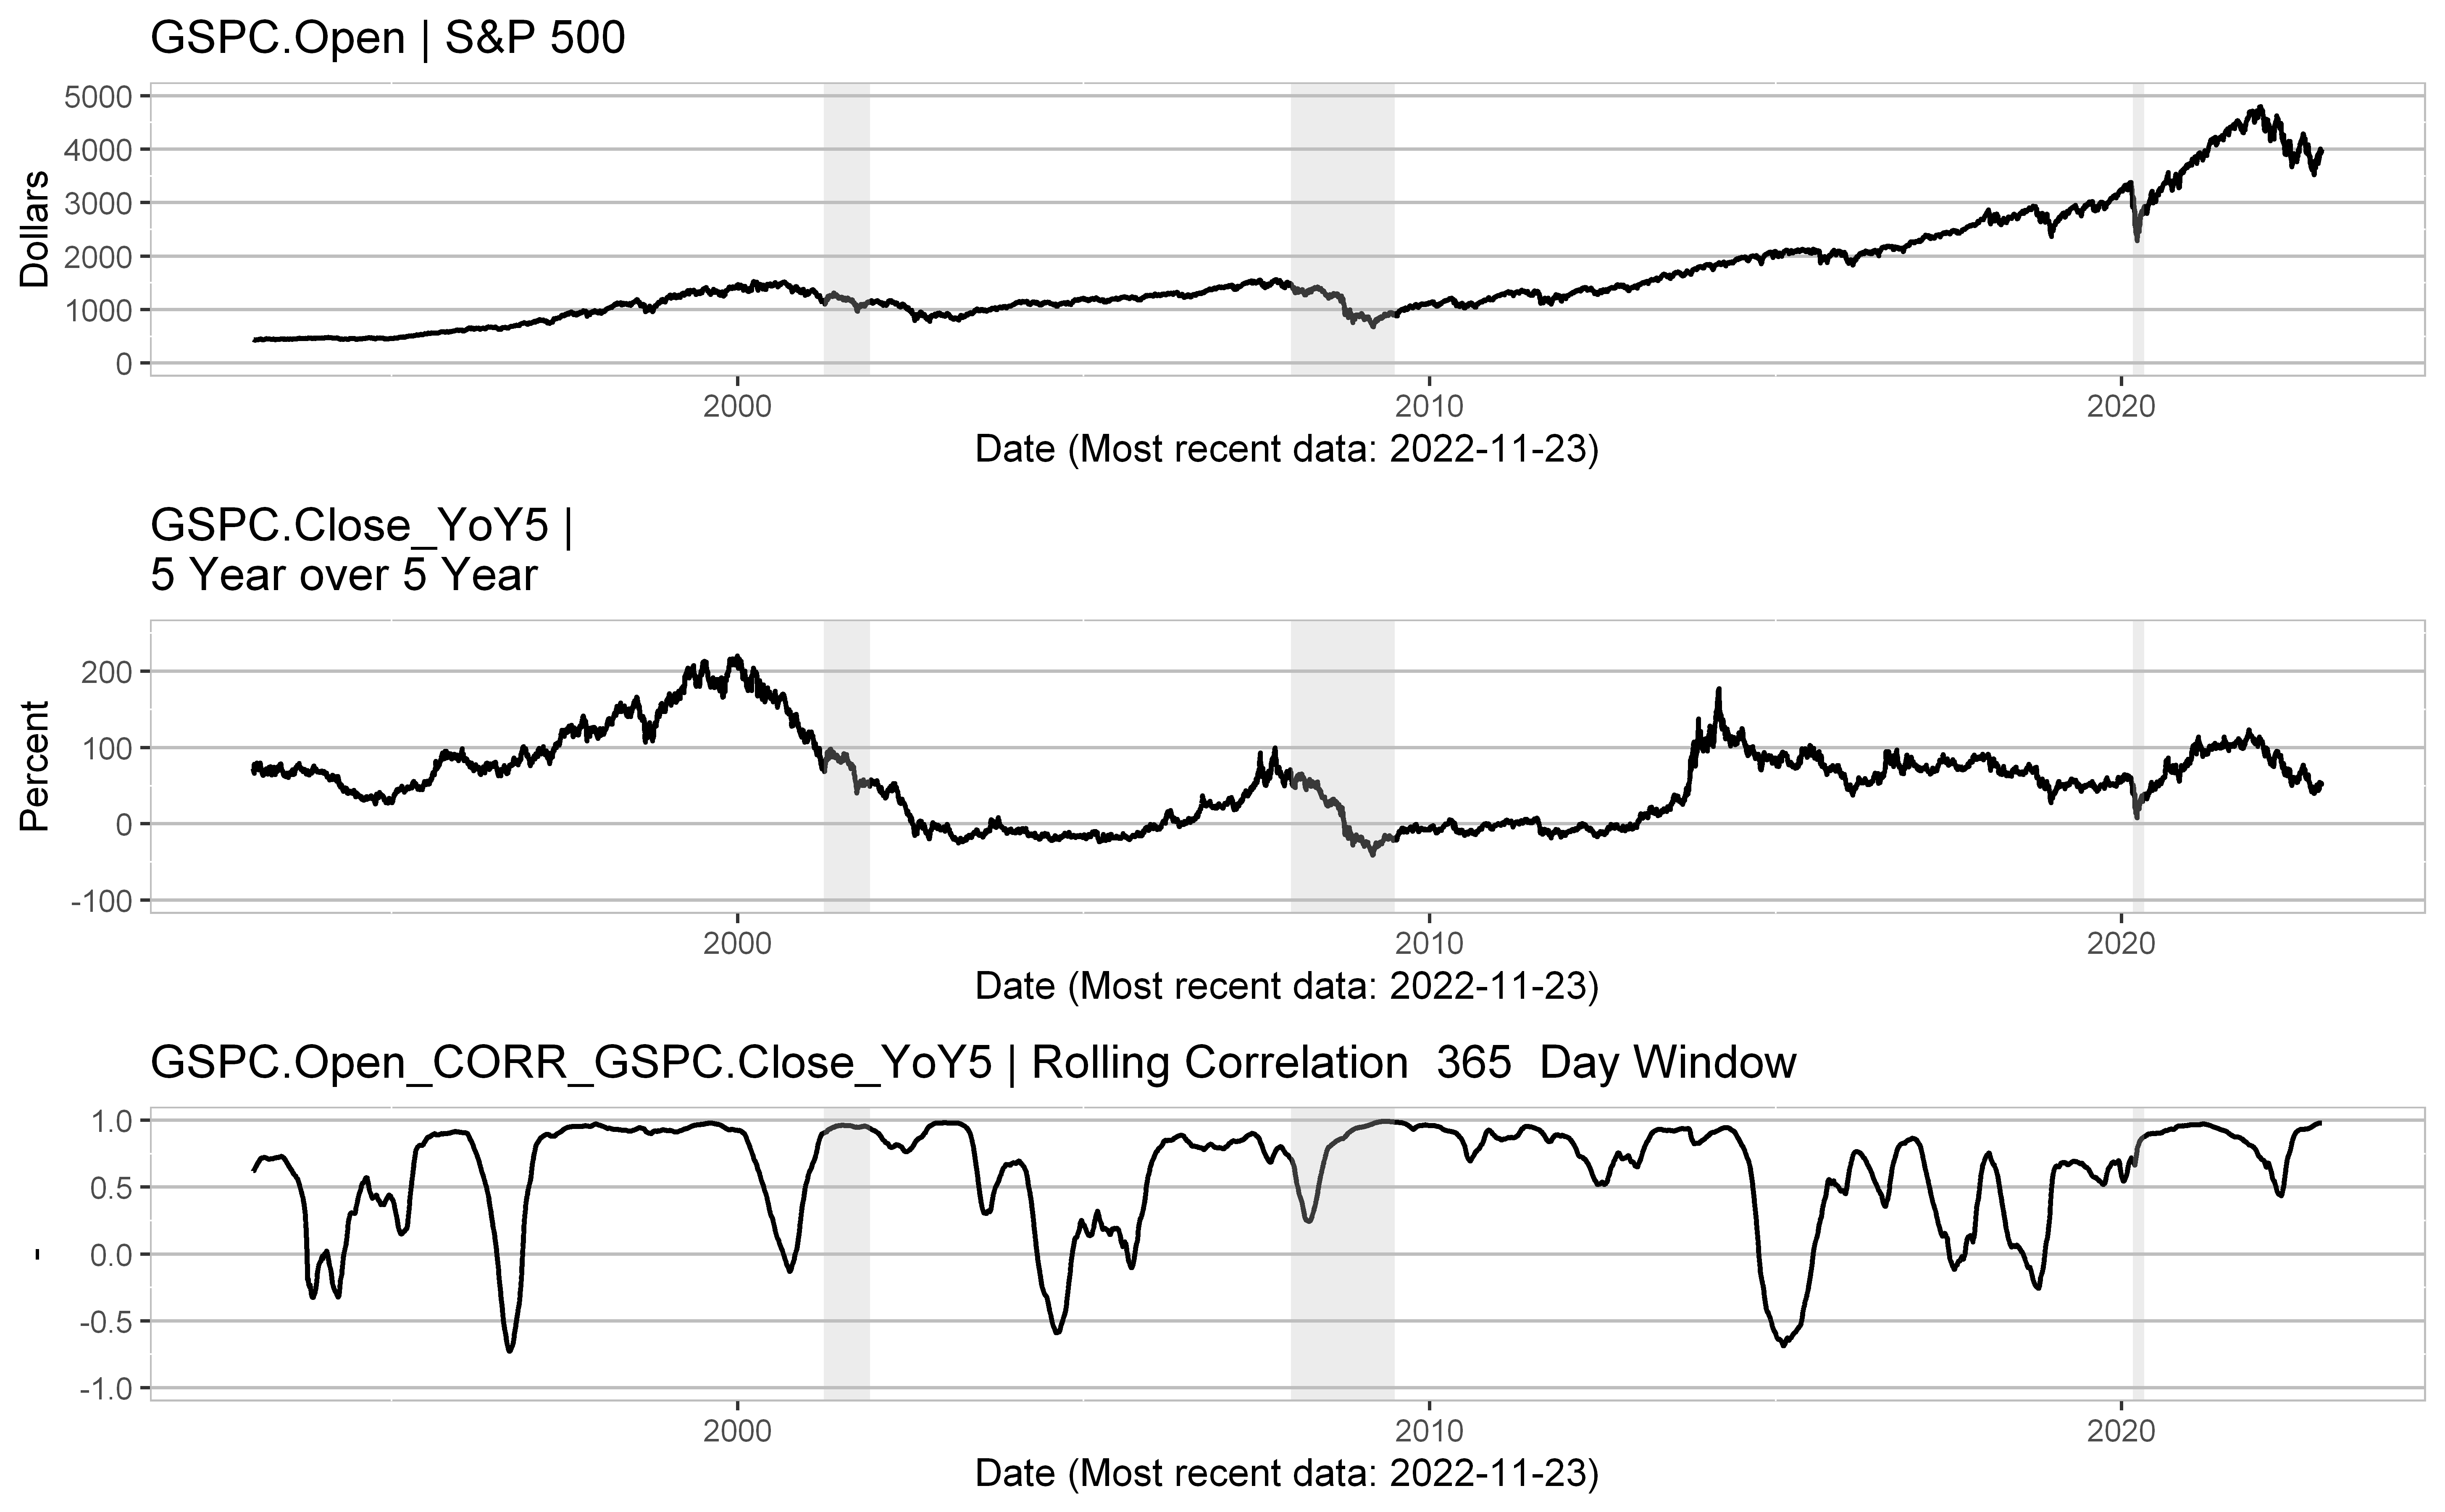

In [28]:
datay1 <- "GSPC.Open"
ylim1 <- c(0, d.GSPC.max)

datay2 <- "GSPC.Close_YoY5"
ylim2 <- c(-100, 250)

dtStart <- as.Date("1jan1993","%d%b%Y")

w <- 365
corrName <- calcRollingCorr(dfRecession, df.data, df.symbols, datay1, ylim1, datay2, ylim2, w, dtStart)


Compare the 1-, 4- and 5- year returns for the S&P

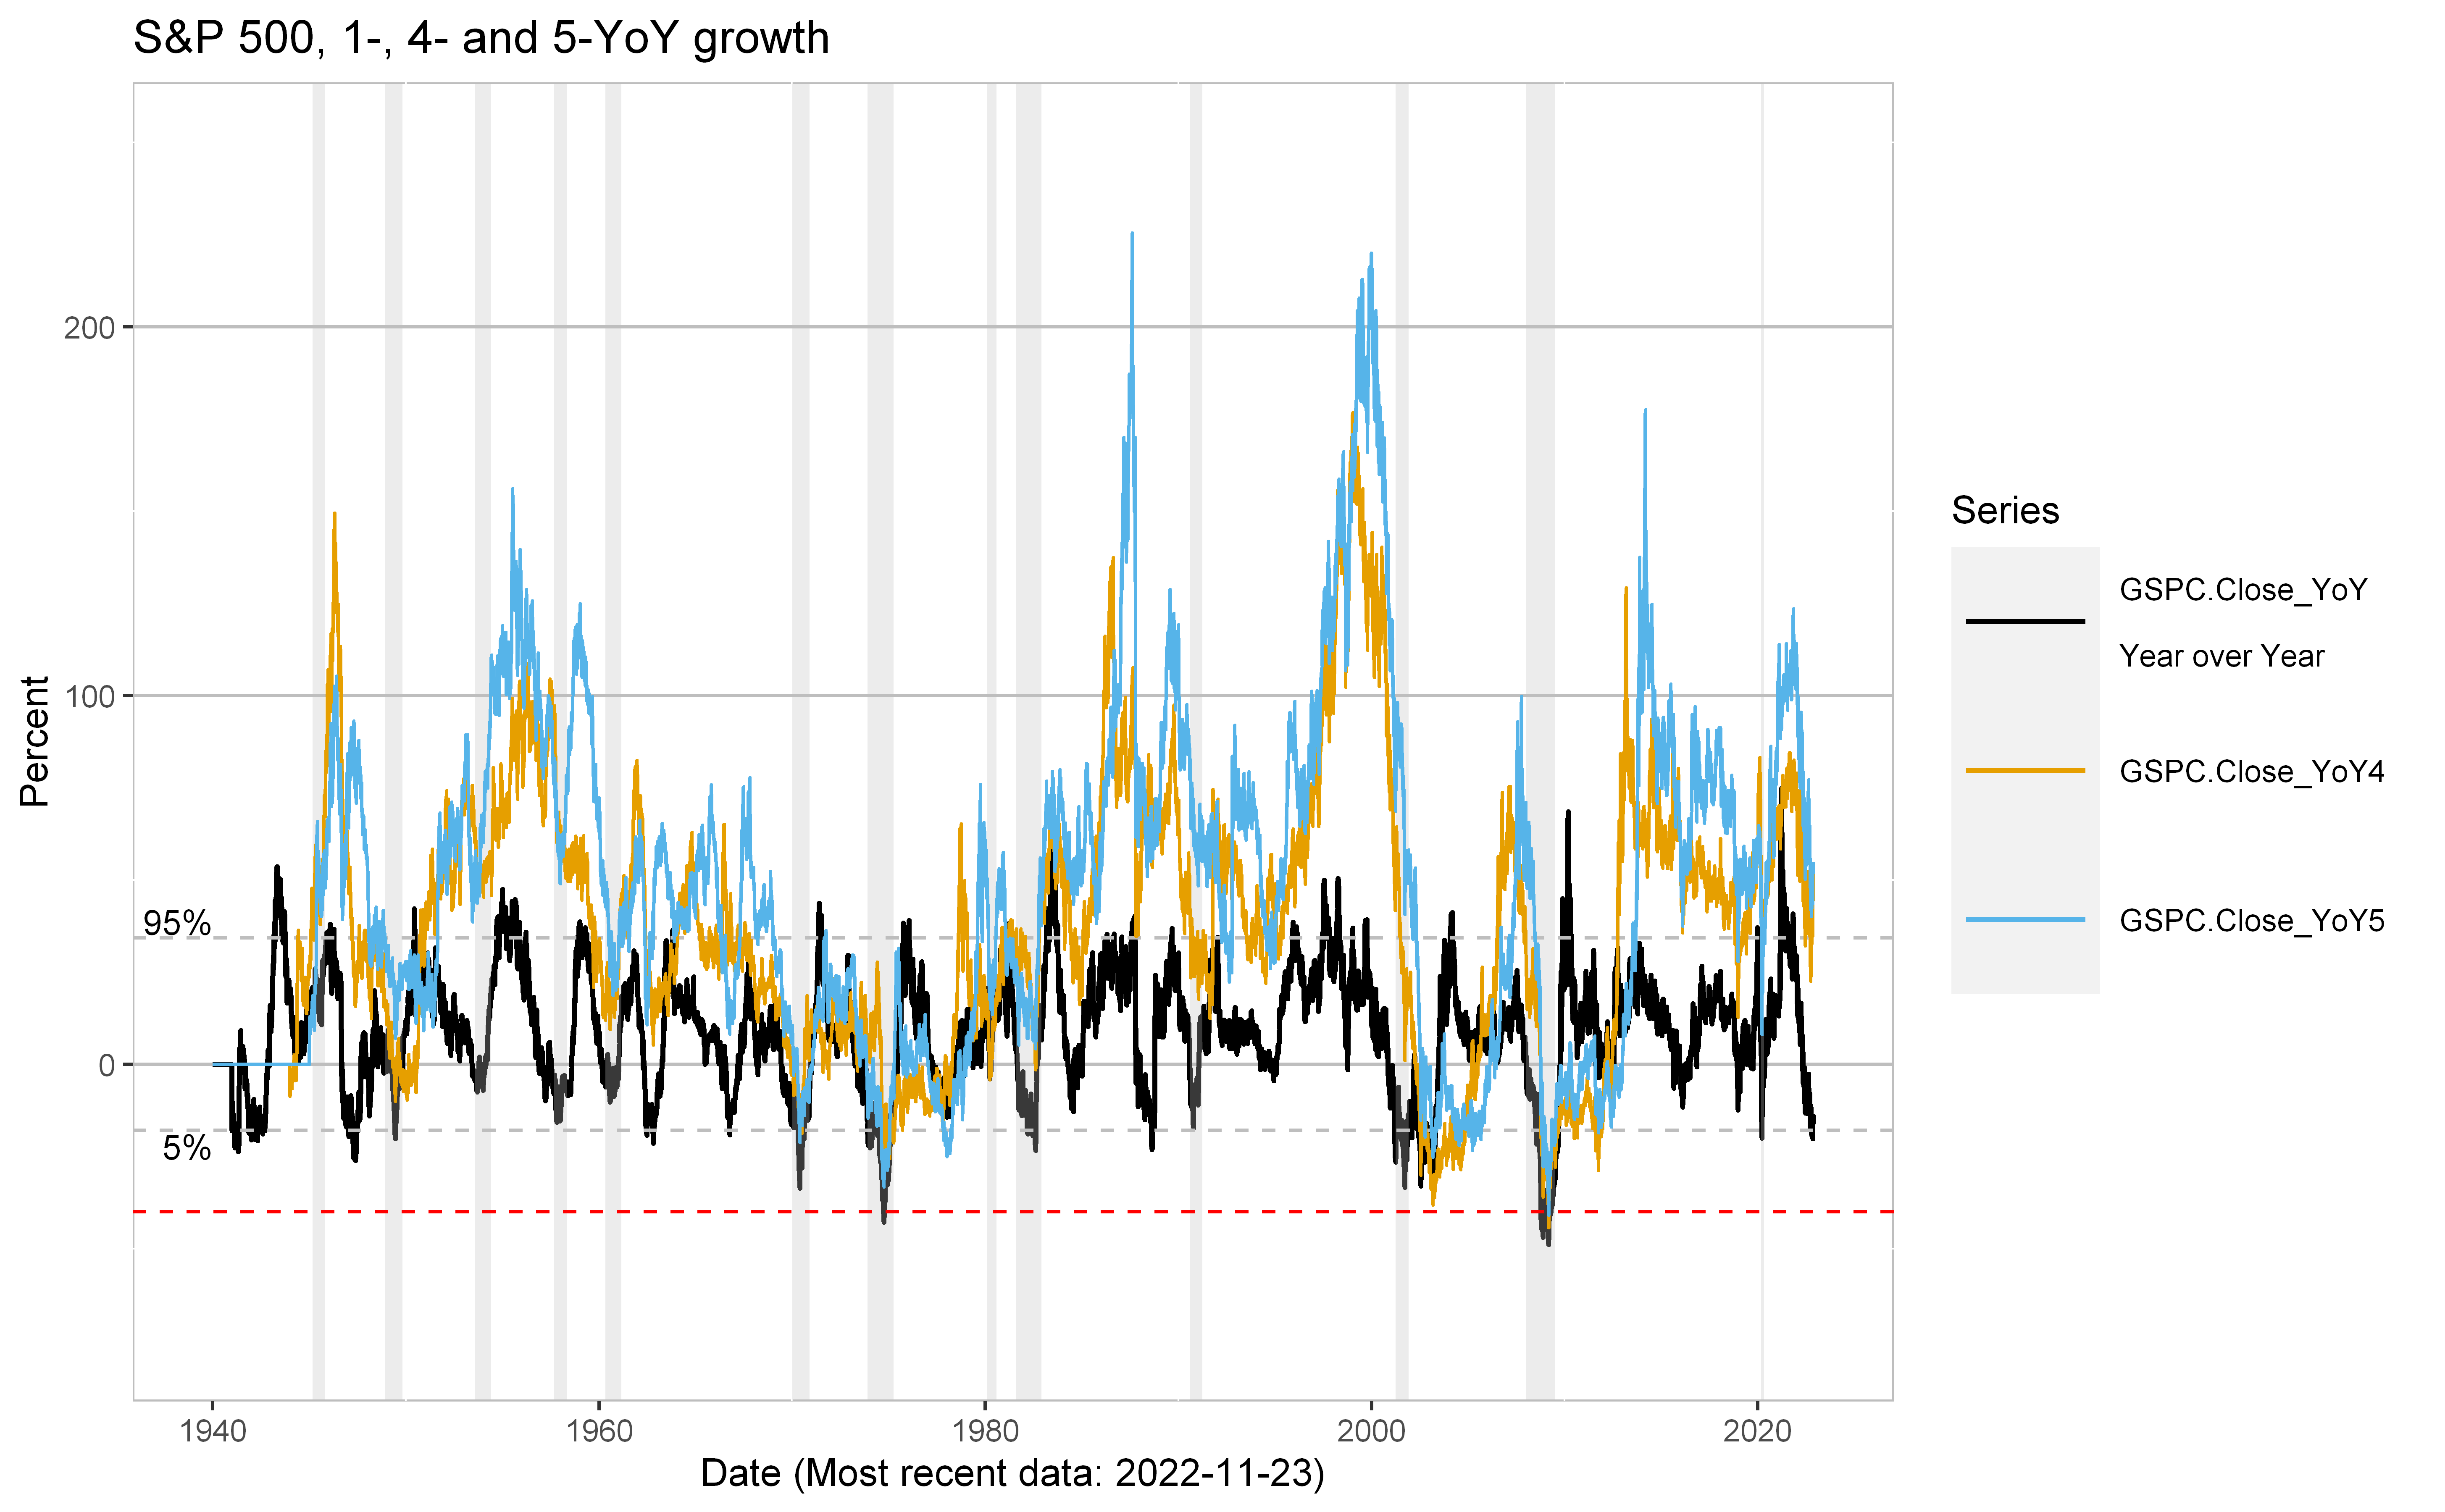

In [29]:
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "GSPC.Close_YoY4"
datay.aux.2 <- "GSPC.Close_YoY5"
ylim.in <- c(-75, 250)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "S&P 500, 1-, 4- and 5-YoY growth",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = df.data[[datay.aux.1]],
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

Curious about the percential for the 4-year return period

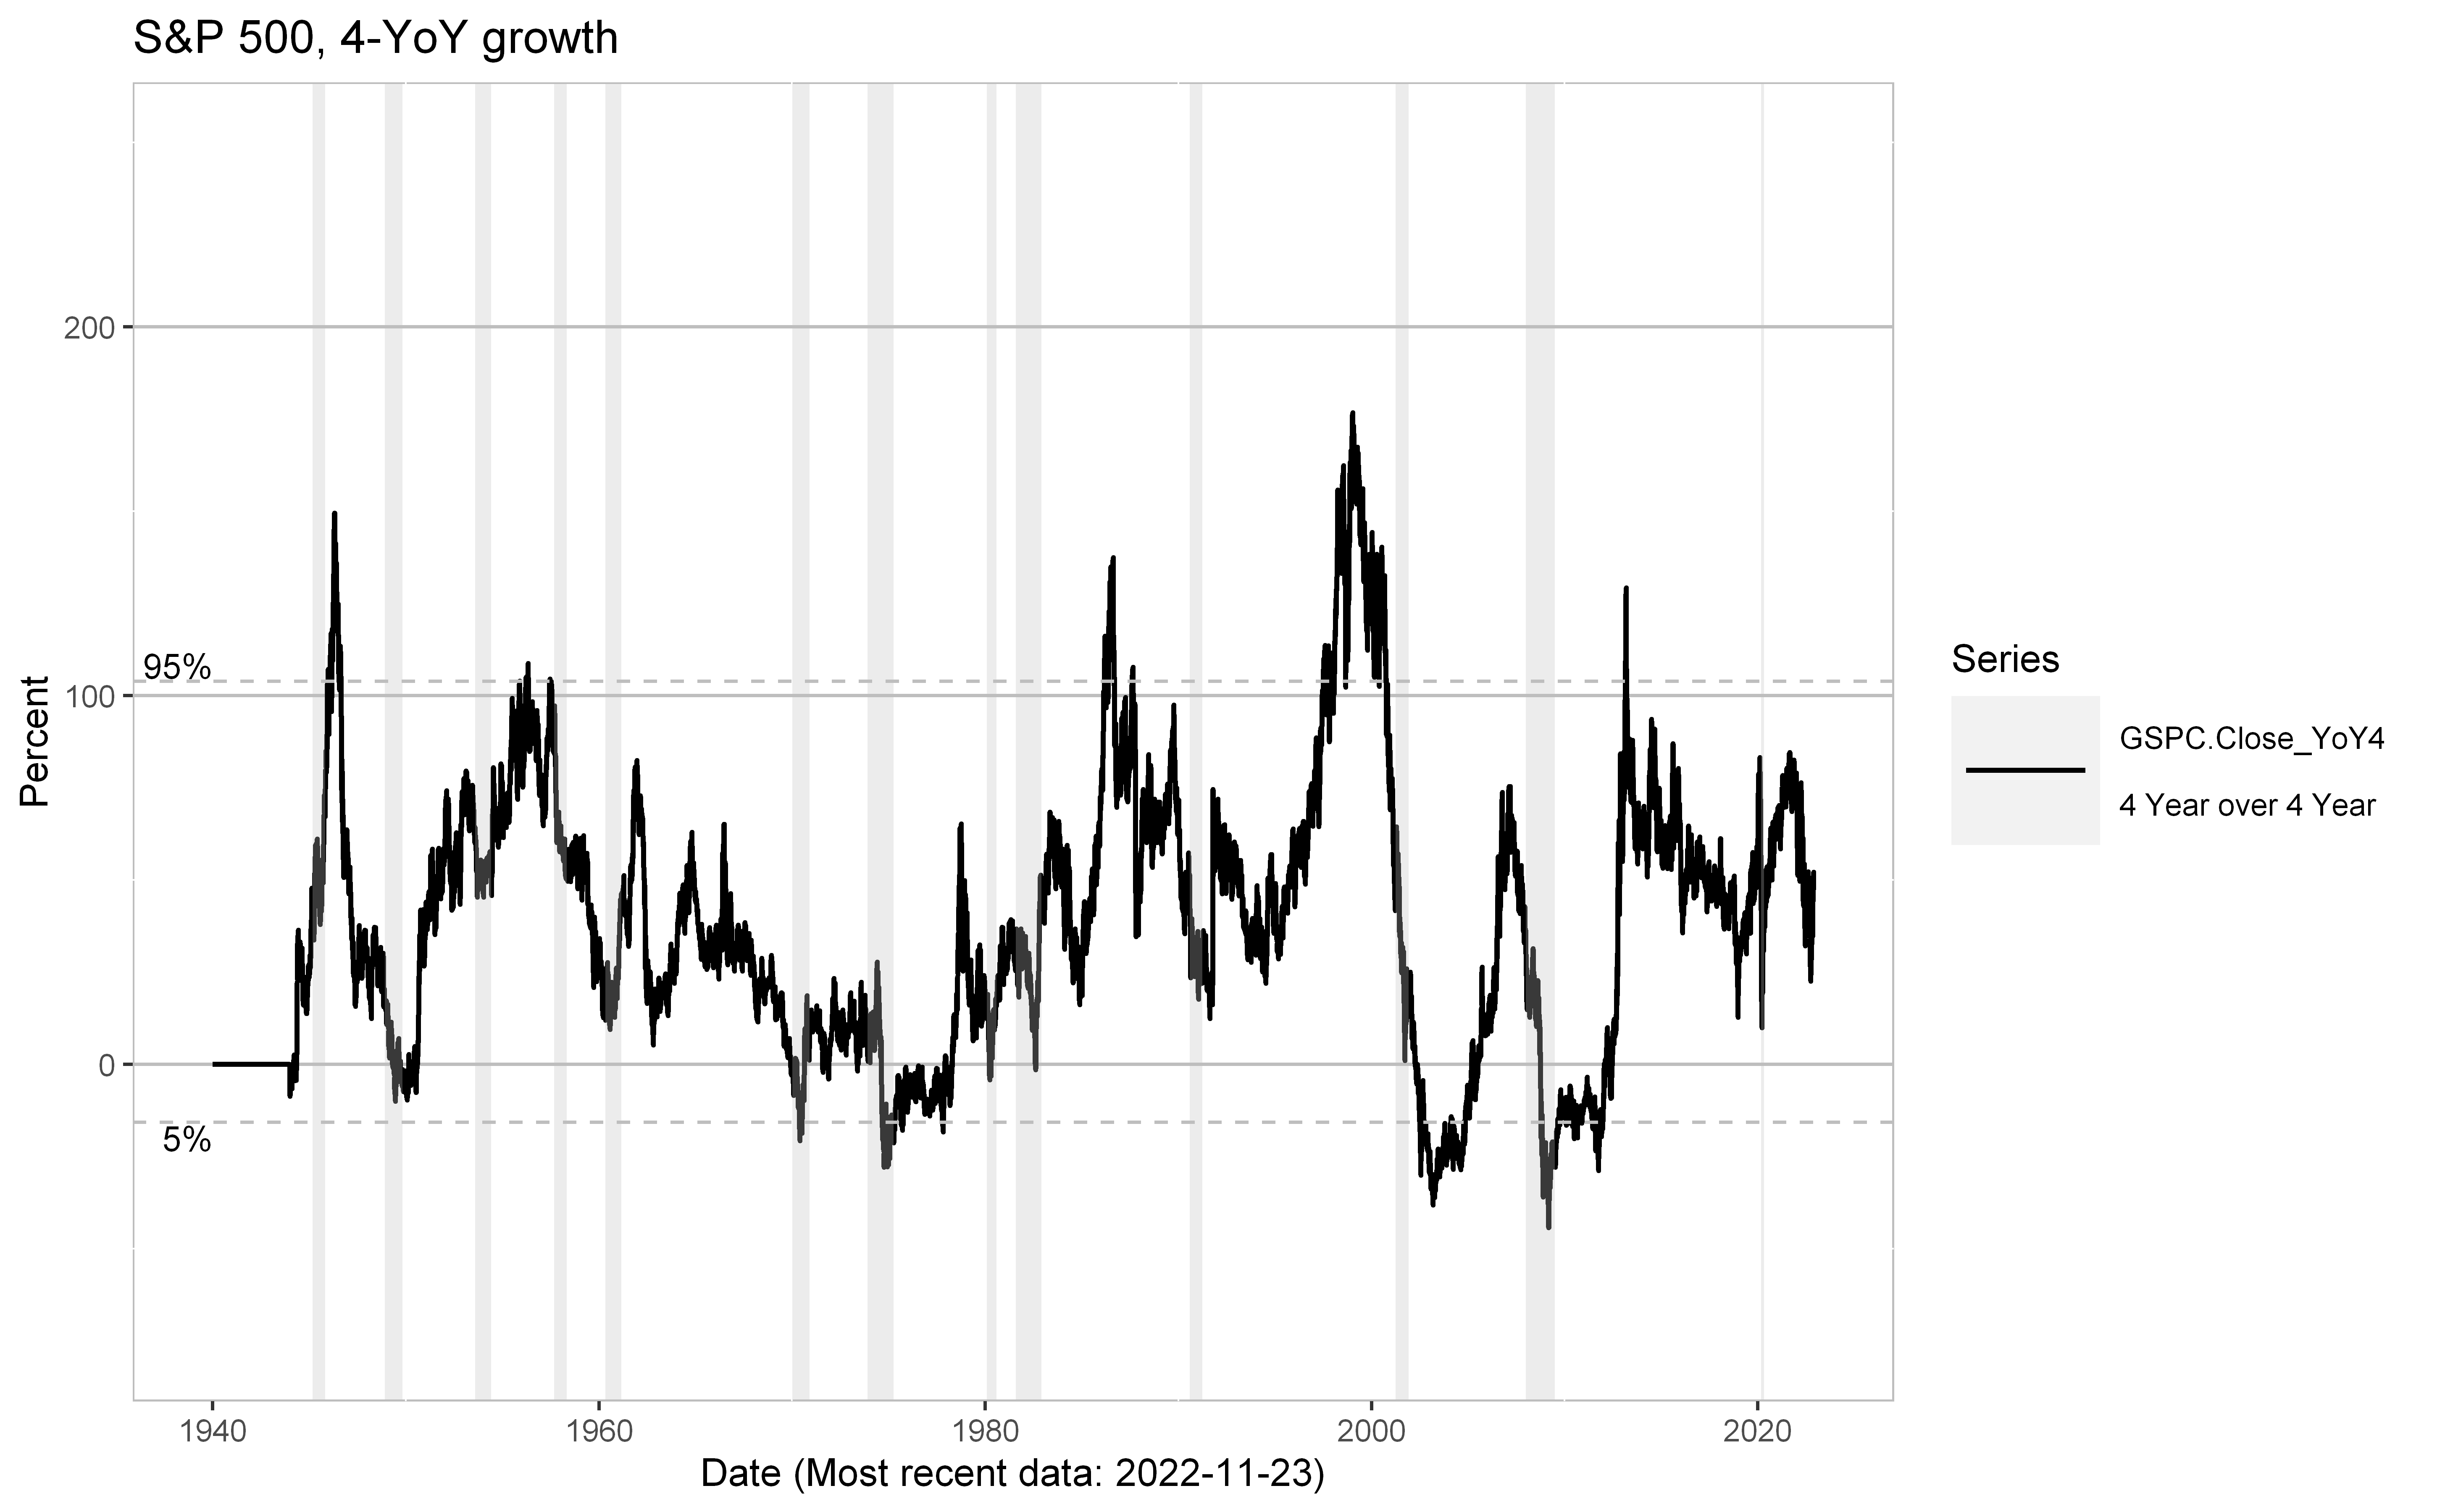

In [30]:
datay.in <- "GSPC.Close_YoY4"
ylim.in <- c(-75, 250)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "S&P 500, 4-YoY growth",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1

In [31]:
head(df.data)

CPIAUCSL USREC UNRATE PCEPI  CCSA    CCNSA   NPPTTL   U6RATE
1940-01-02 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
1940-01-03 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
1940-01-04 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
1940-01-05 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
1940-01-06 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
1940-01-07 21.48    0     3.4    16.042 1134000 1594000 109068.9 11.7  
           PAYNSA   TABSHNO ... nyfed.recession GPDI.by.GDP retBase      
1940-01-02 30966.94 837.197 ... 0.002613564     0.1474478    0.0000000000
1940-01-03 30967.87 837.197 ... 0.002614954     0.1474478    0.0110237337
1940-01-04 30968.81 837.197 ... 0.002616345     0.1474478   -0.0031372575
1940-01-05 30969.74 837.197 ... 0.002617736     0.1474478   -0.0055139959
1940-01-06 30970.68 837.197 ... 0.002619129     0.1474478    0.0002632618
1940-01-07 30971.61 837.197 ... 0.002620521     0.1474478    0.0002631925
           retBaseShort_TB3MS eqBase    eqBaseShort_TB3MS RecInit
1940-01-02 2.828104e-05       0.2108514 1.130128e-06      0      
1940-01-03 2.916483e-05       0.2131886 2.295573e-06      0      
1940-01-04 3.004861e-05       0.2125209 3.496334e-06      0      
1940-01-05 3.093239e-05       0.2113523 4.732411e-06      0      
1940-01-06 3.181617e-05       0.2114079 6.003805e-06      0      
1940-01-07 3.269996e-05       0.2114636 7.310516e-06      0      
           RecInit_Smooth GSPC.Open_CORR_GSPC.Close_YoY4
1940-01-02  0.002014032   1                             
1940-01-03 -0.006814265   1                             
1940-01-04  0.004799331   1                             
1940-01-05 -0.004595892   1                             
1940-01-06 -0.001322522   1                             
1940-01-07  0.009901629   1                             
           GSPC.Open_CORR_GSPC.Close_YoY5
1940-01-02 1                             
1940-01-03 1                             
1940-01-04 1                             
1940-01-05 1                             
1940-01-06 1                             
1940-01-07 1

In [32]:
2.0^0.25

[1] 1.189207

In [33]:
1.5^0.2

[1] 1.084472

### Moving Average

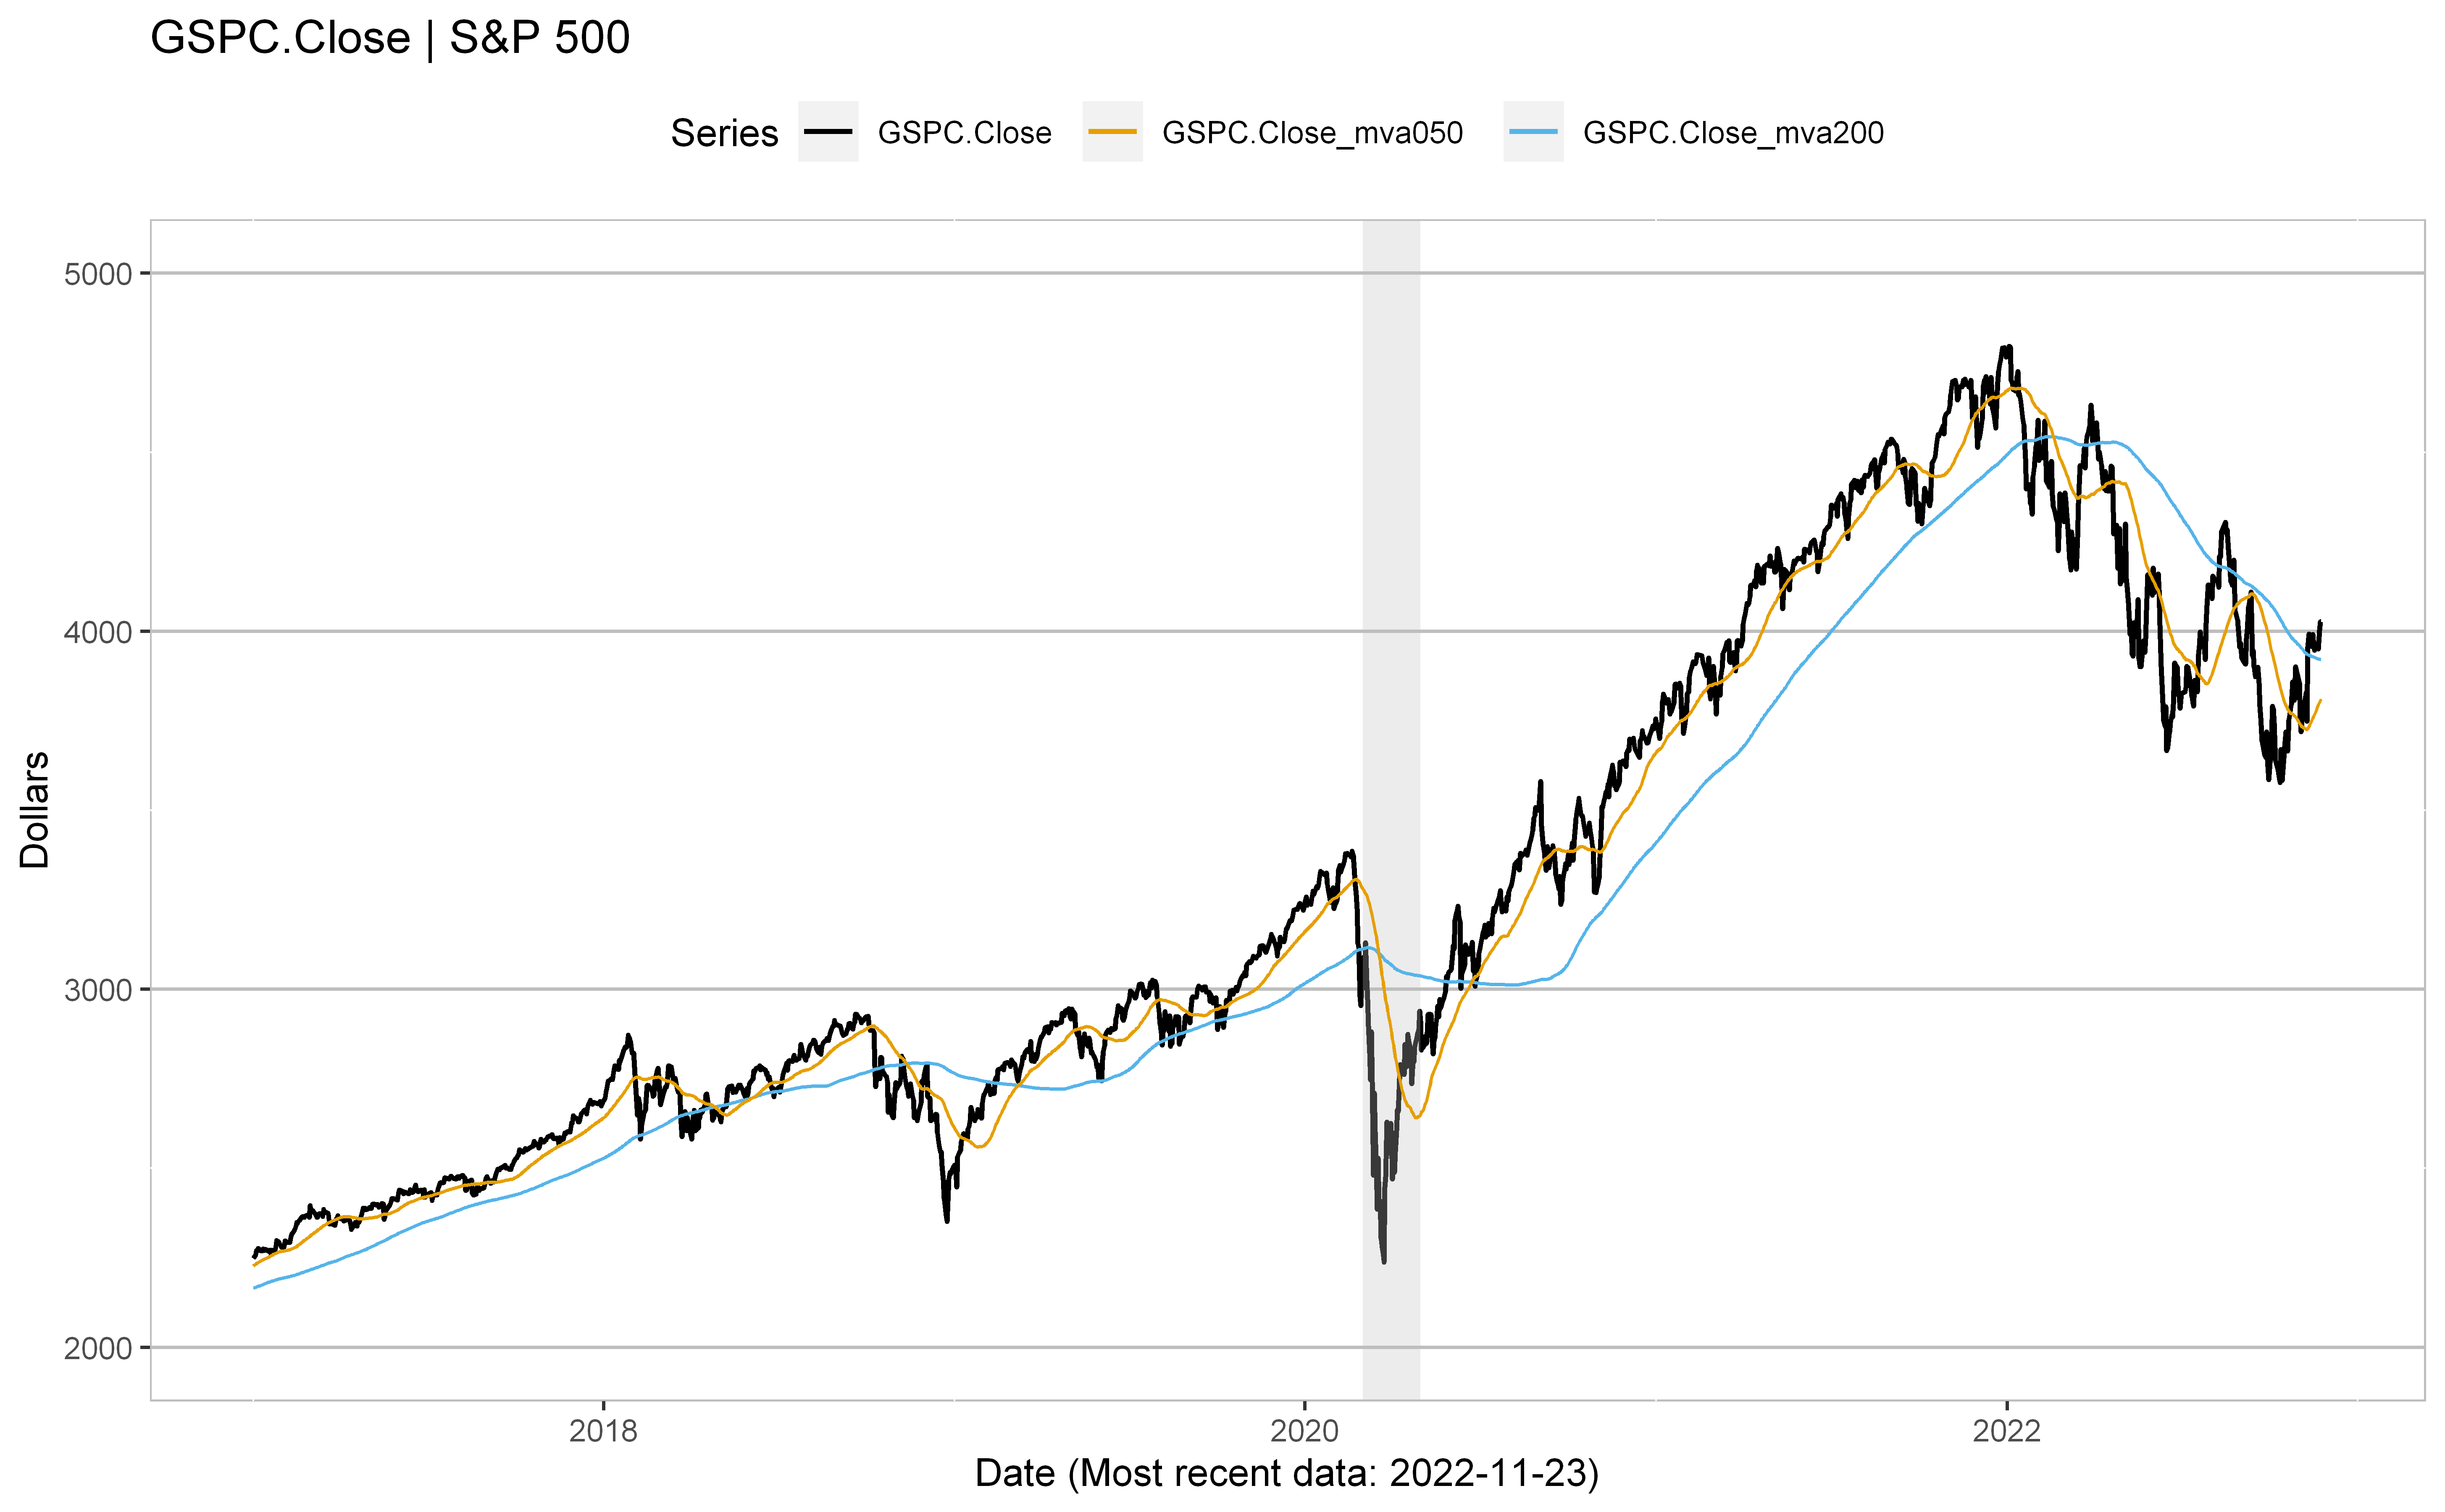

In [34]:
datay <- "GSPC.Close"
datay_aux <- "GSPC.Close_mva200"
datay_aux2 <- "GSPC.Close_mva050"
ylim <- c(2000, d.GSPC.max)
myPlot <- plotSingle(dfRecession, df.data, "date", datay, getPlotTitle(df.symbols, datay), "Date", 
            getPlotYLabel(df.symbols, datay), c(dt.recent, Sys.Date()), ylim, TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux2, colour=shQuote(datay_aux2)), na.rm = TRUE)


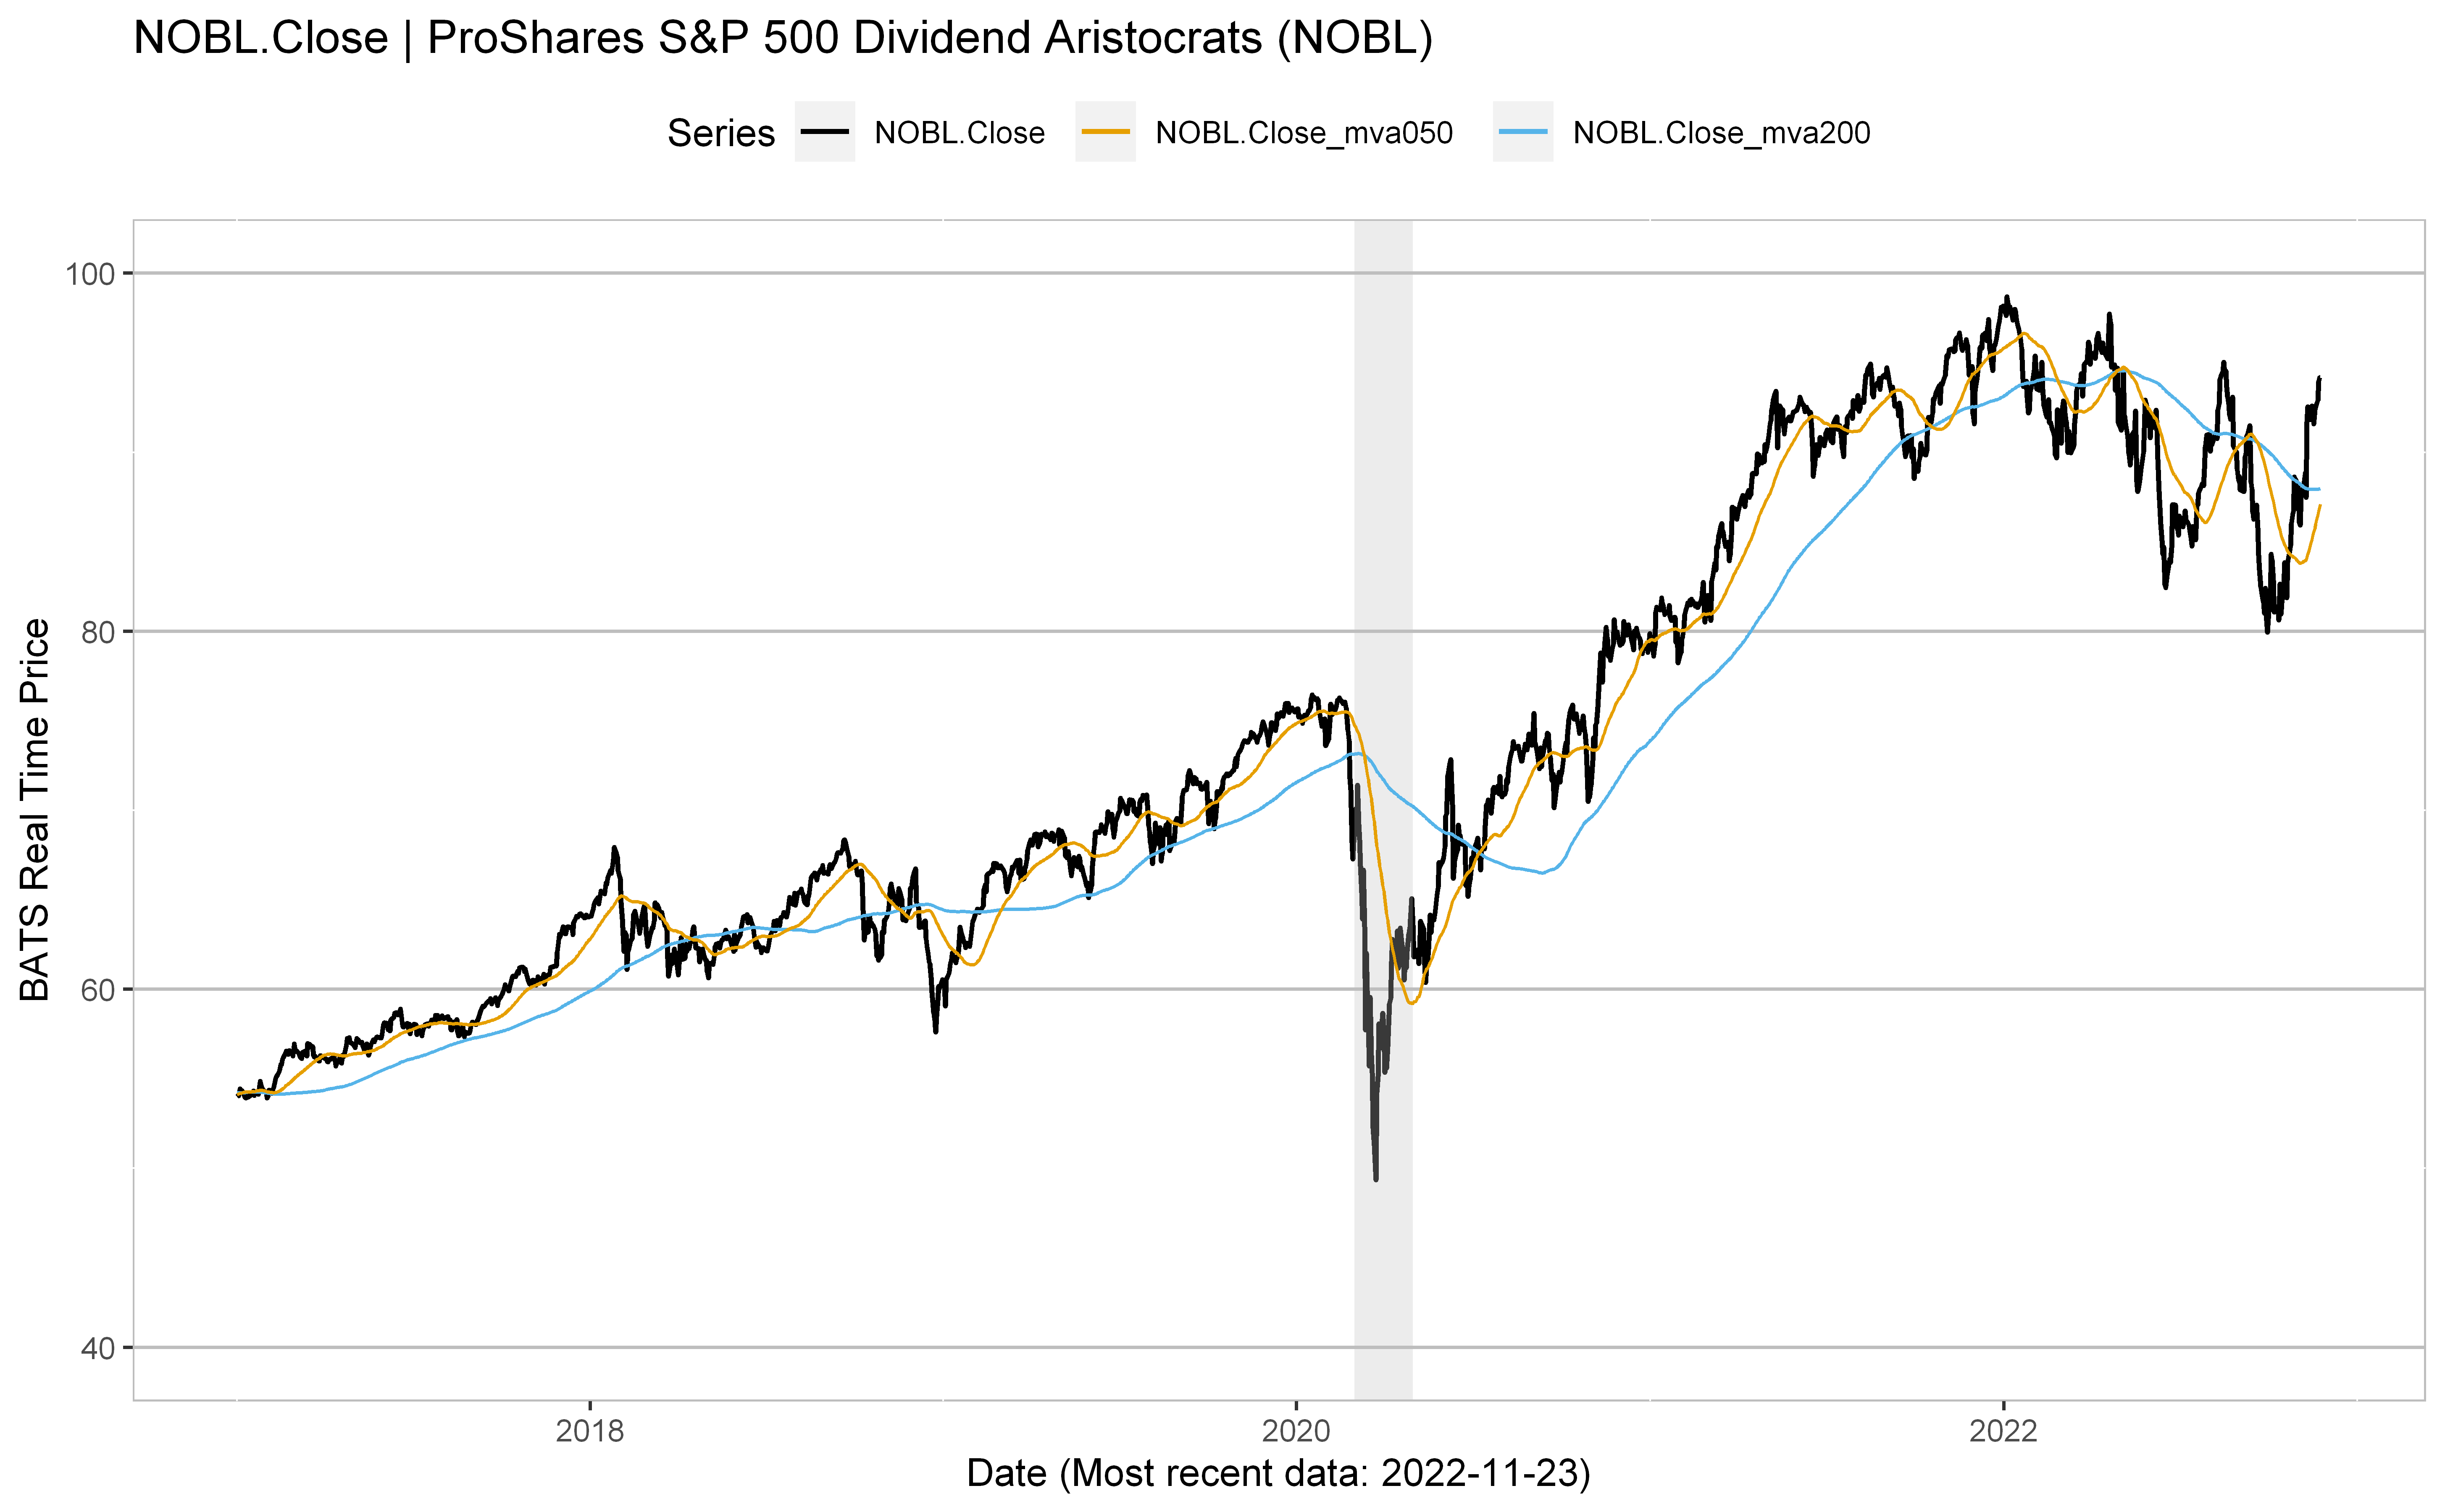

In [35]:
datay <- "NOBL.Close"
datay_aux <- "NOBL.Close_mva200"
datay_aux2 <- "NOBL.Close_mva050"
ylim <- c(40, 100)
myPlot <- plotSingle(dfRecession, df.data, "date", datay, getPlotTitle(df.symbols, datay), "Date", 
            getPlotYLabel(df.symbols, datay), c(dt.recent, Sys.Date()), ylim, TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux2, colour=shQuote(datay_aux2)), na.rm = TRUE)

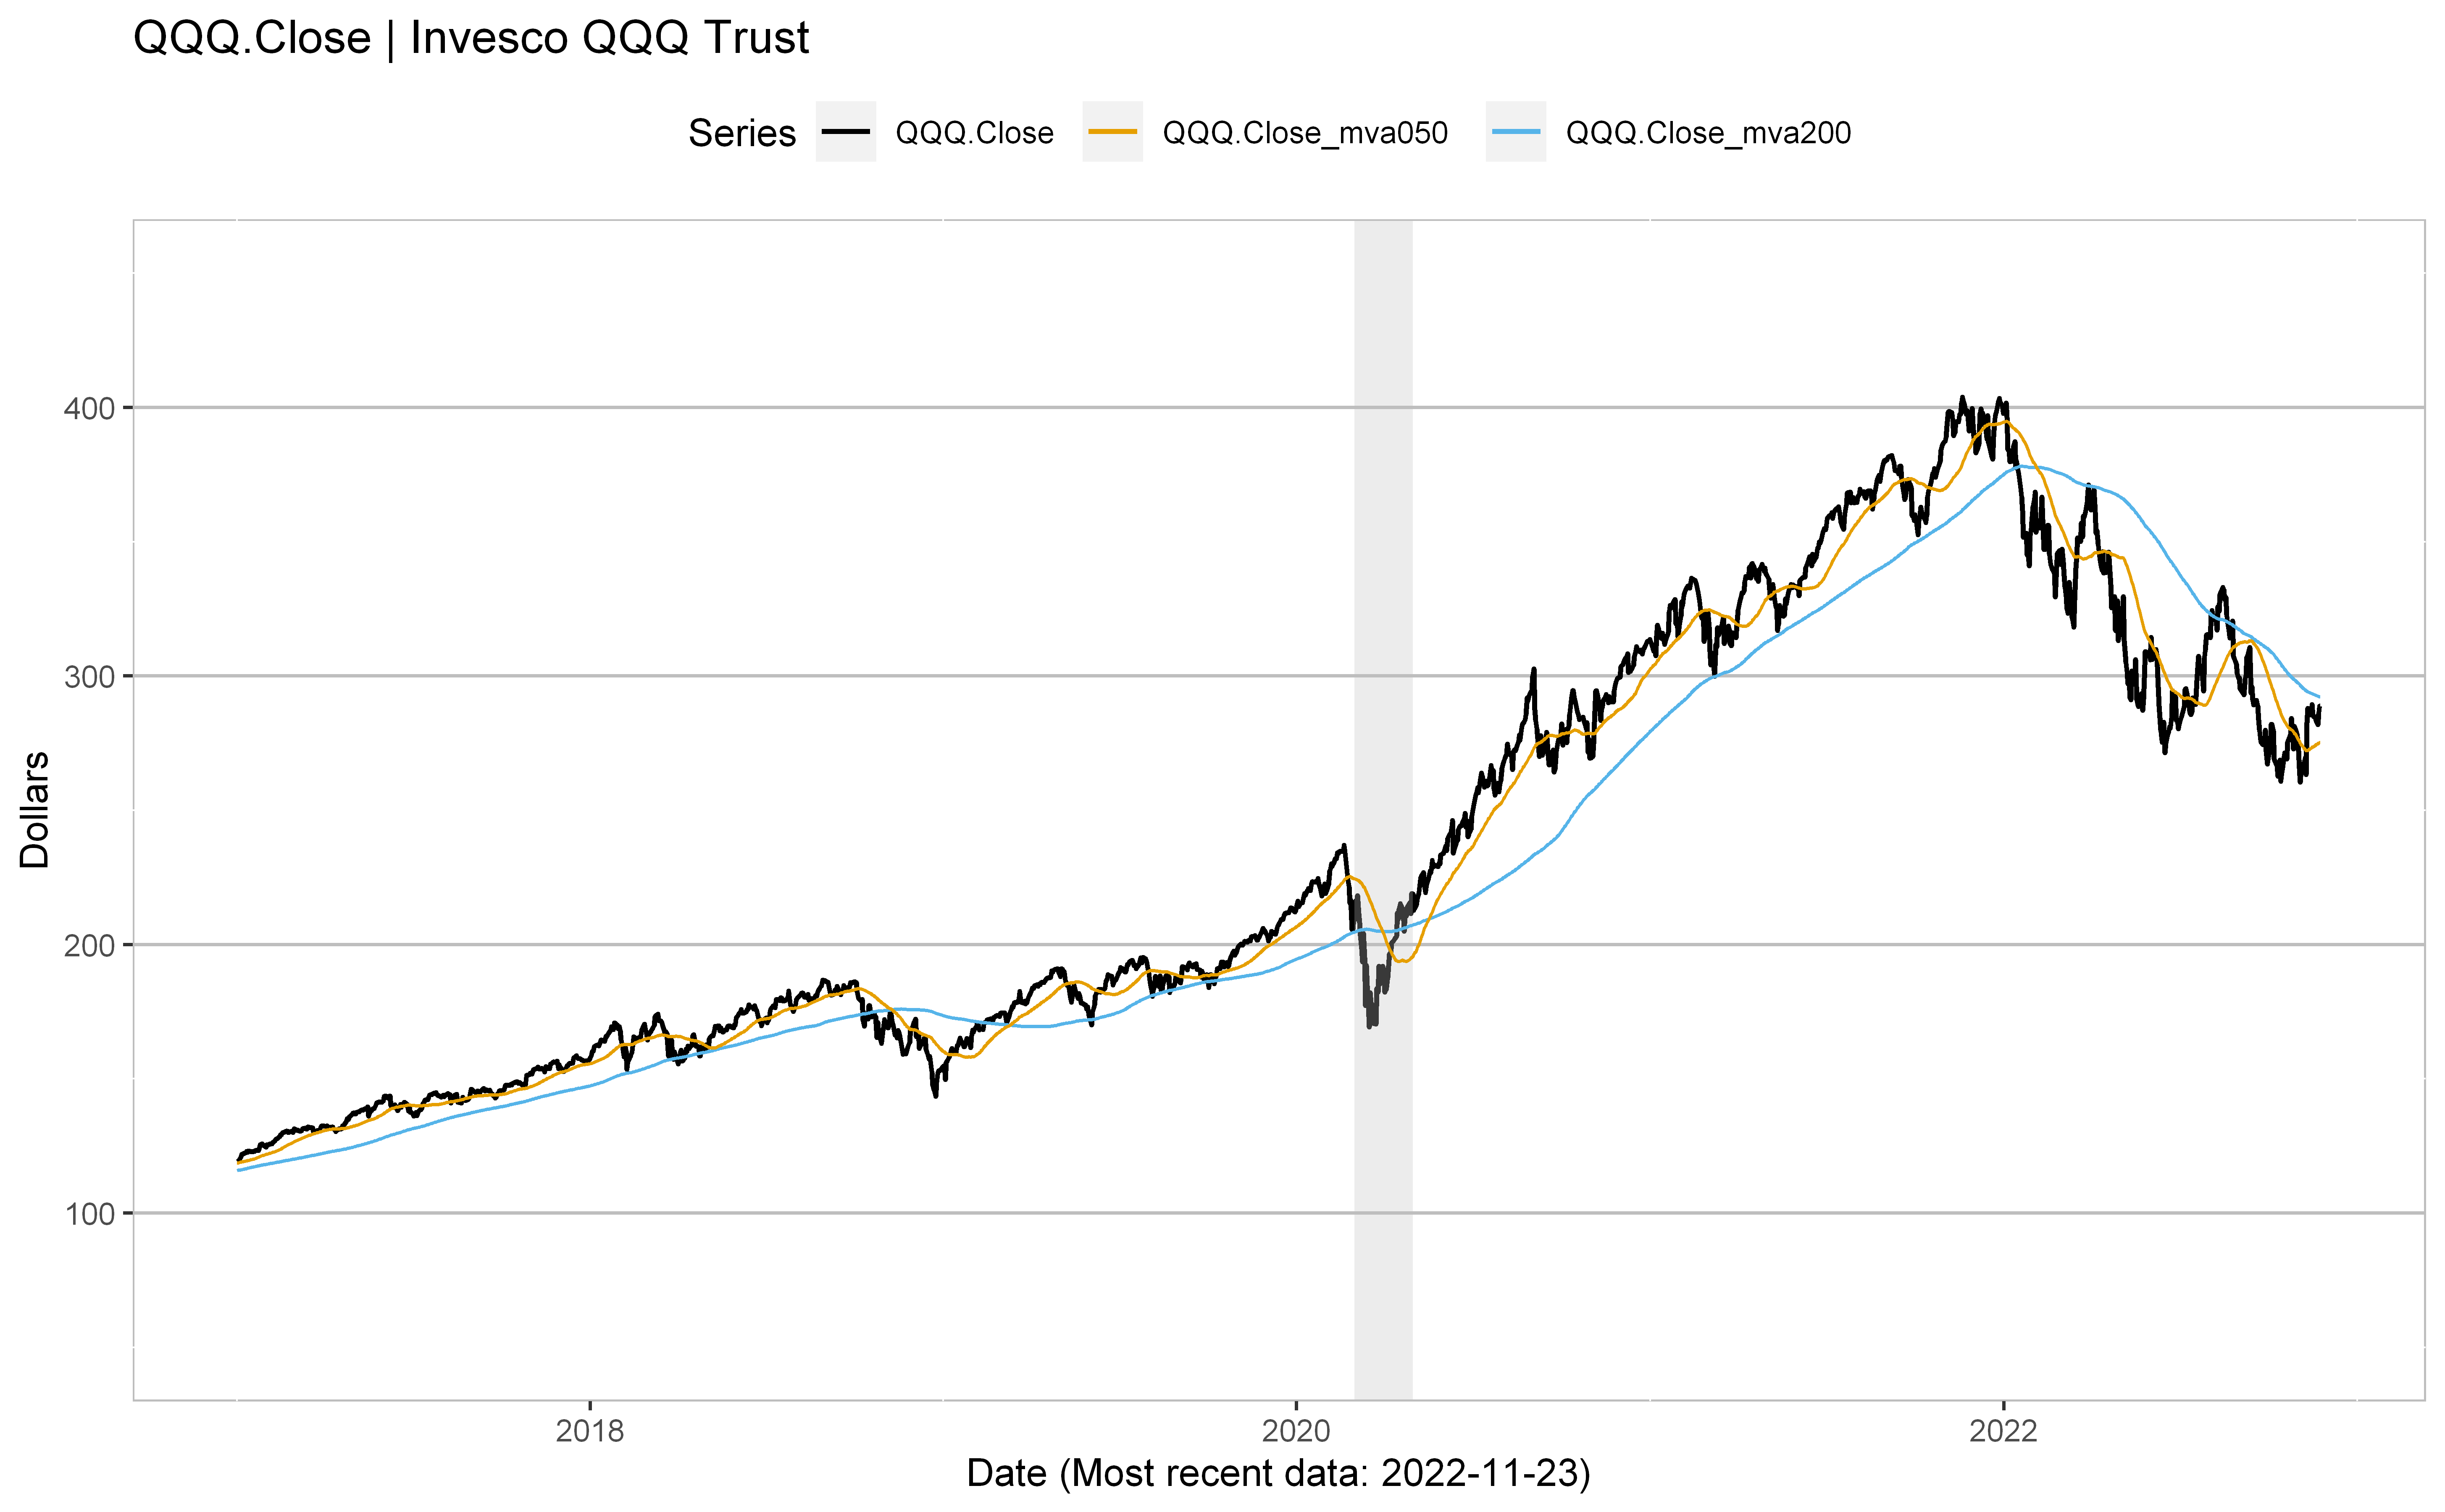

In [36]:
datay <- "QQQ.Close"
datay_aux <- "QQQ.Close_mva200"
datay_aux2 <- "QQQ.Close_mva050"
ylim <- c(50, 450)
myPlot <- plotSingle(dfRecession, df.data, "date", datay, getPlotTitle(df.symbols, datay), "Date", 
            getPlotYLabel(df.symbols, datay), c(dt.recent, Sys.Date()), ylim, TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot <- myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux, colour=shQuote(datay_aux)), na.rm = TRUE)
myPlot + geom_line(data=df.data, aes_string(x="date", y=datay_aux2, colour=shQuote(datay_aux2)), na.rm = TRUE)

## Historical commodity trends

### Energy and money supply

Suggested by James Turk, look at the relationship between the price of gold and crude oil

In [37]:
df.data$DCOILWTICO
df.data$GOLDAMGBD228NLBM

[1]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
    [8]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [15]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [22]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [29]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [36]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [43]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [50]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [57]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [64]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [71]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [78]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [85]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [92]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
   [99]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [106]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [113]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [120]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [127]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [134]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [141]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [148]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [155]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [162]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [169]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [176]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [183]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [190]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [197]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [204]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [211]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [218]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [225]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [232]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [239]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [246]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [253]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [260]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [267]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [274]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [281]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [288]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [295]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [302]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [309]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [316]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [323]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [330]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [337]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [344]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [351]  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000  25.56000
  [358]  25.56000  25.5600

NULL

In [38]:
# Calculate the ratio of crude to gold
str_new = "DCOILWTICO.by.GOLDAMGBD228NLBM"
df.data$DCOILWTICO.by.GOLDAMGBD228NLBM <- df.data$DCOILWTICO / df.data$GOLDAMGBD228NLBM

ERROR: Error in `$<-.data.frame`(`*tmp*`, DCOILWTICO.by.GOLDAMGBD228NLBM, value = numeric(0)): replacement has 0 rows, data has 30278


In [ ]:
# Add the ratio of crude oil to gold
df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = str_new,
      string.source = "Calc",
      string.description = "DCOILWTICO divided GOLDAMGBD228NLBM",
      string.label.y = 'Troy ounce/bbl',
      float.expense.ratio = -1.00,
      Max030 = FALSE,
      Max180 = FALSE,
      date.series.start =  as.Date(max(c(
        index(DCOILWTICO[1]), index(GOLDAMGBD228NLBM[1])
      )))  ,
      date.series.end = as.Date(min(c(
        index(tail(DCOILWTICO, 1)), index(tail(GOLDAMGBD228NLBM, 1))
      )))
    )
  )


In [ ]:
tail(df.symbols)

In [ ]:
options(repr.plot.width = 9.7, repr.plot.height = 4, repr.plot.res = 600)
datay <- str_new
ylim <- c(-0.1, 0.25)
dt.start <- as.Date('1986-01-02')
myPlot <-
  plotSingle(
    dfRecession,
    df.data,
    "date",
    datay,
    "Oil price per barrel divided by gold price",
    "Date",
    getPlotYLabel(df.symbols, datay),
    c(dt.start, Sys.Date()),
    ylim,
    b.legend = TRUE,
    b.percentile = TRUE,
    b.long.legend = TRUE
  )
myPlot